In [1]:
import imageio
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

from skimage.draw import line_aa

from src.draw import *
from src.simulation import Simulation
from src.measure import Measure

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def firing_stats(firings):
    if not isinstance(firings, np.ndarray):
        firings = np.array(firings)
    if len(firings.shape) == 1:
        firings_count = firings.sum()
        return firings.sum()
        
    firings_count = firings.sum(1)
    return {'max': np.max(firings_count), 'min': np.min(firings_count), 'mean': np.mean(firings_count), 'median': np.median(firings_count)}

C:\Users\User\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\User\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\User\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


1. Проверить параметры модели
2. Почитать про параметры модели в оригинальной статье Izhikevich
3. Проверить соединения
4. Искусственно ограничить значения recovery и voltage

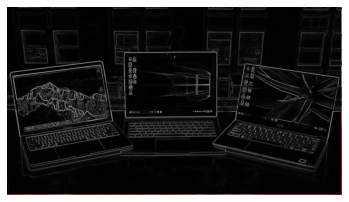

In [3]:
from src.preprocess import ImagePreprocessor

prep = ImagePreprocessor(data_folder='data/', img_name='laptop2.png')
img = prep.binarize()

In [2]:
filters = [[[0,0],[1,1]],
           [[1,0],[0,1]], 
           [[0,1],[0,1]], 
           [[0,1],[1,0]]]

def get_dissimilarity(img, filters, inds_sync):
    sim = Simulation(img, filters, 1, 0, 0)
    voltage, recovery, firings = sim.run(1000)
    
    measure = Measure(firings[inds_sync], 'spike_contrast')
    return measure.dissimilarity()

In [3]:
width = 28
height = 28
strength = 1
length = 3

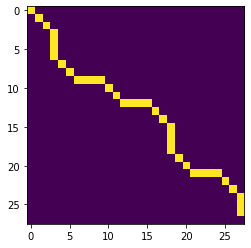

In [10]:
img5 = line_45_joint(width=width, height=height, strength=strength, length=length)
plt.imshow(img5)
plt.show()

In [12]:
vp5, vr5, contrast5 = [], [], []

for i in range(10):
    print('\nSIMULATION', i)
    
    #img5 = line_45_joint(width=width, height=height, strength=strength, length=length)
    #plt.imshow(img5)
    #plt.show()
    
    sim5 = Simulation(stimulus=img5, filters=filters, total_connect_strength=0.13)
    voltage5, recovery5, firings5 = sim5.run(1000)
    fired = []

    for i,f in enumerate(firings5):
        if len(np.nonzero(f)[0]) > 0:
            fired.append(i)       
    vp5_cur = Measure(firings5[fired], 'victor_purpura').dissimilarity()['mean']
    vp5.append(vp5_cur)
    
    vr5_cur = Measure(firings5[fired], 'van_rossum').dissimilarity()['mean']
    vr5.append(vr5_cur)    
    
    contrast5_cur = Measure(firings5[fired], 'spike_contrast').dissimilarity()
    contrast5.append(contrast5_cur)    
    
    print('victor_purpura', vp5_cur)
    print('van_rossum', vr5_cur)
    print('spike_contrast', contrast5_cur)
    
print('\nRESULTS')
print('victor_purpura', np.mean(vp5))
print('van_rossum', np.mean(vr5))
print('spike_contrast', np.mean(contrast5))


SIMULATION 0
Simulation took 0.7108323999999868 s
victor_purpura 5.27810416666667
van_rossum 4.469554953055921
spike_contrast 0.8719745222929937

SIMULATION 1
Simulation took 0.8149602999999956 s
victor_purpura 5.063617424242428
van_rossum 4.315804526023836
spike_contrast 0.8723958333333334

SIMULATION 2
Simulation took 1.2159546999999975 s
victor_purpura 4.269763257575762
van_rossum 3.6536550393248577
spike_contrast 0.8647375504710633

SIMULATION 3
Simulation took 1.0769078000000007 s
victor_purpura 5.50129166666667
van_rossum 4.690121086380941
spike_contrast 0.8547099545263888

SIMULATION 4
Simulation took 0.6988465000000019 s
victor_purpura 5.311075757575762
van_rossum 4.51783156126851
spike_contrast 0.8560385065993995

SIMULATION 5
Simulation took 0.9100030000000032 s
victor_purpura 6.07357954545455
van_rossum 5.139790354502004
spike_contrast 0.8691646191646192

SIMULATION 6
Simulation took 0.7807956999999988 s
victor_purpura 4.501590909090913
van_rossum 3.832630608330509
spike_co

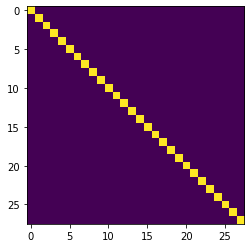

In [13]:
img6 = np.zeros(shape=(height,width))

rr, cc = draw.line_nd((0, 0), (height, width))  
img6[rr, cc] = strength

plt.imshow(img6)
plt.show()

In [15]:
vp6, vr6, contrast6 = [], [], []

for i in range(10):
    print('\nSIMULATION', i)
    sim6 = Simulation(stimulus=img6, filters=filters, total_connect_strength=0.13)
    voltage6, recovery6, firings6 = sim6.run(1000)
    fired = []

    for i,f in enumerate(firings6):
        if len(np.nonzero(f)[0]) > 0:
            fired.append(i)      
            
    vp6_cur = Measure(firings6[fired], 'victor_purpura').dissimilarity()['mean']
    vp6.append(vp6_cur)
    
    vr6_cur = Measure(firings6[fired], 'van_rossum').dissimilarity()['mean']
    vr6.append(vr6_cur)    
    
    contrast6_cur = Measure(firings6[fired], 'spike_contrast').dissimilarity()
    contrast6.append(contrast6_cur)    
    
    print('victor_purpura', vp6_cur)
    print('van_rossum', vr6_cur)
    print('spike_contrast', contrast6_cur)
    
print('\nRESULTS')
print('victor_purpura', np.mean(vp6))
print('van_rossum', np.mean(vr6))
print('spike_contrast', np.mean(contrast6))


SIMULATION 0
Simulation took 1.090283999999997 s
victor_purpura 1.6021937321937358
van_rossum 1.5031174887519243
spike_contrast 0.822330388687109

SIMULATION 1
Simulation took 1.1474540000000104 s
victor_purpura 5.481937321937325
van_rossum 4.651987532643855
spike_contrast 0.8397183927607772

SIMULATION 2
Simulation took 0.910276400000015 s
victor_purpura 5.188262108262112
van_rossum 4.454982538645262
spike_contrast 0.8476916972687709

SIMULATION 3
Simulation took 0.7340343000000189 s
victor_purpura 3.837071225071228
van_rossum 3.2675075256874337
spike_contrast 0.859443652755562

SIMULATION 4
Simulation took 0.7293668000000082 s
victor_purpura 4.995290598290602
van_rossum 4.320392284374818
spike_contrast 0.8149565756823822

SIMULATION 5
Simulation took 0.7963234000000057 s
victor_purpura 5.03166666666667
van_rossum 4.292895314440766
spike_contrast 0.8654642840925308

SIMULATION 6
Simulation took 0.7364675999999974 s
victor_purpura 5.429111111111115
van_rossum 4.640757111505847
spike_c

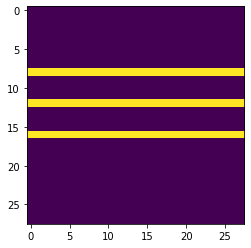

In [4]:
img7 = np.zeros(shape=(height,width))

rr, cc = draw.line_nd((height*2//7, 0), (height*2//7, width))  
img7[rr, cc] = strength

rr, cc = draw.line_nd((height*3//7, 0), (height*3//7, width))  
img7[rr, cc] = strength

rr, cc = draw.line_nd((height*4//7, 0), (height*4//7, width))  
img7[rr, cc] = strength

plt.imshow(img7)
plt.show()

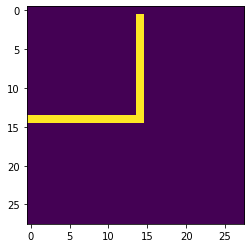

In [5]:
img7 = np.zeros(shape=(height,width))
middle_height = height // 2
middle_width = width // 2

#left horizontal line
rr_left_3, cc_left_3 = draw.line_nd((middle_height, 0), (middle_height, middle_width))  
img7[rr_left_3, cc_left_3] = strength

#right horizontal line
rr_right_3, cc_right_3 = draw.line_nd((middle_height, middle_width), (0, middle_width))  
img7[rr_right_3, cc_right_3] = strength

plt.imshow(img7)
plt.show()

In [6]:
sim7 = Simulation(stimulus=img7, filters=filters, total_connect_strength=0.14)
voltage7, recovery7, firings7 = sim7.run(1000, True)

Simulated 100 ms of braintime in 0.09384330000000318 s of computer time.
Simulated 200 ms of braintime in 0.17560560000001146 s of computer time.
Simulated 300 ms of braintime in 0.2549874000000045 s of computer time.
Simulated 400 ms of braintime in 0.3586328000000094 s of computer time.
Simulated 500 ms of braintime in 0.4484776000000039 s of computer time.
Simulated 600 ms of braintime in 0.5222590999999994 s of computer time.
Simulated 700 ms of braintime in 0.612780100000009 s of computer time.
Simulated 800 ms of braintime in 0.6975625000000036 s of computer time.
Simulated 900 ms of braintime in 0.7705863999999991 s of computer time.
Simulation took 0.8525542000000002 s


In [7]:
firing_stats(firings7)

{'max': 43.0, 'min': 0.0, 'mean': 0.24170918367346939, 'median': 0.0}

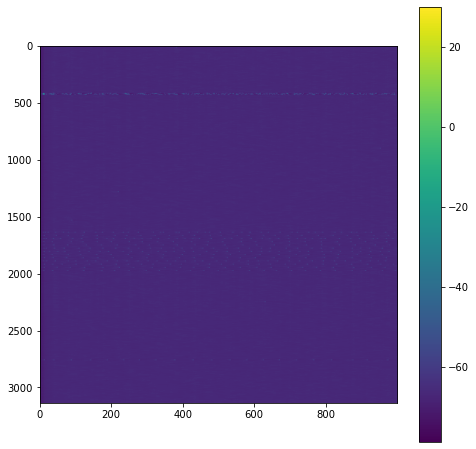

In [8]:
voltage_out = voltage7.copy()
voltage_out[voltage_out >= 30] = 30

h, w = voltage_out.shape

fig, ax = plt.subplots(figsize=(8,8))
plt.imshow(voltage_out) 
plt.colorbar()

ax.set_aspect(w/h)
plt.show()

In [15]:
if firings7.shape[0] != 1000:
    firings7 = firings7.T

angle_indices = [((height*width*i, height*width*(i+1)), np.zeros((1000, height, width))) for i in range(len(filters))]

for i,f in enumerate(firings7):
    fired = np.nonzero(f)[0]
    for neuron in fired:
        for j, angle in enumerate(angle_indices):
            if angle[0][0] <= neuron < angle[0][1]:
                x = (neuron - (width*height*j)) % width
                y = (neuron - (width*height*j)) // width
                
                angle_indices[j][1][i,y,x] = strength
                
                print('ANGLE', j, 'TIME', i, 'COORDS', x, y)

ANGLE 0 TIME 12 COORDS 2 9
ANGLE 0 TIME 12 COORDS 5 9
ANGLE 0 TIME 12 COORDS 7 9
ANGLE 0 TIME 12 COORDS 12 9
ANGLE 0 TIME 12 COORDS 15 9
ANGLE 0 TIME 12 COORDS 23 9
ANGLE 0 TIME 12 COORDS 3 13
ANGLE 0 TIME 12 COORDS 6 13
ANGLE 0 TIME 12 COORDS 7 13
ANGLE 0 TIME 12 COORDS 14 13
ANGLE 0 TIME 12 COORDS 18 13
ANGLE 0 TIME 12 COORDS 19 13
ANGLE 0 TIME 12 COORDS 22 13
ANGLE 0 TIME 12 COORDS 26 13
ANGLE 0 TIME 12 COORDS 2 17
ANGLE 0 TIME 12 COORDS 4 17
ANGLE 0 TIME 12 COORDS 5 17
ANGLE 0 TIME 12 COORDS 7 17
ANGLE 0 TIME 12 COORDS 10 17
ANGLE 0 TIME 12 COORDS 12 17
ANGLE 0 TIME 12 COORDS 14 17
ANGLE 0 TIME 12 COORDS 17 17
ANGLE 0 TIME 12 COORDS 18 17
ANGLE 0 TIME 12 COORDS 19 17
ANGLE 0 TIME 12 COORDS 20 17
ANGLE 0 TIME 12 COORDS 23 17
ANGLE 0 TIME 12 COORDS 24 17
ANGLE 0 TIME 12 COORDS 27 17
ANGLE 0 TIME 13 COORDS 1 9
ANGLE 0 TIME 13 COORDS 3 9
ANGLE 0 TIME 13 COORDS 4 9
ANGLE 0 TIME 13 COORDS 9 9
ANGLE 0 TIME 13 COORDS 11 9
ANGLE 0 TIME 13 COORDS 13 9
ANGLE 0 TIME 13 COORDS 14 9
ANGLE 0 TIME

ANGLE 0 TIME 180 COORDS 23 13
ANGLE 0 TIME 181 COORDS 26 7
ANGLE 0 TIME 181 COORDS 4 9
ANGLE 0 TIME 181 COORDS 6 9
ANGLE 0 TIME 181 COORDS 20 9
ANGLE 0 TIME 181 COORDS 24 13
ANGLE 0 TIME 182 COORDS 4 13
ANGLE 0 TIME 183 COORDS 7 9
ANGLE 0 TIME 183 COORDS 16 13
ANGLE 0 TIME 183 COORDS 21 17
ANGLE 0 TIME 183 COORDS 26 17
ANGLE 0 TIME 183 COORDS 18 22
ANGLE 0 TIME 184 COORDS 16 17
ANGLE 0 TIME 184 COORDS 18 26
ANGLE 0 TIME 187 COORDS 24 17
ANGLE 0 TIME 188 COORDS 8 13
ANGLE 0 TIME 188 COORDS 13 17
ANGLE 0 TIME 189 COORDS 7 13
ANGLE 0 TIME 191 COORDS 25 9
ANGLE 0 TIME 191 COORDS 12 18
ANGLE 0 TIME 192 COORDS 24 9
ANGLE 0 TIME 193 COORDS 22 17
ANGLE 0 TIME 194 COORDS 20 13
ANGLE 0 TIME 195 COORDS 19 17
ANGLE 0 TIME 197 COORDS 11 9
ANGLE 0 TIME 197 COORDS 17 17
ANGLE 0 TIME 199 COORDS 1 13
ANGLE 0 TIME 200 COORDS 3 9
ANGLE 0 TIME 200 COORDS 22 13
ANGLE 0 TIME 200 COORDS 26 13
ANGLE 0 TIME 201 COORDS 15 9
ANGLE 0 TIME 201 COORDS 6 13
ANGLE 0 TIME 202 COORDS 4 9
ANGLE 0 TIME 202 COORDS 9 17
AN

ANGLE 0 TIME 315 COORDS 23 13
ANGLE 0 TIME 315 COORDS 16 17
ANGLE 0 TIME 316 COORDS 6 13
ANGLE 0 TIME 317 COORDS 8 25
ANGLE 0 TIME 318 COORDS 13 17
ANGLE 0 TIME 320 COORDS 4 9
ANGLE 0 TIME 320 COORDS 26 13
ANGLE 0 TIME 321 COORDS 12 9
ANGLE 0 TIME 321 COORDS 14 13
ANGLE 0 TIME 322 COORDS 25 9
ANGLE 0 TIME 322 COORDS 27 9
ANGLE 0 TIME 322 COORDS 17 17
ANGLE 0 TIME 322 COORDS 25 17
ANGLE 0 TIME 324 COORDS 11 9
ANGLE 0 TIME 324 COORDS 22 9
ANGLE 0 TIME 326 COORDS 20 9
ANGLE 0 TIME 326 COORDS 12 13
ANGLE 0 TIME 327 COORDS 2 13
ANGLE 0 TIME 328 COORDS 7 9
ANGLE 0 TIME 329 COORDS 6 17
ANGLE 0 TIME 329 COORDS 23 17
ANGLE 0 TIME 329 COORDS 24 17
ANGLE 0 TIME 330 COORDS 11 13
ANGLE 0 TIME 331 COORDS 21 17
ANGLE 0 TIME 332 COORDS 3 13
ANGLE 0 TIME 332 COORDS 18 13
ANGLE 0 TIME 333 COORDS 6 9
ANGLE 0 TIME 333 COORDS 9 17
ANGLE 0 TIME 333 COORDS 19 17
ANGLE 0 TIME 334 COORDS 21 9
ANGLE 0 TIME 334 COORDS 10 13
ANGLE 0 TIME 334 COORDS 24 13
ANGLE 0 TIME 334 COORDS 3 17
ANGLE 0 TIME 336 COORDS 22 13


ANGLE 0 TIME 596 COORDS 1 9
ANGLE 0 TIME 596 COORDS 6 17
ANGLE 0 TIME 597 COORDS 24 9
ANGLE 0 TIME 597 COORDS 24 17
ANGLE 0 TIME 599 COORDS 21 9
ANGLE 0 TIME 600 COORDS 3 13
ANGLE 0 TIME 600 COORDS 6 13
ANGLE 0 TIME 600 COORDS 16 17
ANGLE 0 TIME 600 COORDS 21 17
ANGLE 0 TIME 600 COORDS 24 18
ANGLE 0 TIME 601 COORDS 12 9
ANGLE 0 TIME 602 COORDS 4 17
ANGLE 0 TIME 603 COORDS 6 9
ANGLE 0 TIME 603 COORDS 25 9
ANGLE 0 TIME 604 COORDS 22 9
ANGLE 0 TIME 605 COORDS 12 13
ANGLE 0 TIME 605 COORDS 18 13
ANGLE 0 TIME 605 COORDS 3 17
ANGLE 0 TIME 605 COORDS 14 17
ANGLE 0 TIME 606 COORDS 16 9
ANGLE 0 TIME 606 COORDS 27 13
ANGLE 0 TIME 607 COORDS 7 9
ANGLE 0 TIME 607 COORDS 22 17
ANGLE 0 TIME 608 COORDS 1 17
ANGLE 0 TIME 608 COORDS 13 17
ANGLE 0 TIME 609 COORDS 10 9
ANGLE 0 TIME 609 COORDS 14 9
ANGLE 0 TIME 609 COORDS 15 9
ANGLE 0 TIME 609 COORDS 8 17
ANGLE 0 TIME 610 COORDS 24 13
ANGLE 0 TIME 611 COORDS 17 17
ANGLE 0 TIME 612 COORDS 27 9
ANGLE 0 TIME 612 COORDS 15 17
ANGLE 0 TIME 613 COORDS 17 9
ANGL

ANGLE 0 TIME 883 COORDS 4 17
ANGLE 0 TIME 883 COORDS 17 17
ANGLE 0 TIME 884 COORDS 12 13
ANGLE 0 TIME 885 COORDS 11 13
ANGLE 0 TIME 885 COORDS 3 17
ANGLE 0 TIME 886 COORDS 11 9
ANGLE 0 TIME 886 COORDS 12 9
ANGLE 0 TIME 886 COORDS 20 13
ANGLE 0 TIME 886 COORDS 9 17
ANGLE 0 TIME 888 COORDS 3 9
ANGLE 0 TIME 888 COORDS 16 9
ANGLE 0 TIME 888 COORDS 19 9
ANGLE 0 TIME 888 COORDS 24 9
ANGLE 0 TIME 888 COORDS 18 13
ANGLE 0 TIME 888 COORDS 24 13
ANGLE 0 TIME 888 COORDS 14 17
ANGLE 0 TIME 889 COORDS 3 13
ANGLE 0 TIME 889 COORDS 13 17
ANGLE 0 TIME 890 COORDS 22 9
ANGLE 0 TIME 890 COORDS 4 13
ANGLE 0 TIME 890 COORDS 6 13
ANGLE 0 TIME 890 COORDS 7 17
ANGLE 0 TIME 890 COORDS 16 17
ANGLE 0 TIME 892 COORDS 9 13
ANGLE 0 TIME 892 COORDS 15 13
ANGLE 0 TIME 892 COORDS 26 17
ANGLE 0 TIME 893 COORDS 17 9
ANGLE 0 TIME 893 COORDS 19 17
ANGLE 0 TIME 894 COORDS 10 9
ANGLE 0 TIME 894 COORDS 11 17
ANGLE 0 TIME 895 COORDS 20 9
ANGLE 0 TIME 895 COORDS 6 17
ANGLE 0 TIME 895 COORDS 12 17
ANGLE 0 TIME 895 COORDS 15 17


In [11]:
voltage7_reshaped = voltage7.T.reshape((1000, 4, height, width))
voltage7_reshaped.shape

(1000, 4, 28, 28)

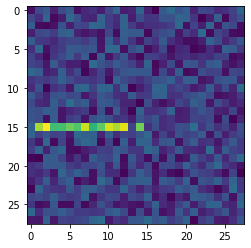

0


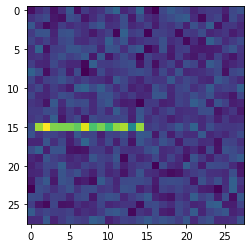

1


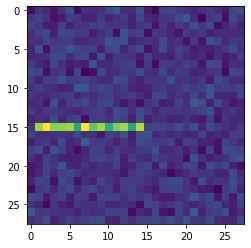

2


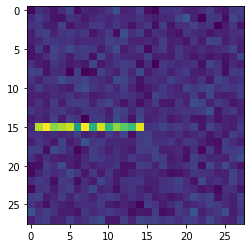

3


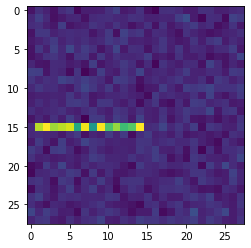

4


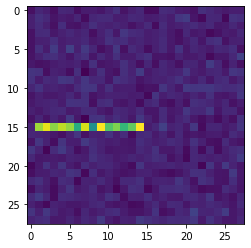

5


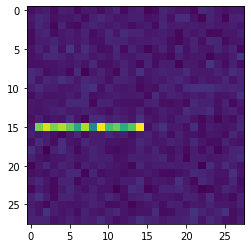

6


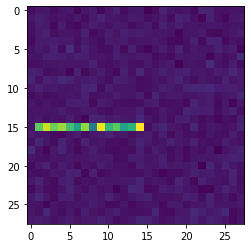

7


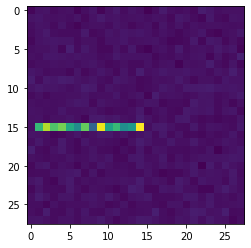

8


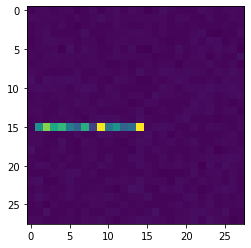

9


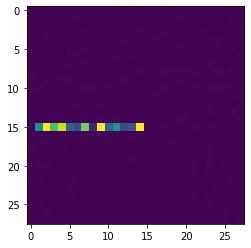

10


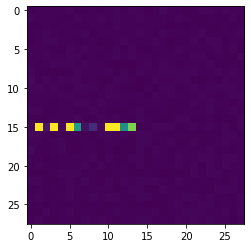

11


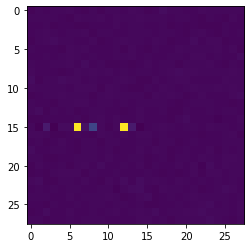

12


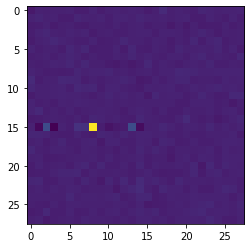

13


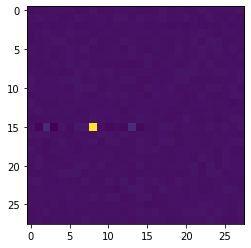

14


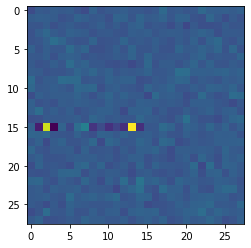

15


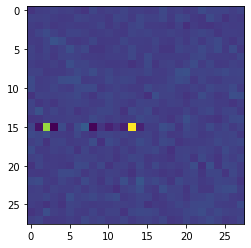

16


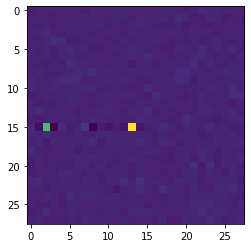

17


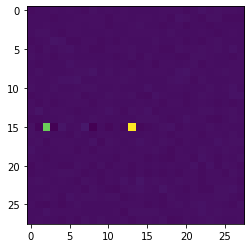

18


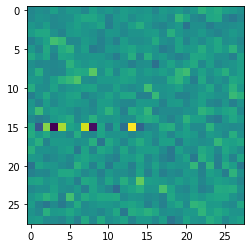

19


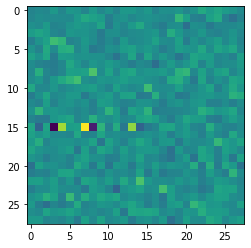

20


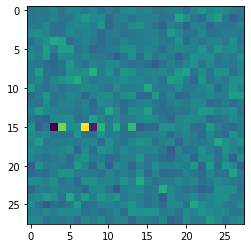

21


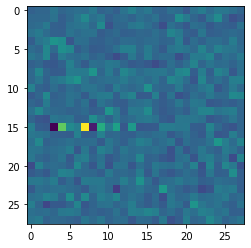

22


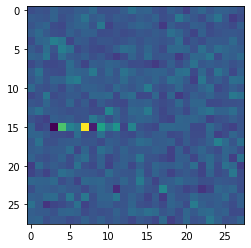

23


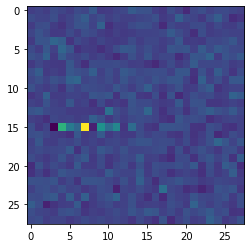

24


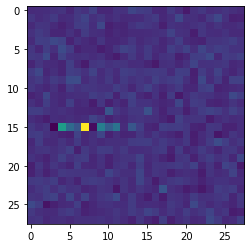

25


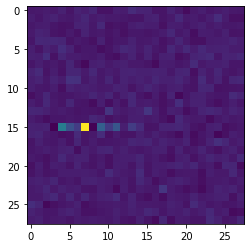

26


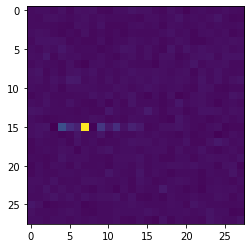

27


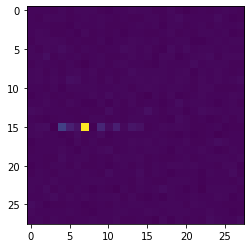

28


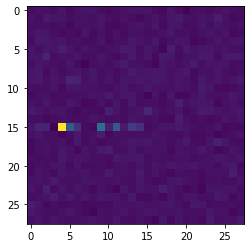

29


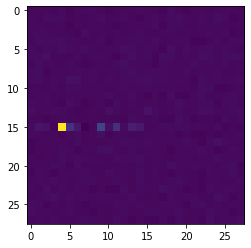

30


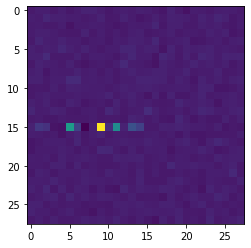

31


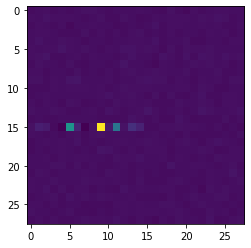

32


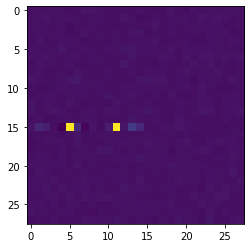

33


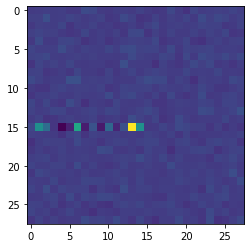

34


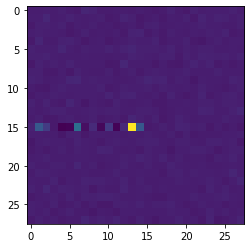

35


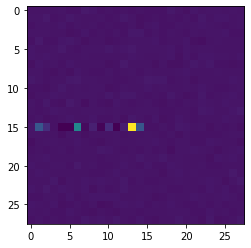

36


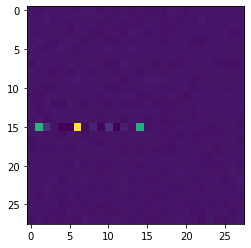

37


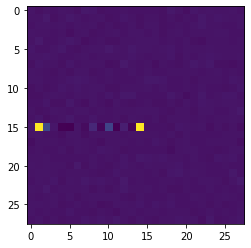

38


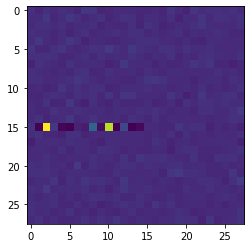

39


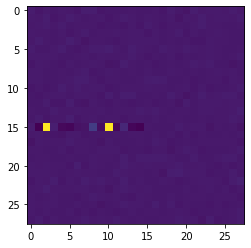

40


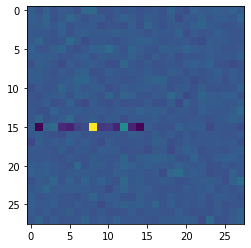

41


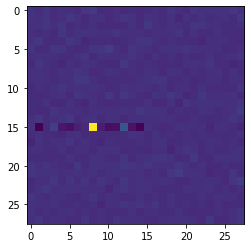

42


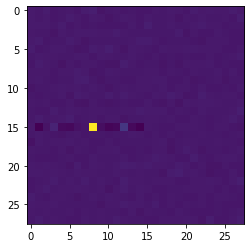

43


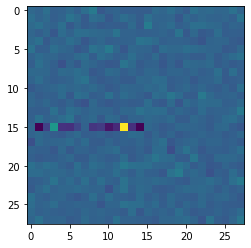

44


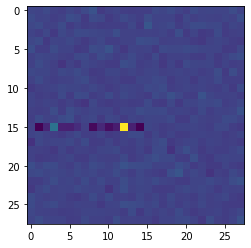

45


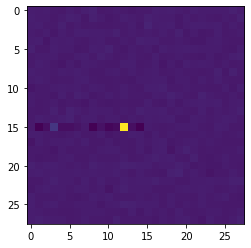

46


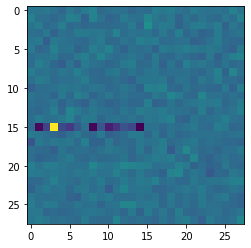

47


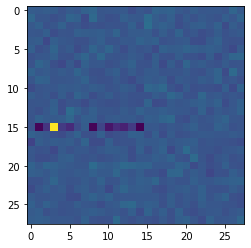

48


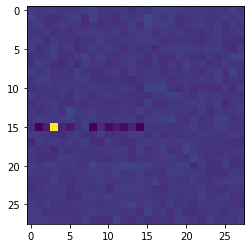

49


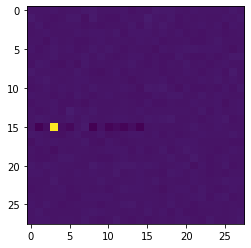

50


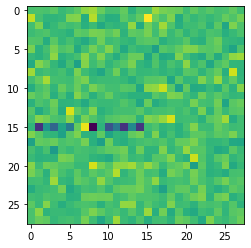

51


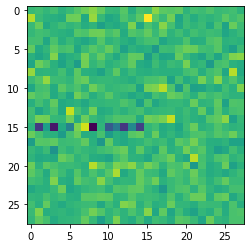

52


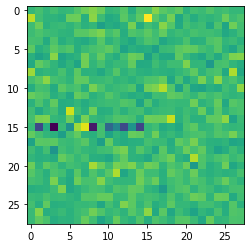

53


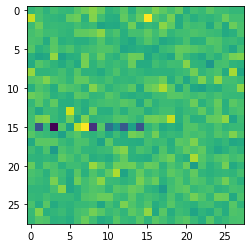

54


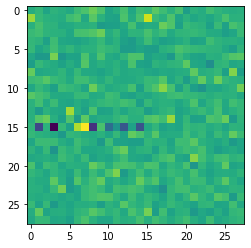

55


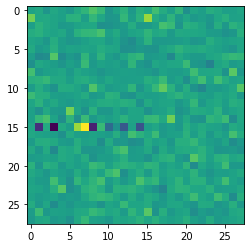

56


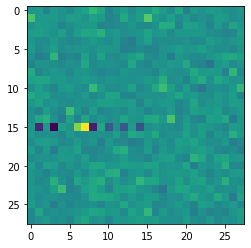

57


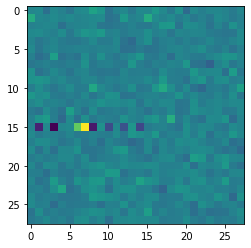

58


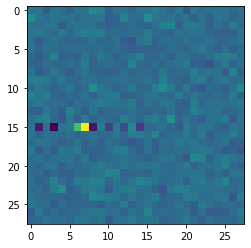

59


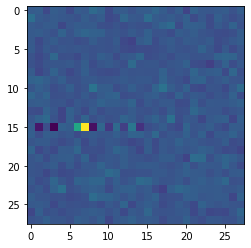

60


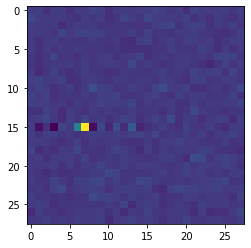

61


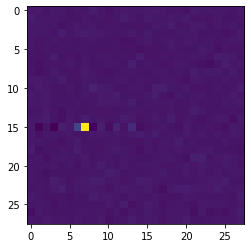

62


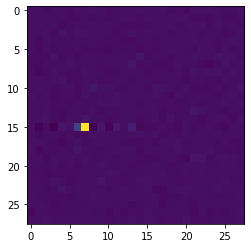

63


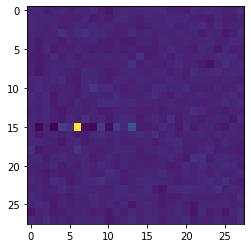

64


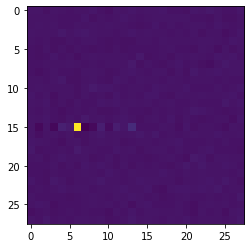

65


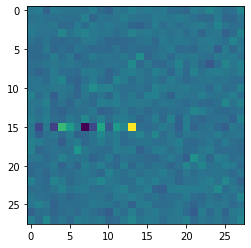

66


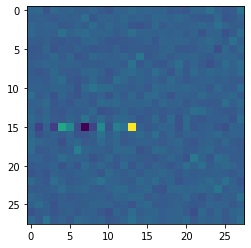

67


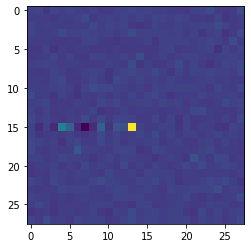

68


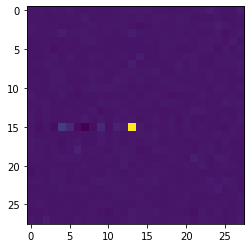

69


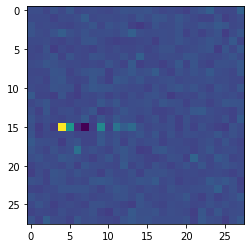

70


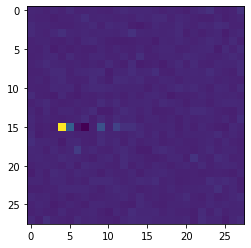

71


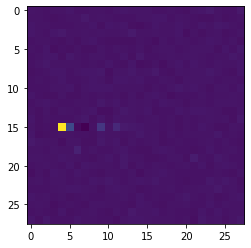

72


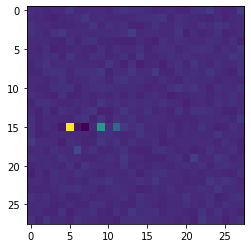

73


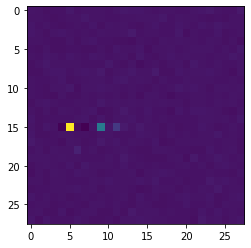

74


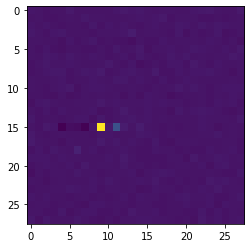

75


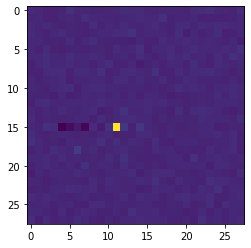

76


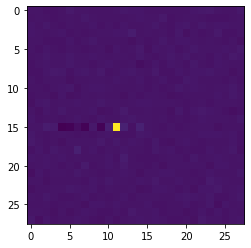

77


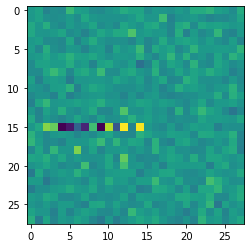

78


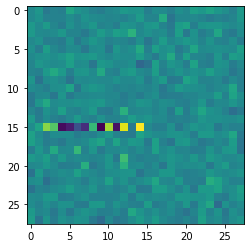

79


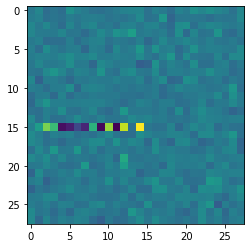

80


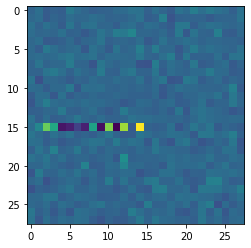

81


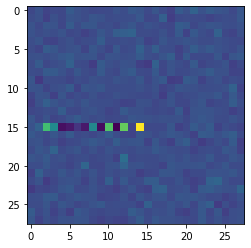

82


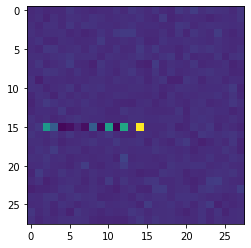

83


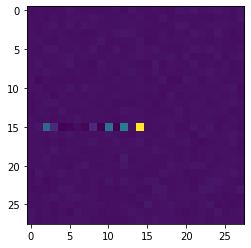

84


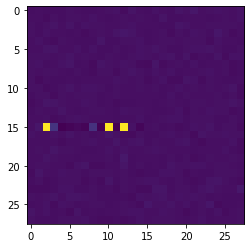

85


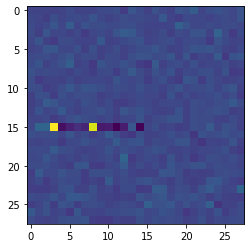

86


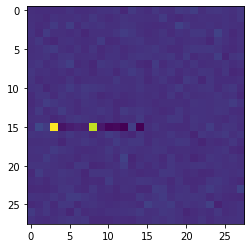

87


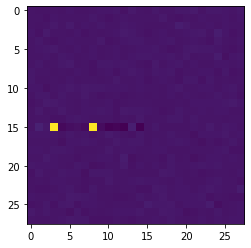

88


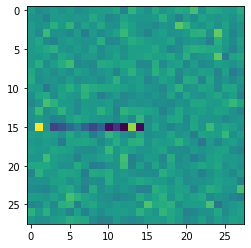

89


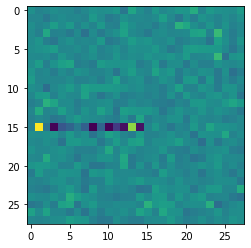

90


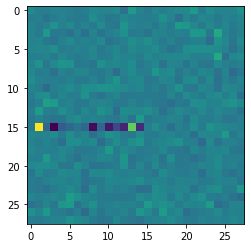

91


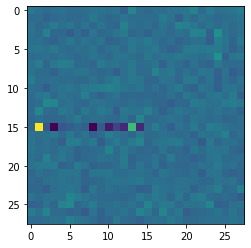

92


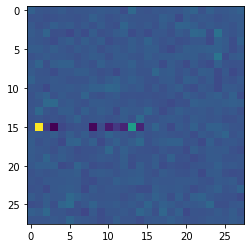

93


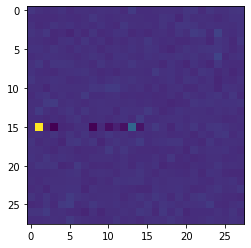

94


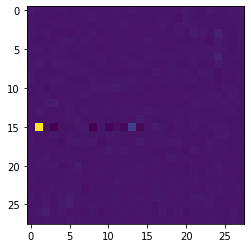

95


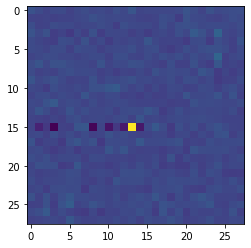

96


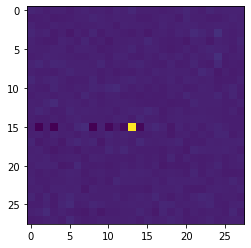

97


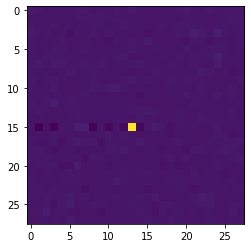

98


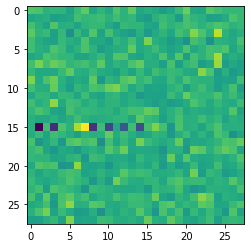

99


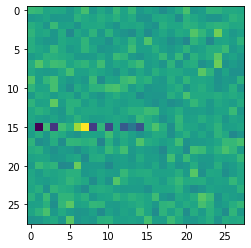

100


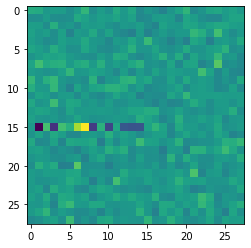

101


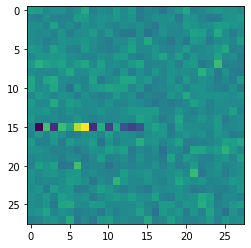

102


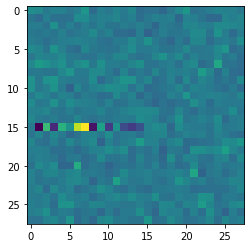

103


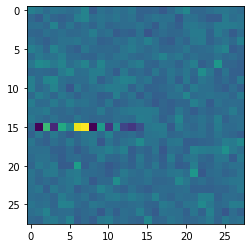

104


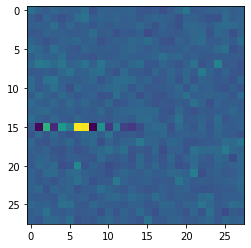

105


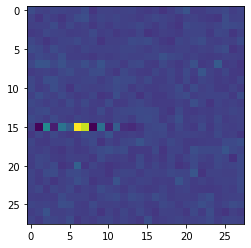

106


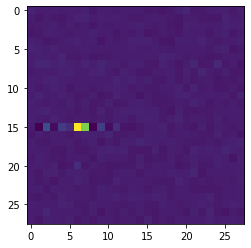

107


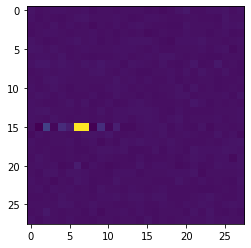

108


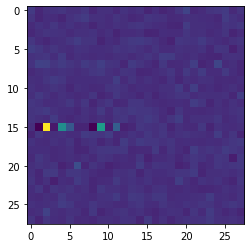

109


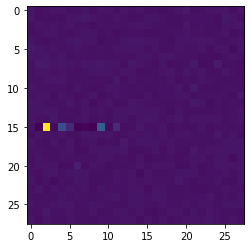

110


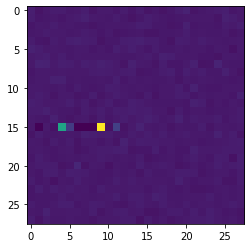

111


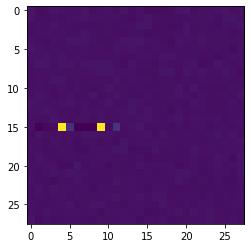

112


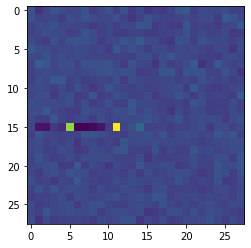

113


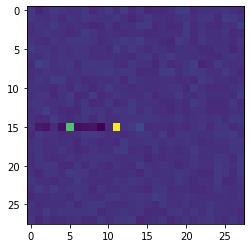

114


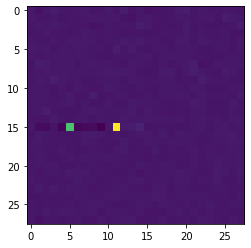

115


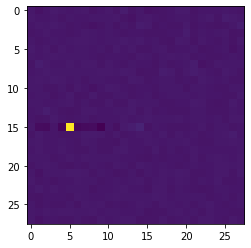

116


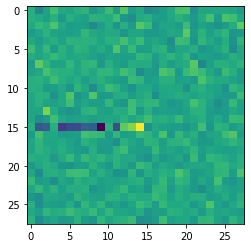

117


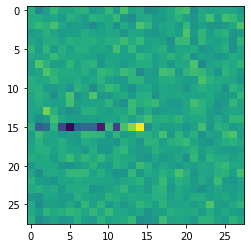

118


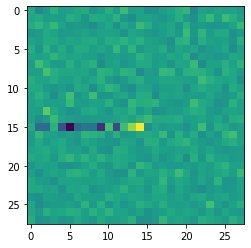

119


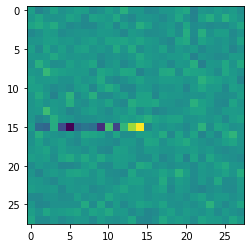

120


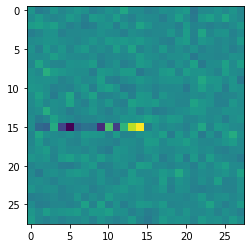

121


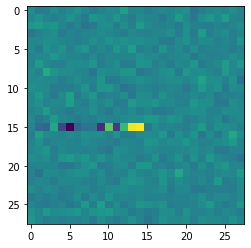

122


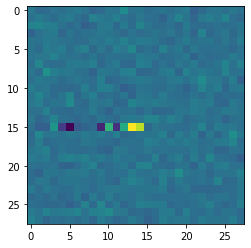

123


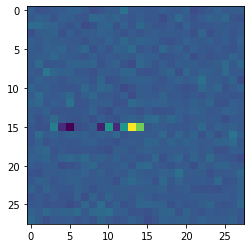

124


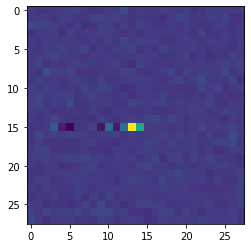

125


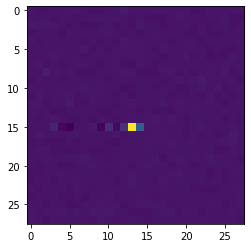

126


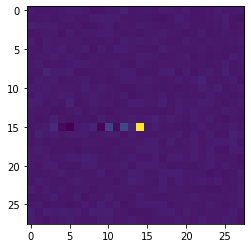

127


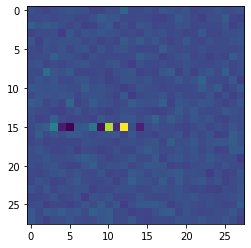

128


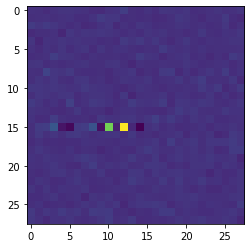

129


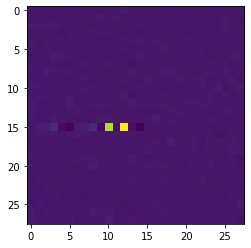

130


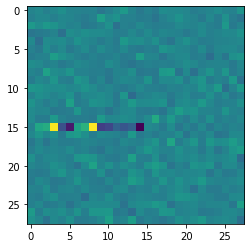

131


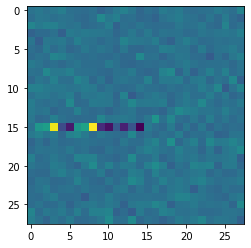

132


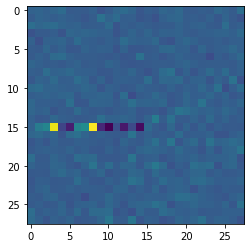

133


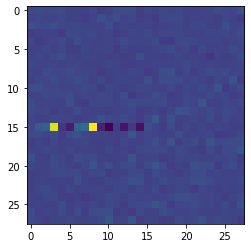

134


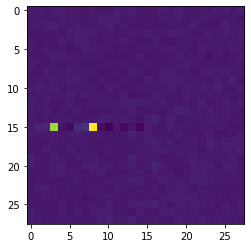

135


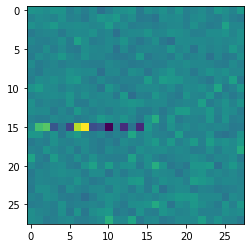

136


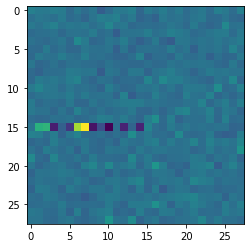

137


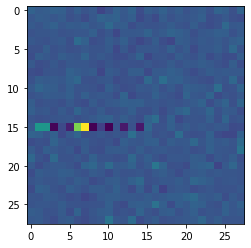

138


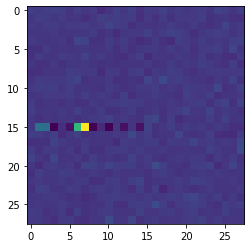

139


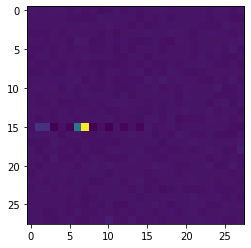

140


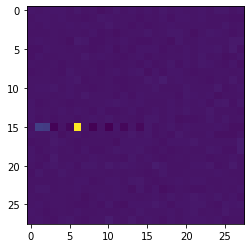

141


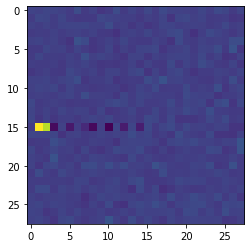

142


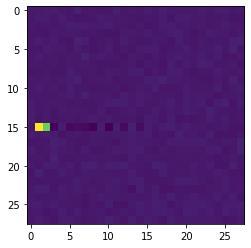

143


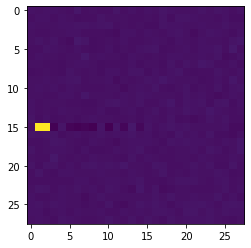

144


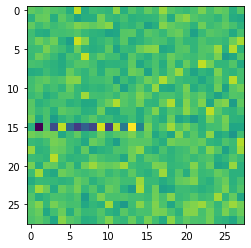

145


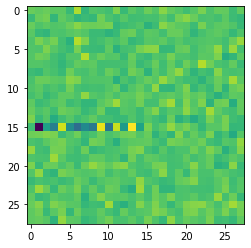

146


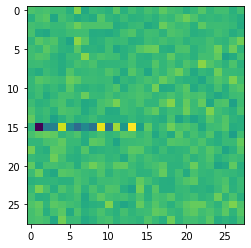

147


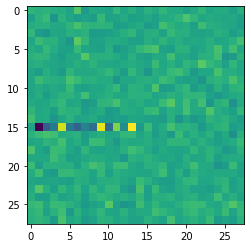

148


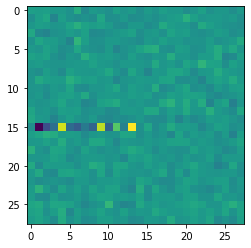

149


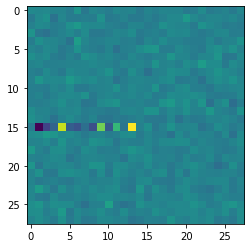

150


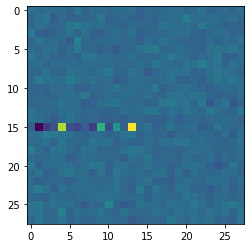

151


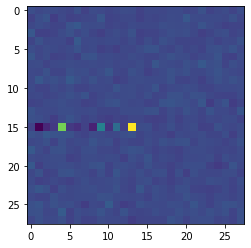

152


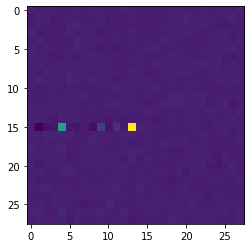

153


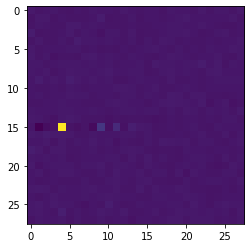

154


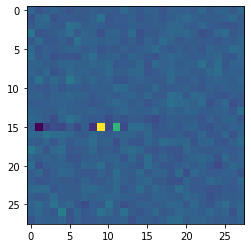

155


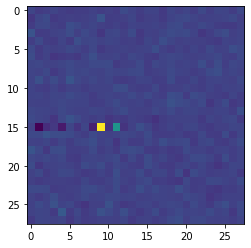

156


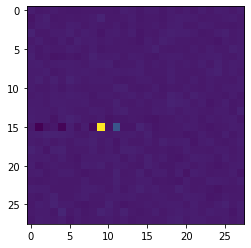

157


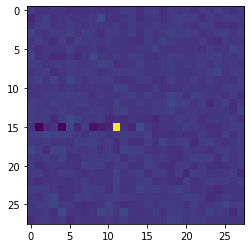

158


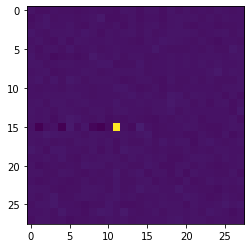

159


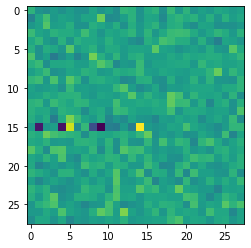

160


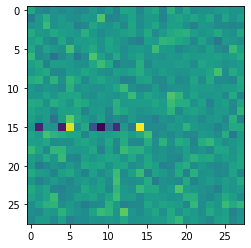

161


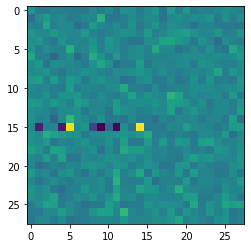

162


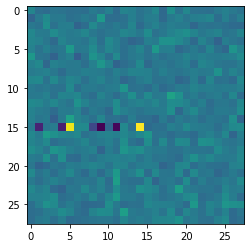

163


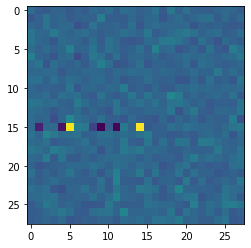

164


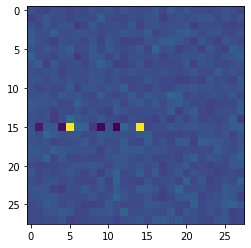

165


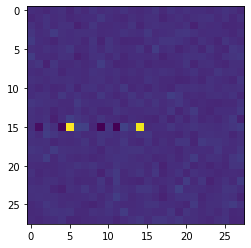

166


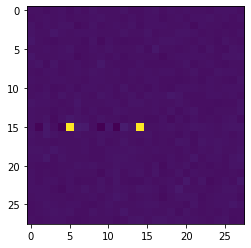

167


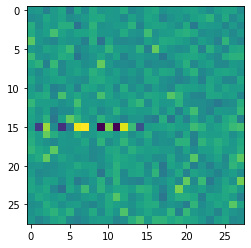

168


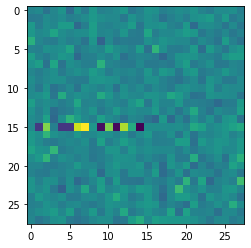

169


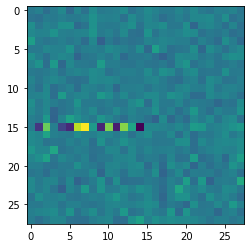

170


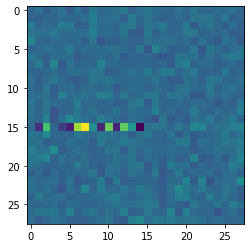

171


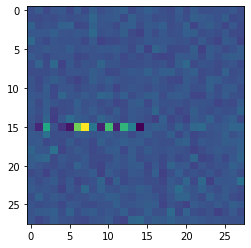

172


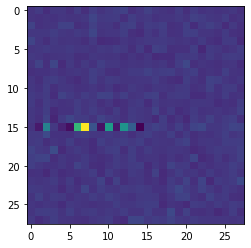

173


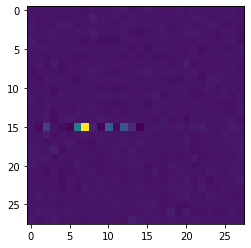

174


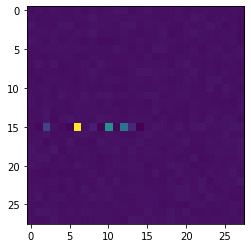

175


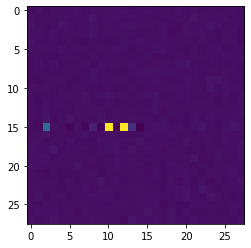

176


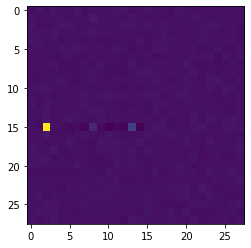

177


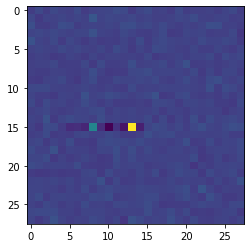

178


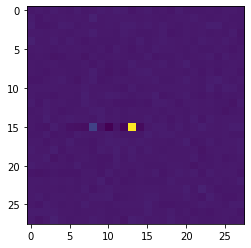

179


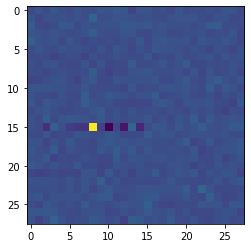

180


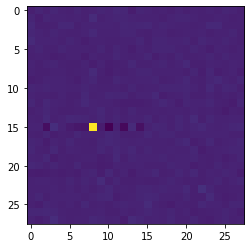

181


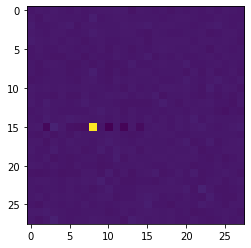

182


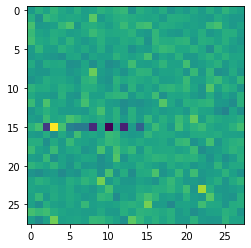

183


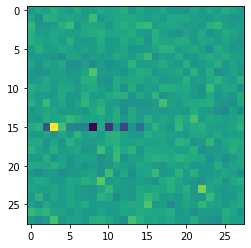

184


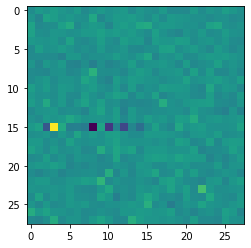

185


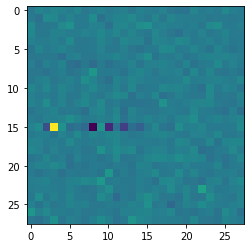

186


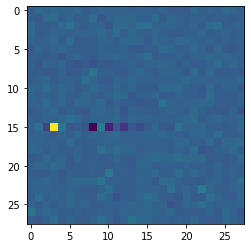

187


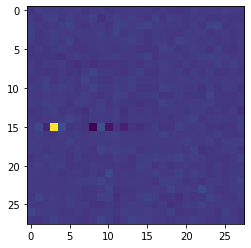

188


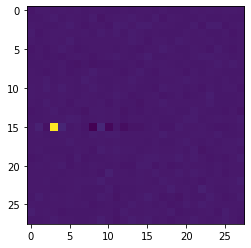

189


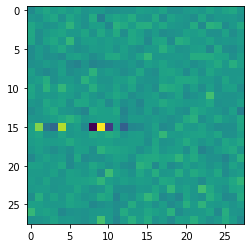

190


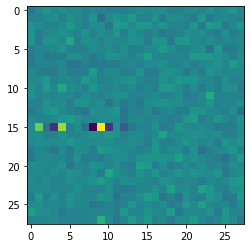

191


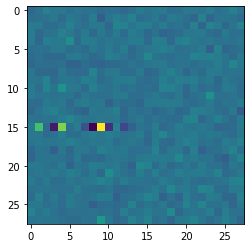

192


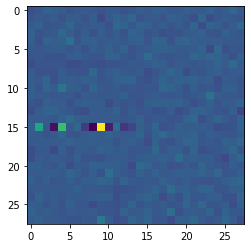

193


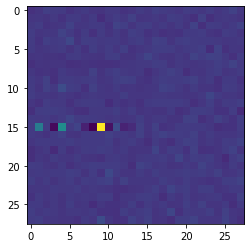

194


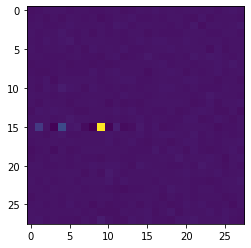

195


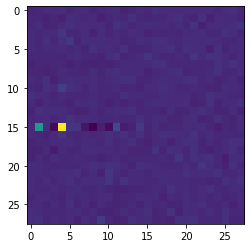

196


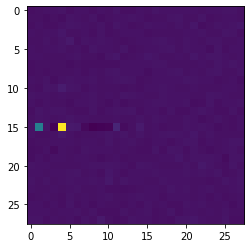

197


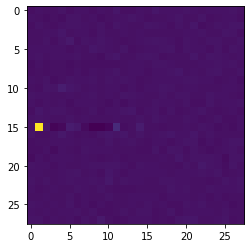

198


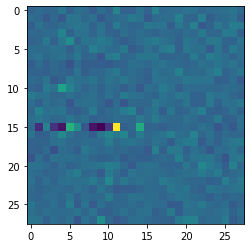

199


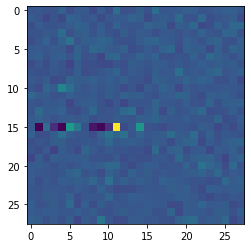

200


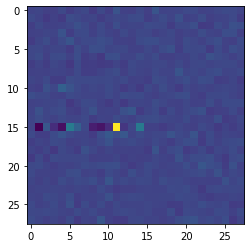

201


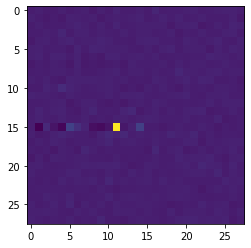

202


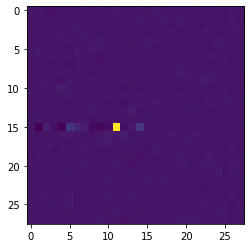

203


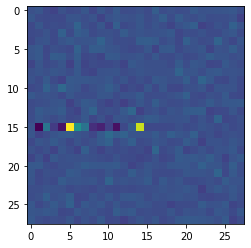

204


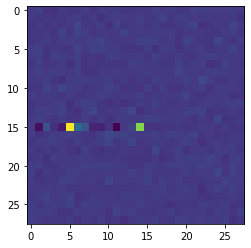

205


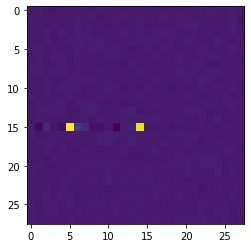

206


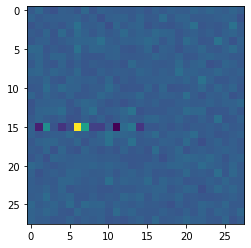

207


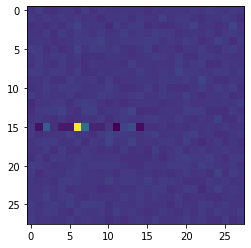

208


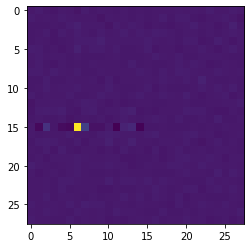

209


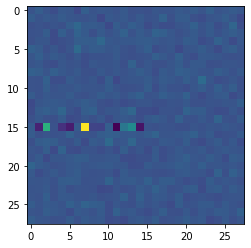

210


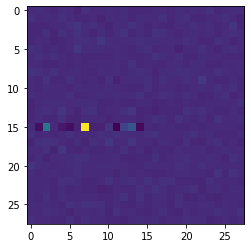

211


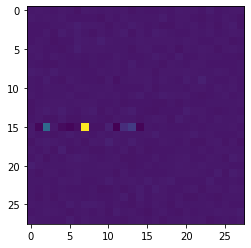

212


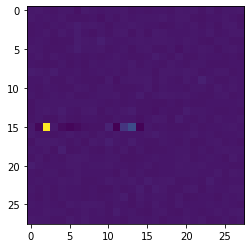

213


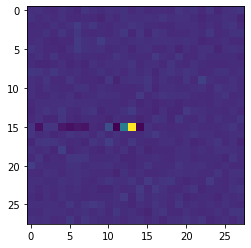

214


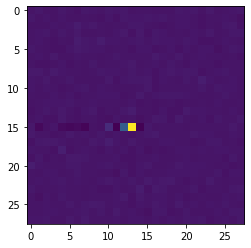

215


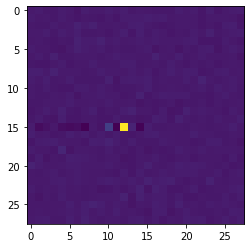

216


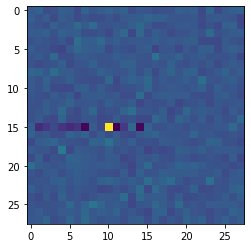

217


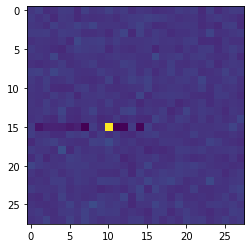

218


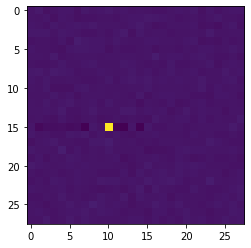

219


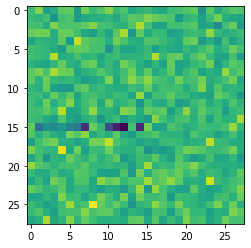

220


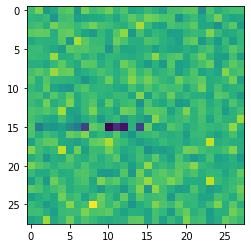

221


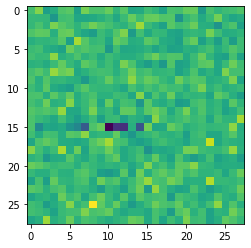

222


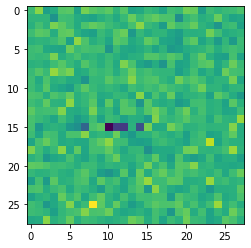

223


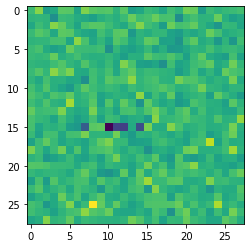

224


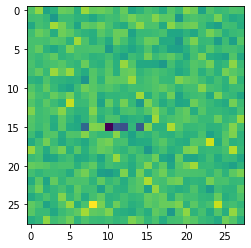

225


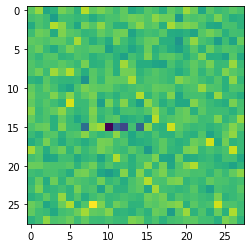

226


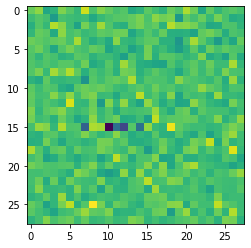

227


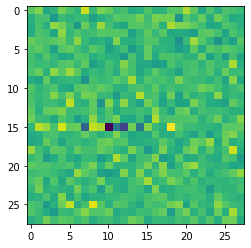

228


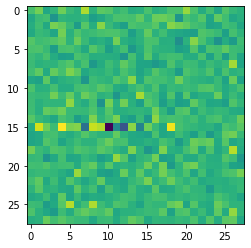

229


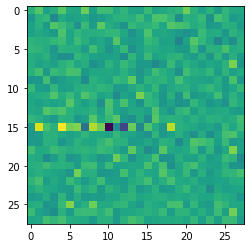

230


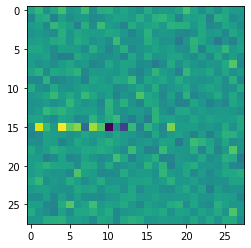

231


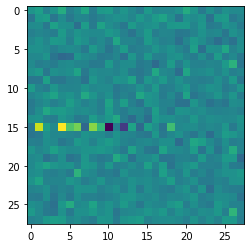

232


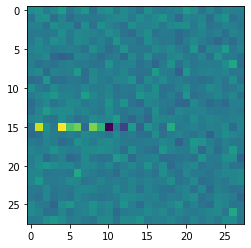

233


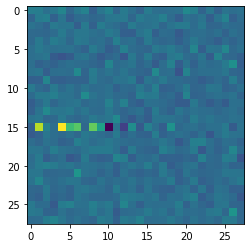

234


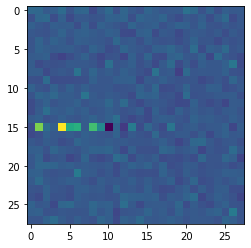

235


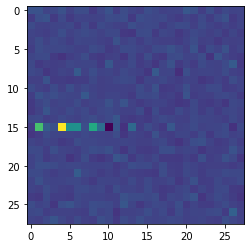

236


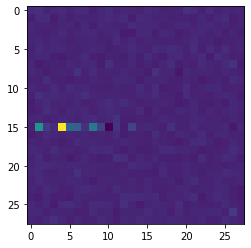

237


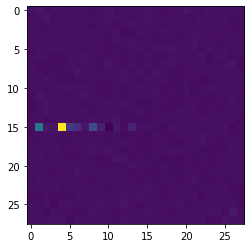

238


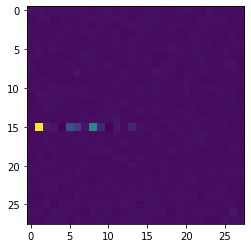

239


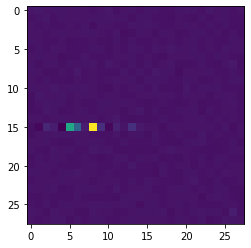

240


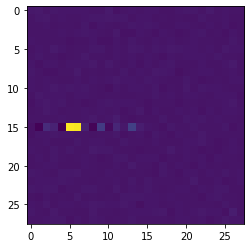

241


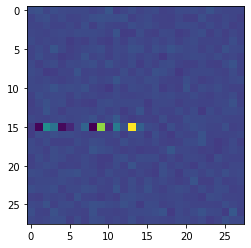

242


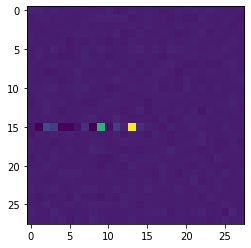

243


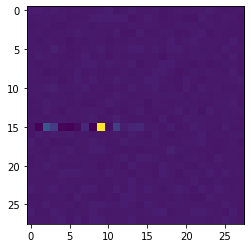

244


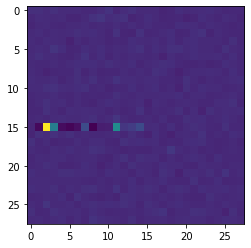

245


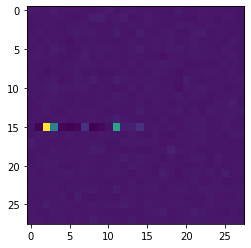

246


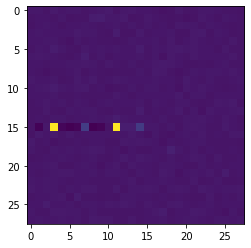

247


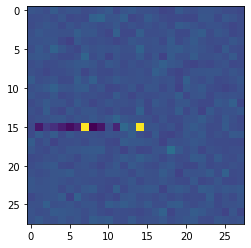

248


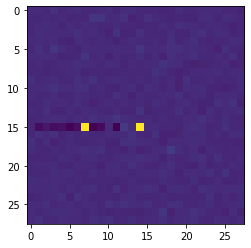

249


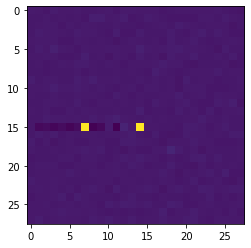

250


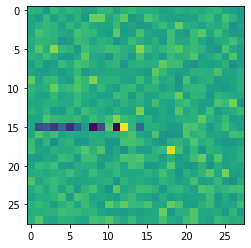

251


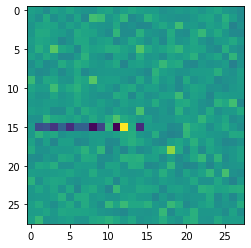

252


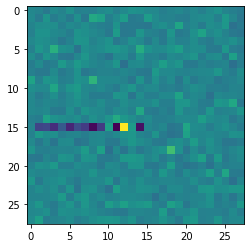

253


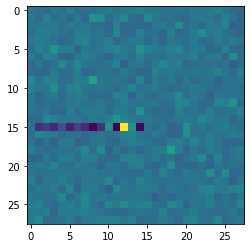

254


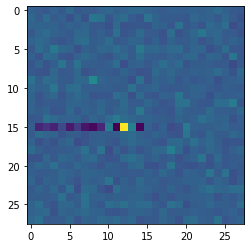

255


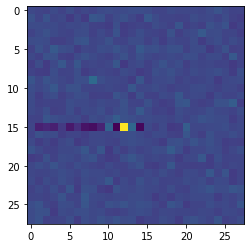

256


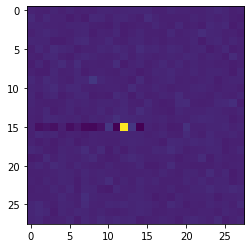

257


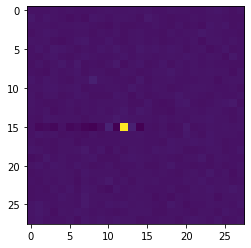

258


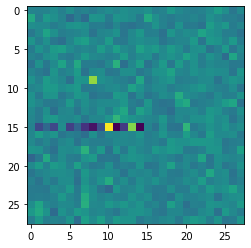

259


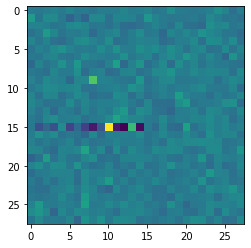

260


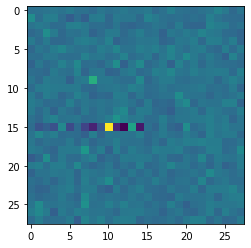

261


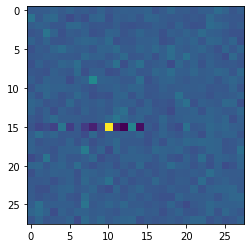

262


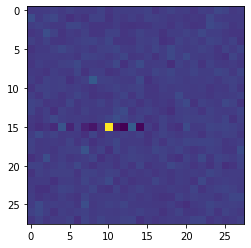

263


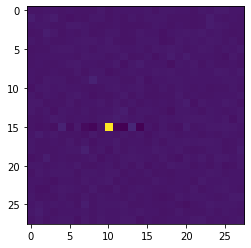

264


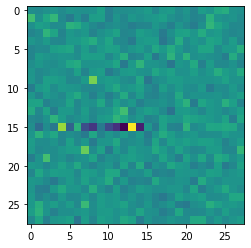

265


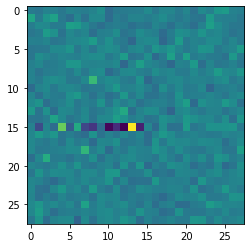

266


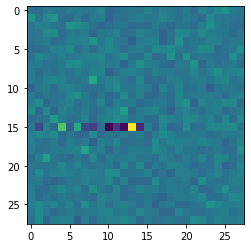

267


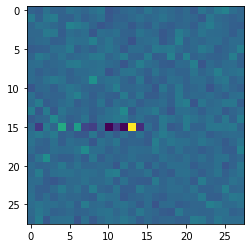

268


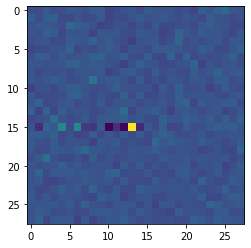

269


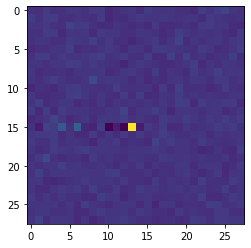

270


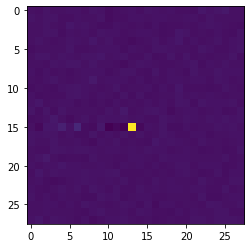

271


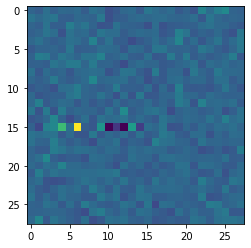

272


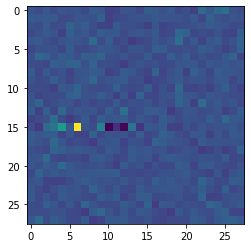

273


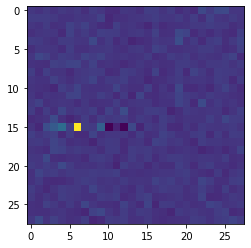

274


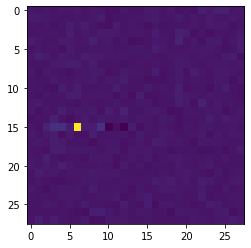

275


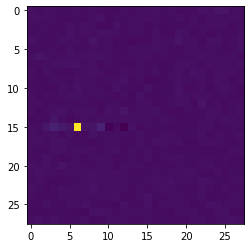

276


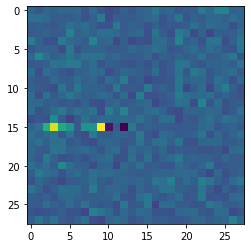

277


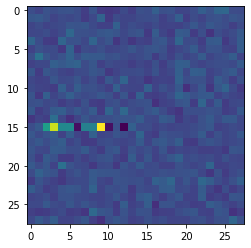

278


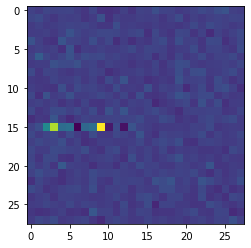

279


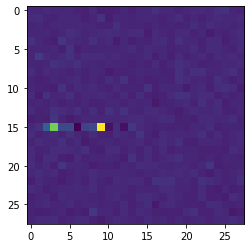

280


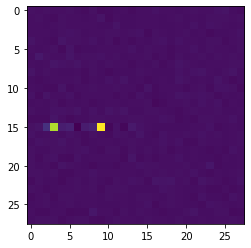

281


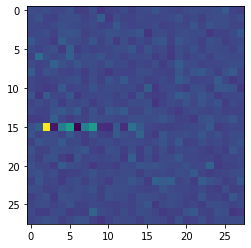

282


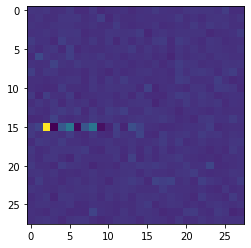

283


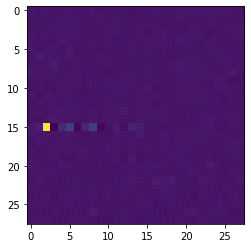

284


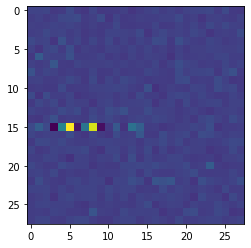

285


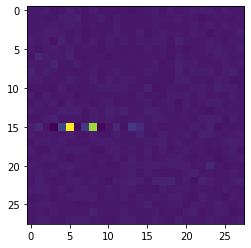

286


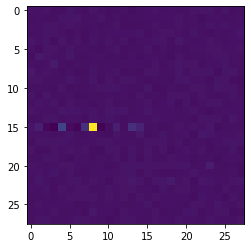

287


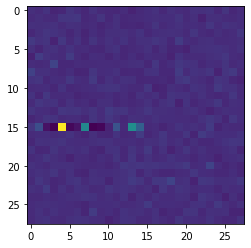

288


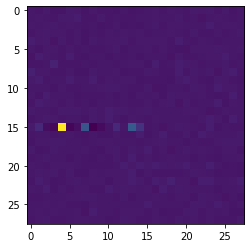

289


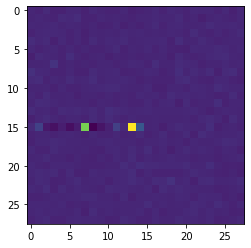

290


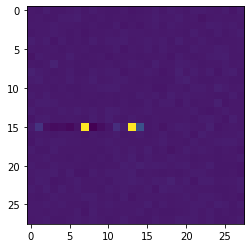

291


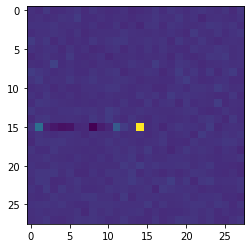

292


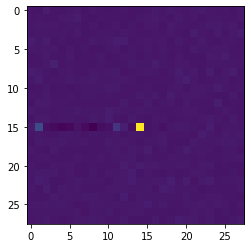

293


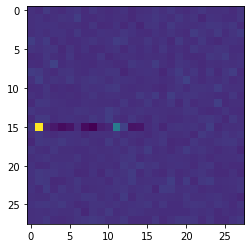

294


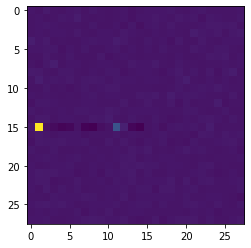

295


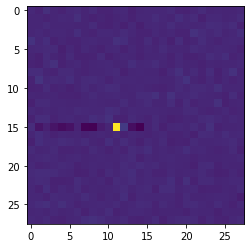

296


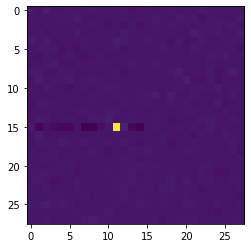

297


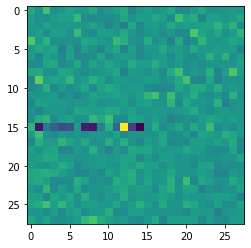

298


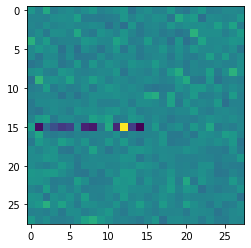

299


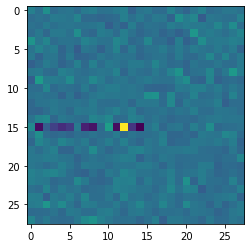

300


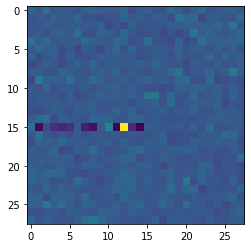

301


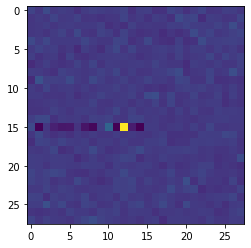

302


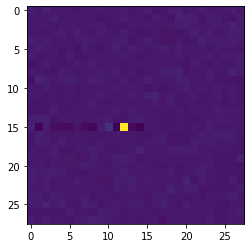

303


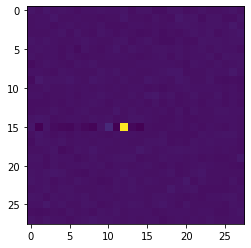

304


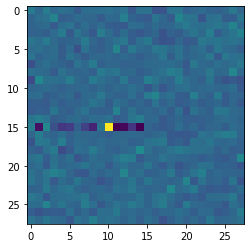

305


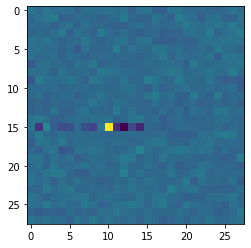

306


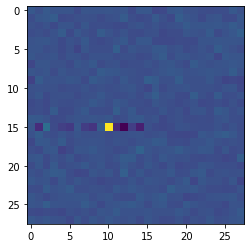

307


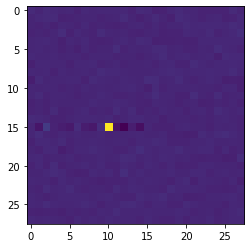

308


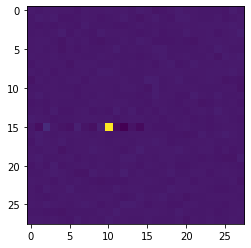

309


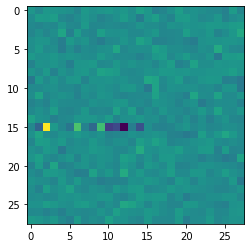

310


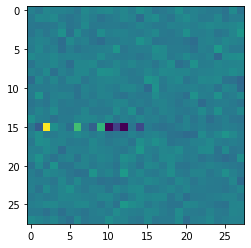

311


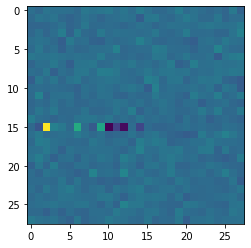

312


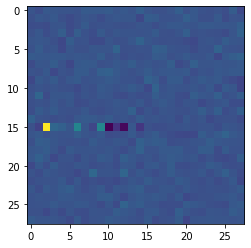

313


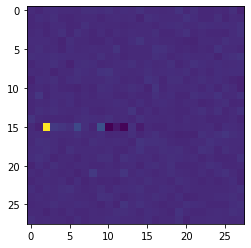

314


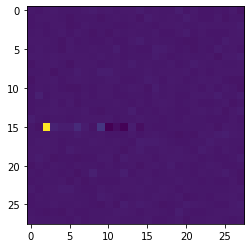

315


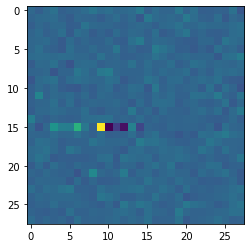

316


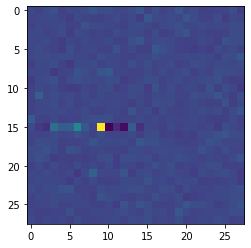

317


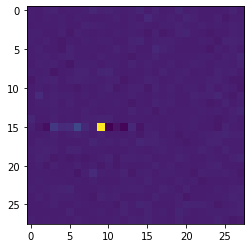

318


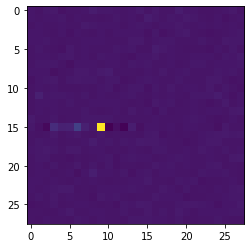

319


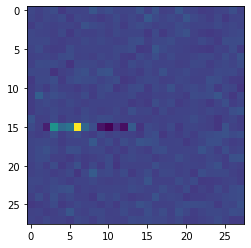

320


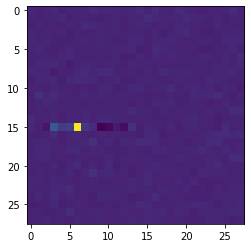

321


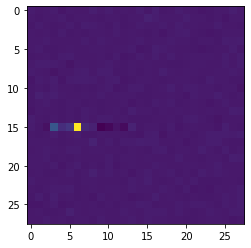

322


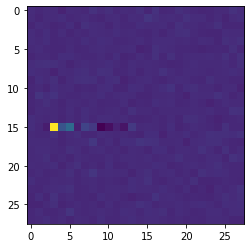

323


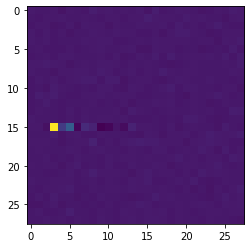

324


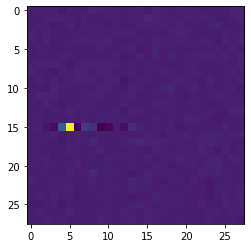

325


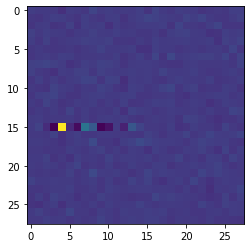

326


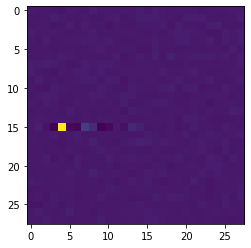

327


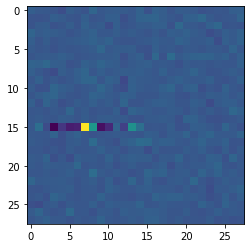

328


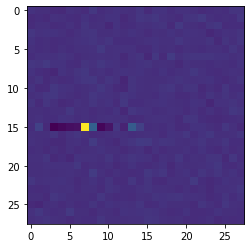

329


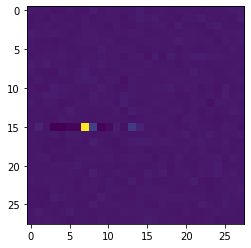

330


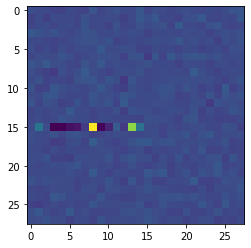

331


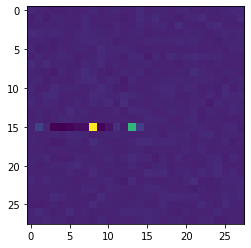

332


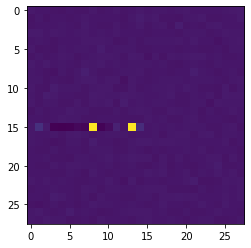

333


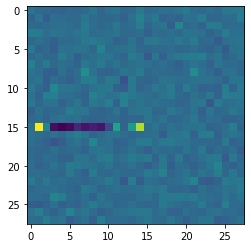

334


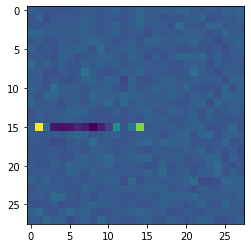

335


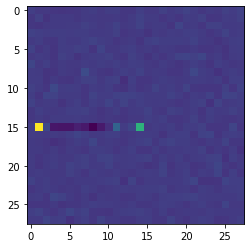

336


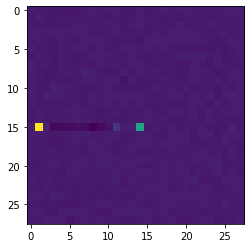

337


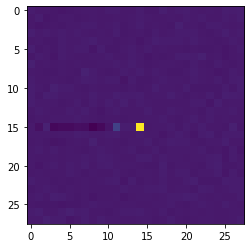

338


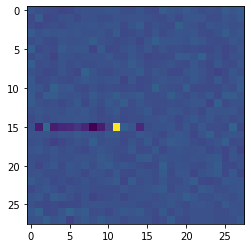

339


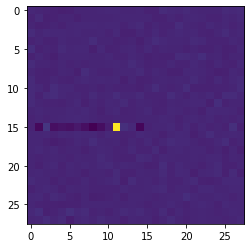

340


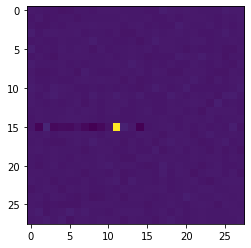

341


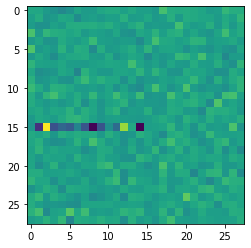

342


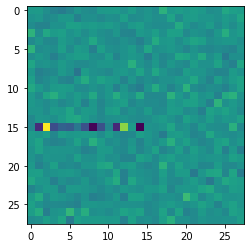

343


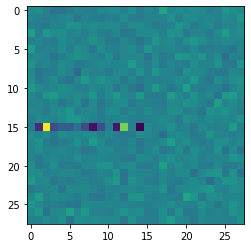

344


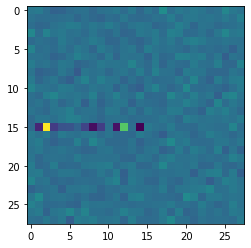

345


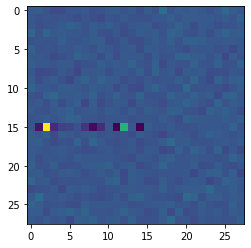

346


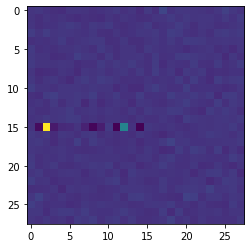

347


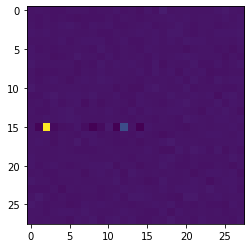

348


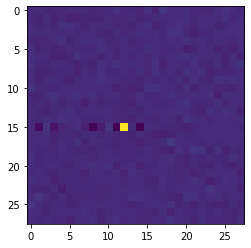

349


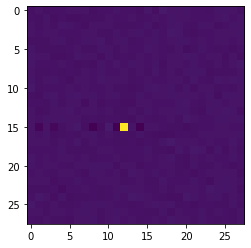

350


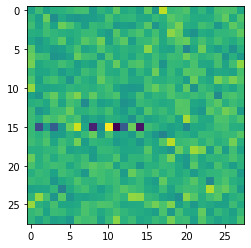

351


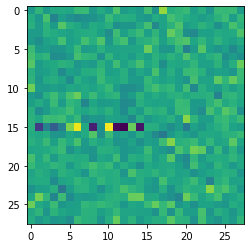

352


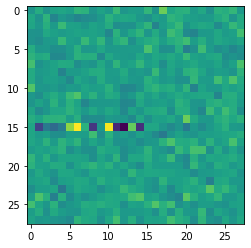

353


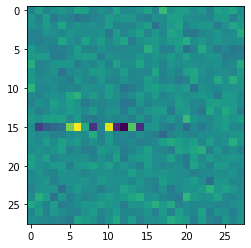

354


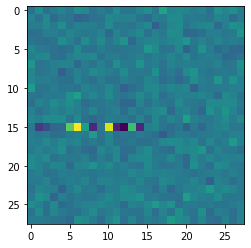

355


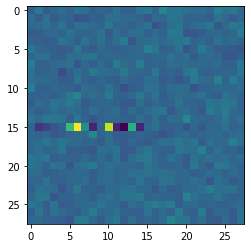

356


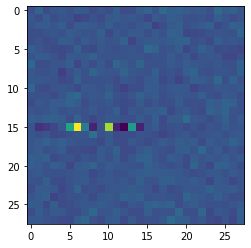

357


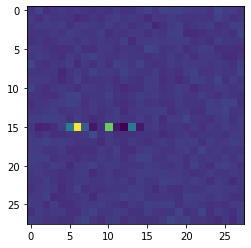

358


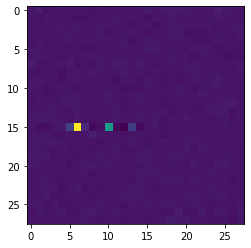

359


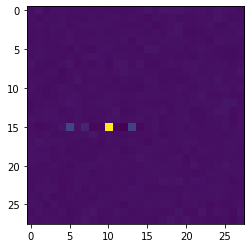

360


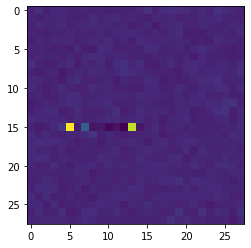

361


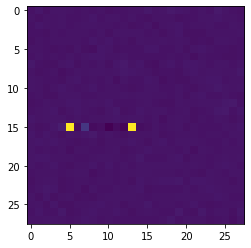

362


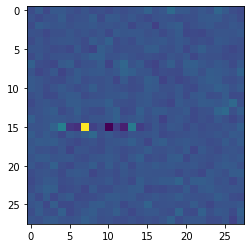

363


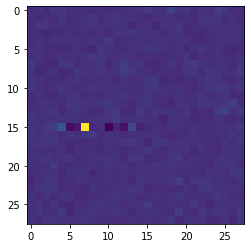

364


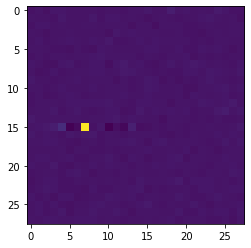

365


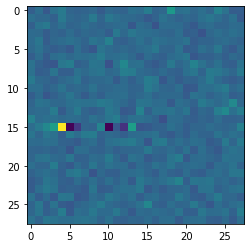

366


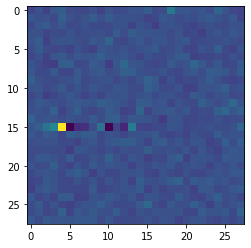

367


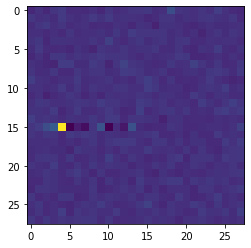

368


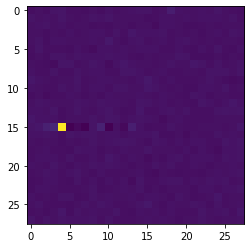

369


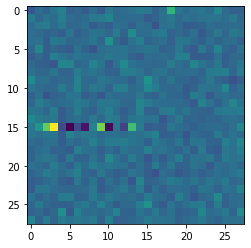

370


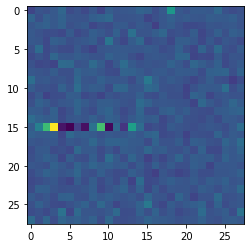

371


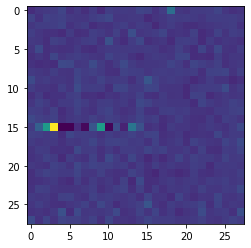

372


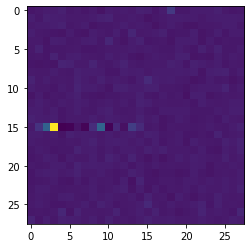

373


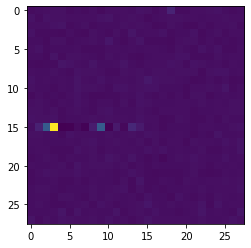

374


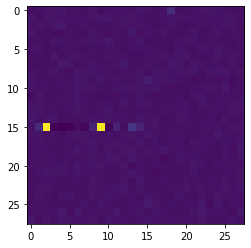

375


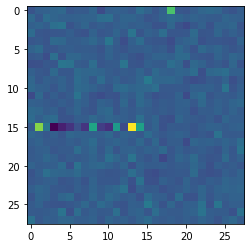

376


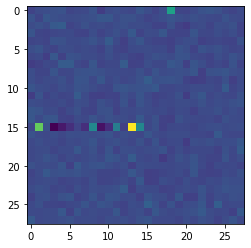

377


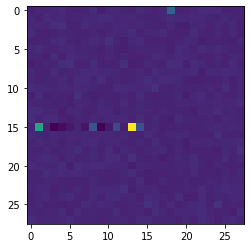

378


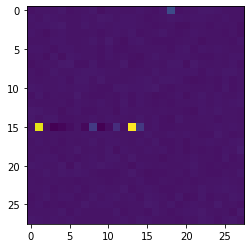

379


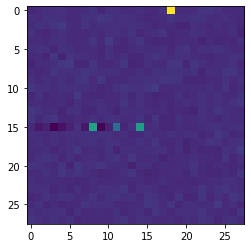

380


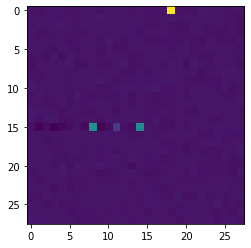

381


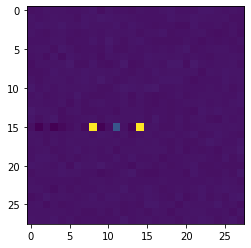

382


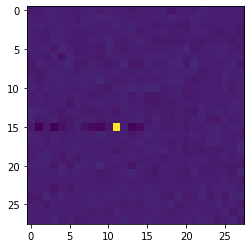

383


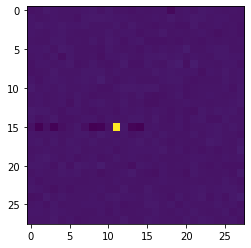

384


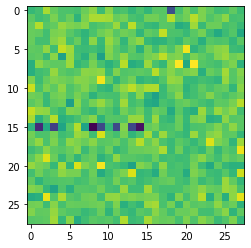

385


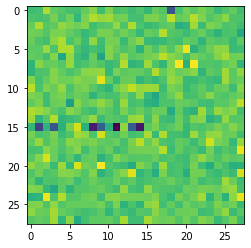

386


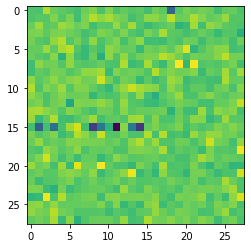

387


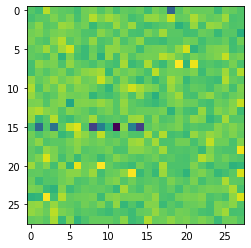

388


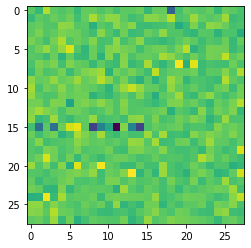

389


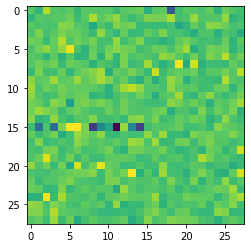

390


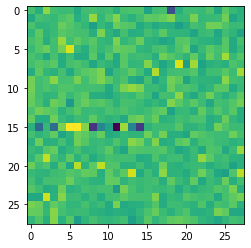

391


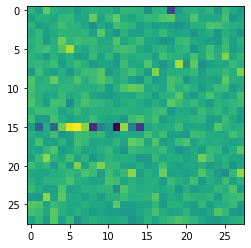

392


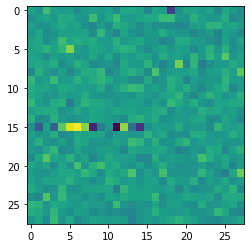

393


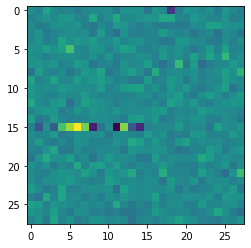

394


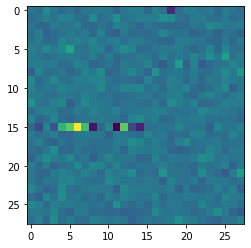

395


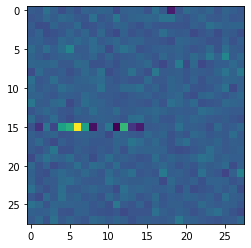

396


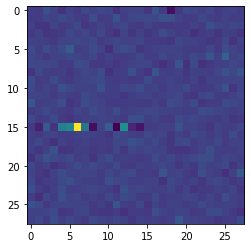

397


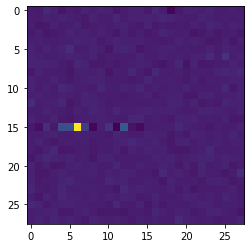

398


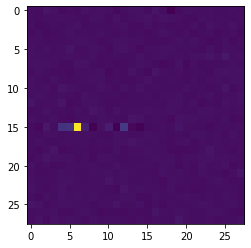

399


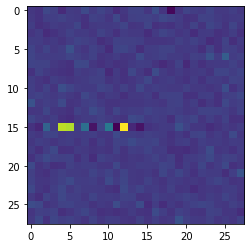

400


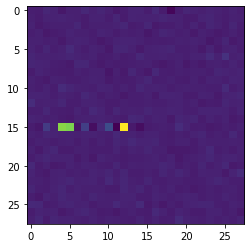

401


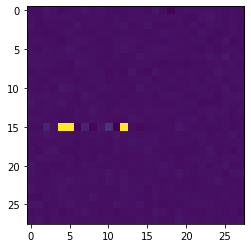

402


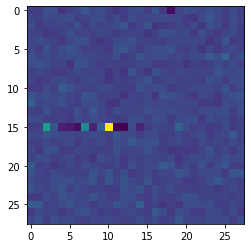

403


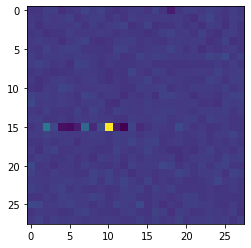

404


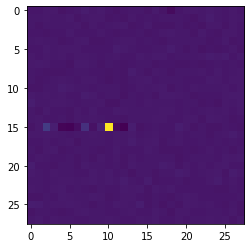

405


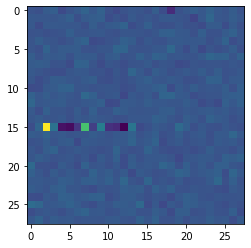

406


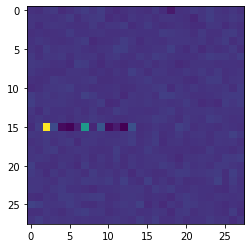

407


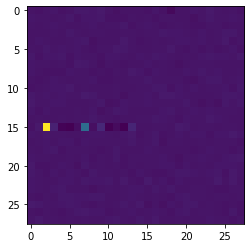

408


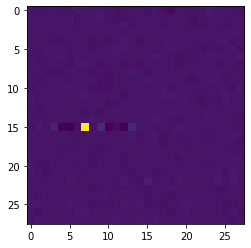

409


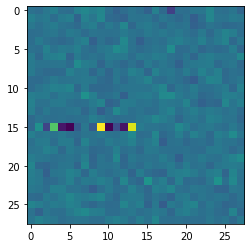

410


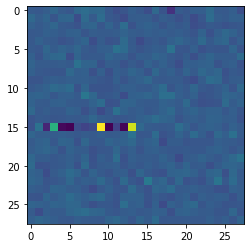

411


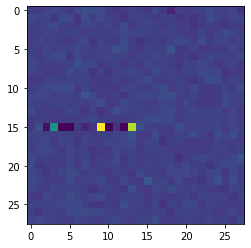

412


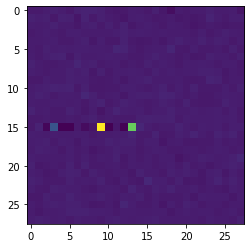

413


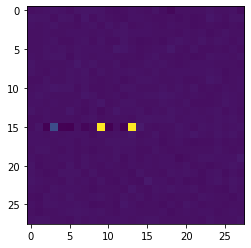

414


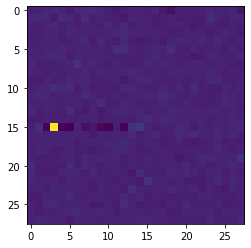

415


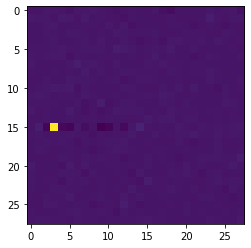

416


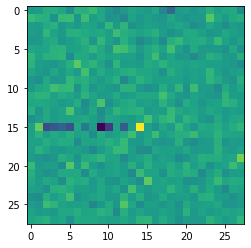

417


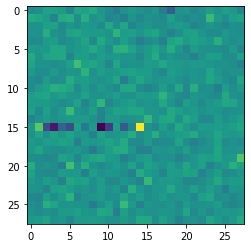

418


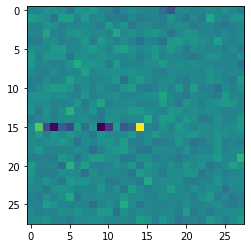

419


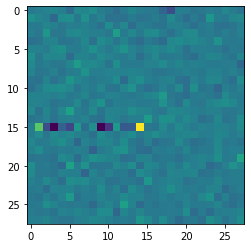

420


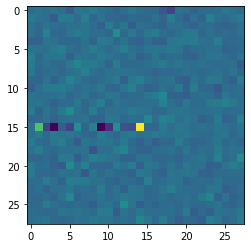

421


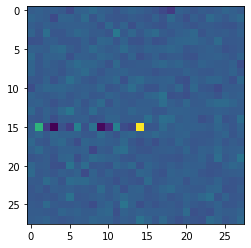

422


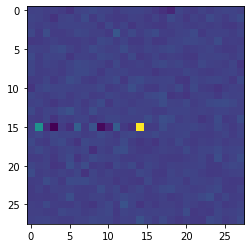

423


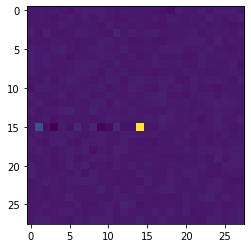

424


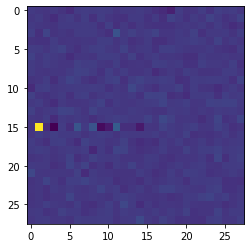

425


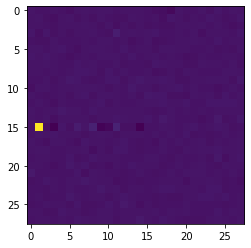

426


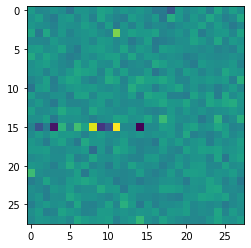

427


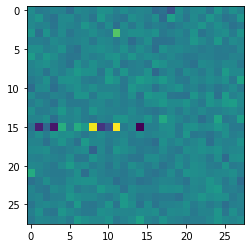

428


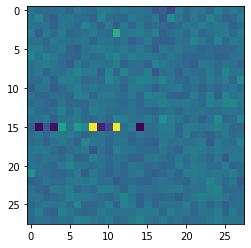

429


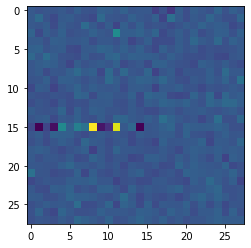

430


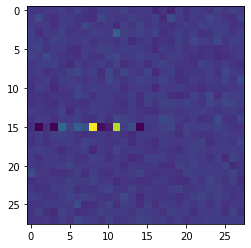

431


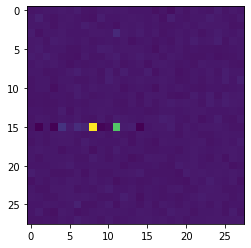

432


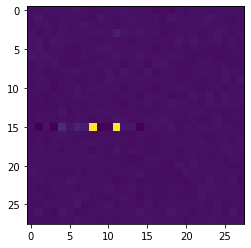

433


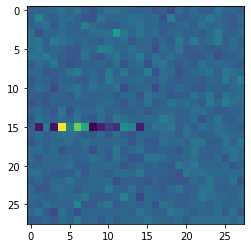

434


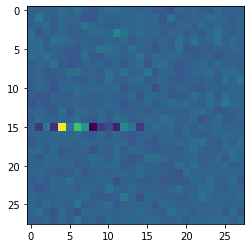

435


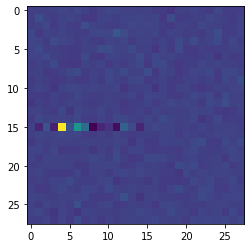

436


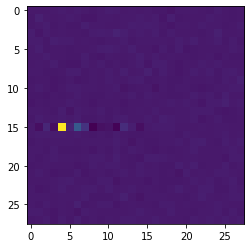

437


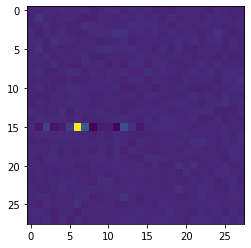

438


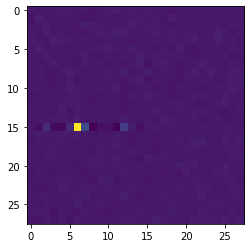

439


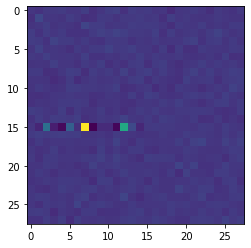

440


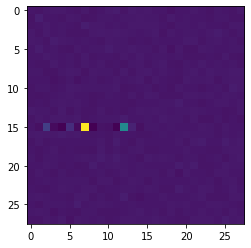

441


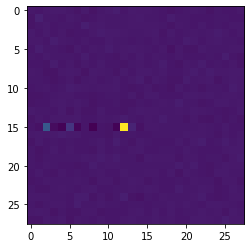

442


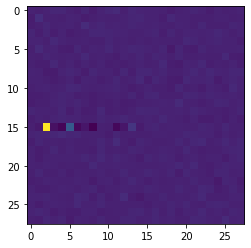

443


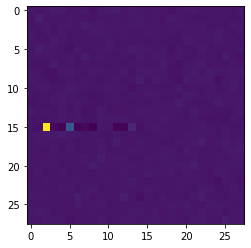

444


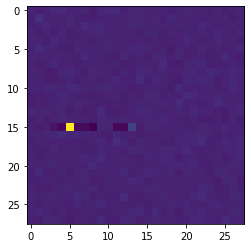

445


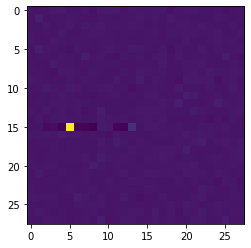

446


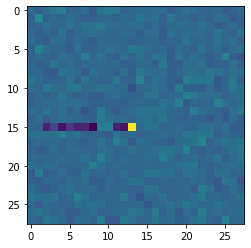

447


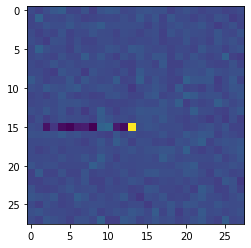

448


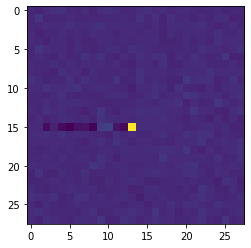

449


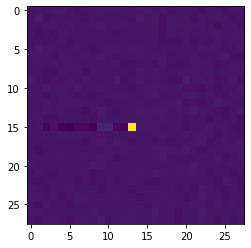

450


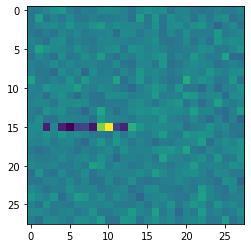

451


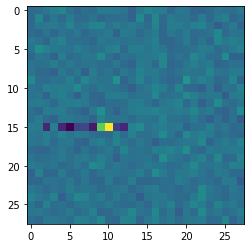

452


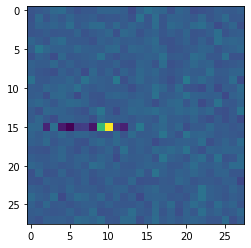

453


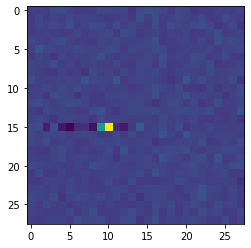

454


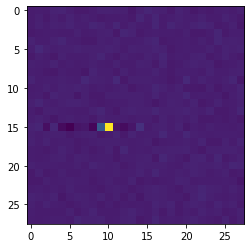

455


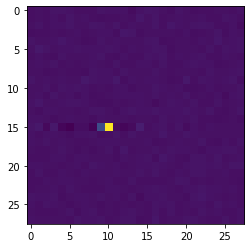

456


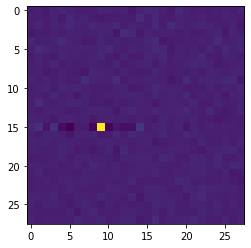

457


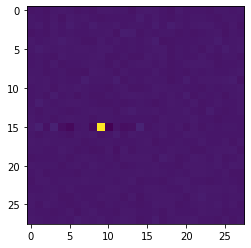

458


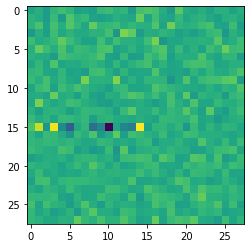

459


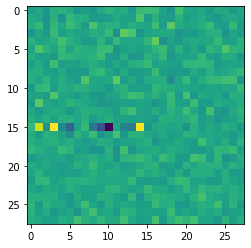

460


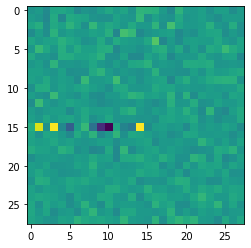

461


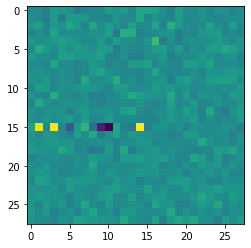

462


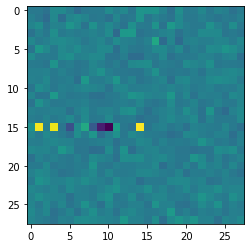

463


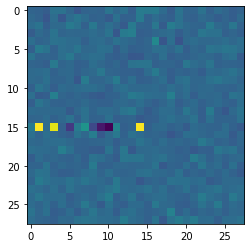

464


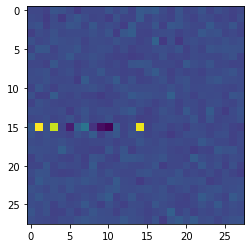

465


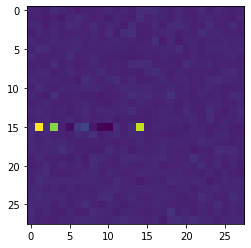

466


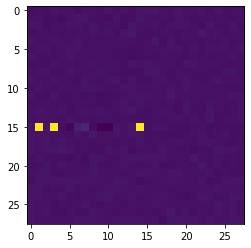

467


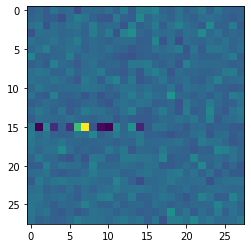

468


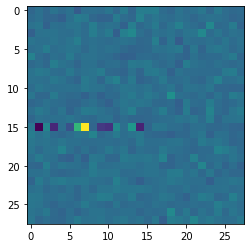

469


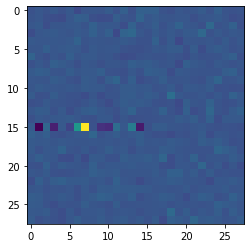

470


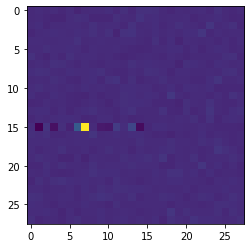

471


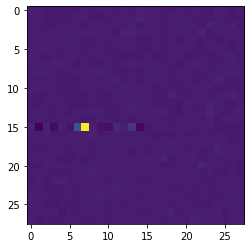

472


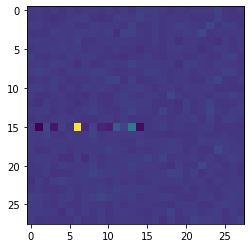

473


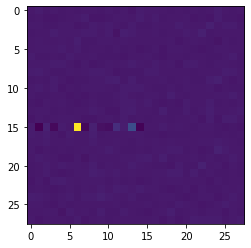

474


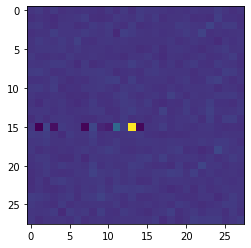

475


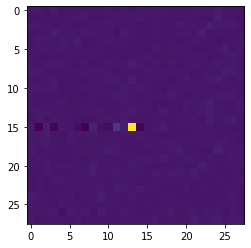

476


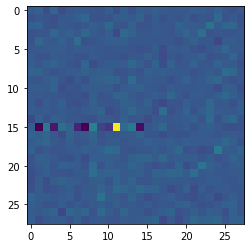

477


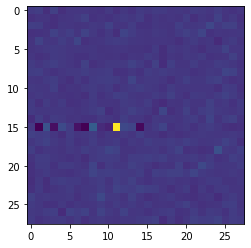

478


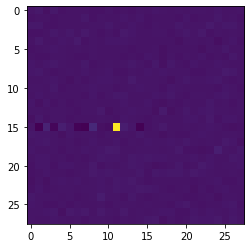

479


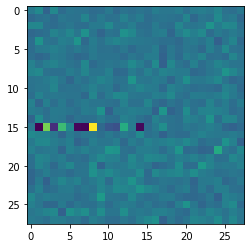

480


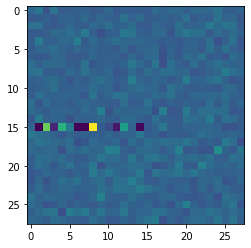

481


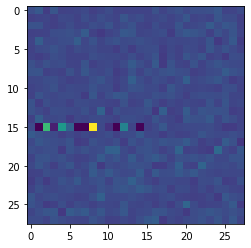

482


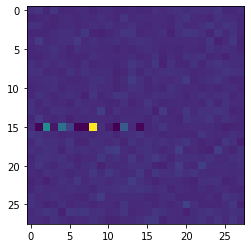

483


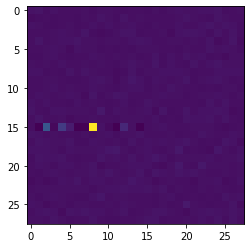

484


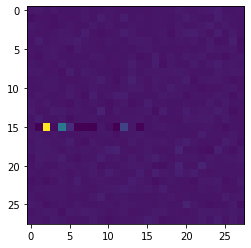

485


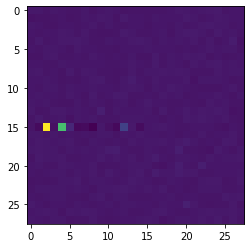

486


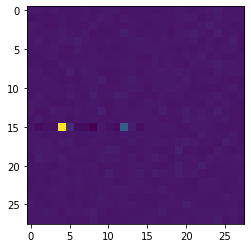

487


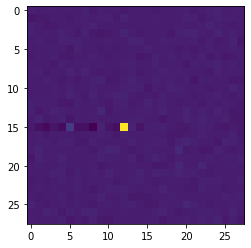

488


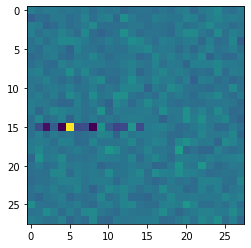

489


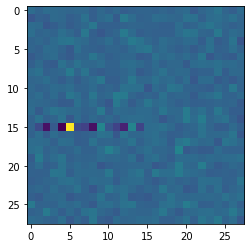

490


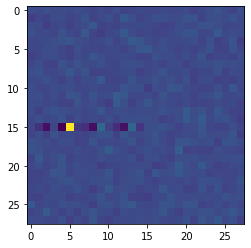

491


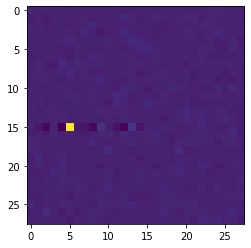

492


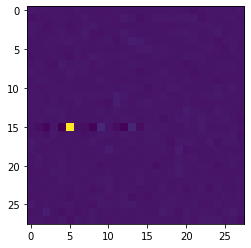

493


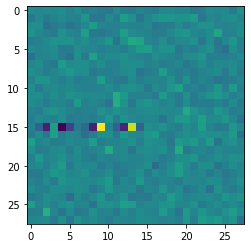

494


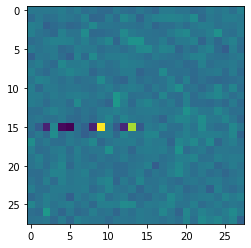

495


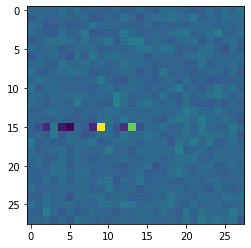

496


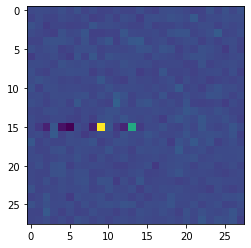

497


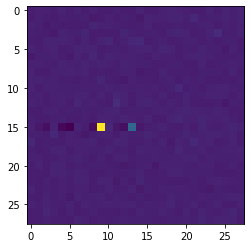

498


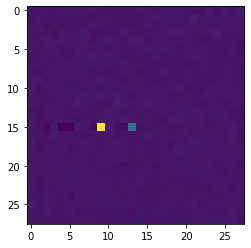

499


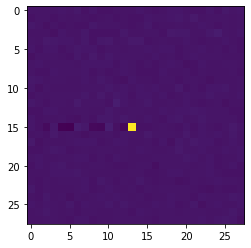

500


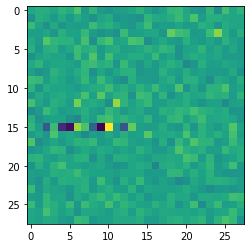

501


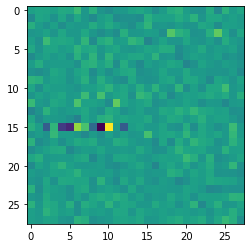

502


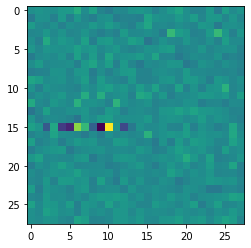

503


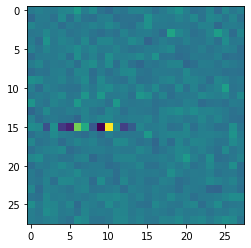

504


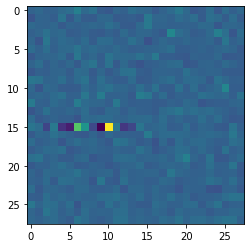

505


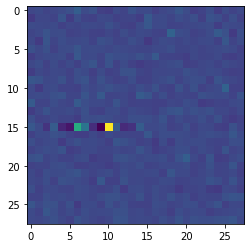

506


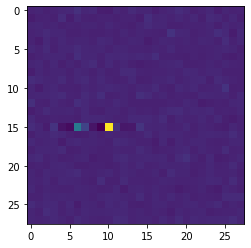

507


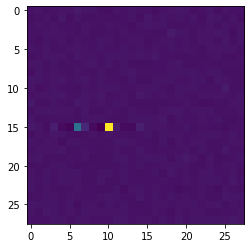

508


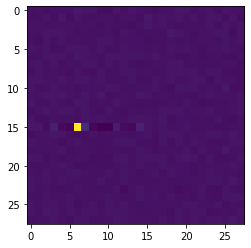

509


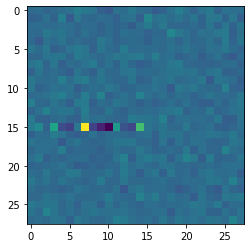

510


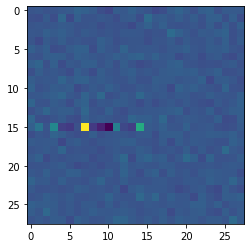

511


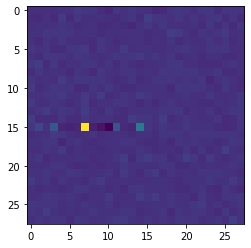

512


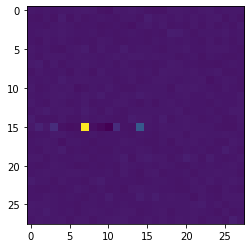

513


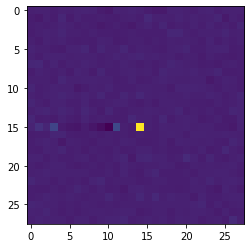

514


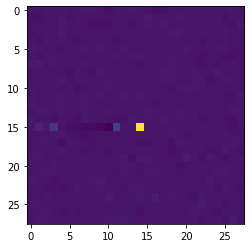

515


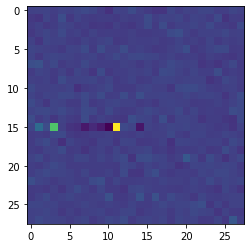

516


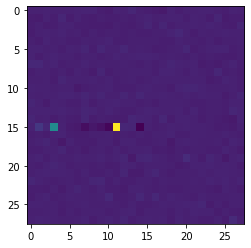

517


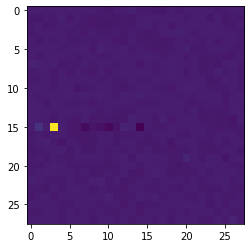

518


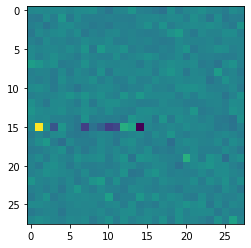

519


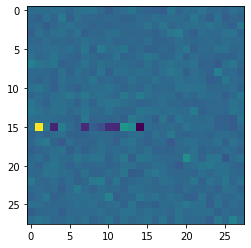

520


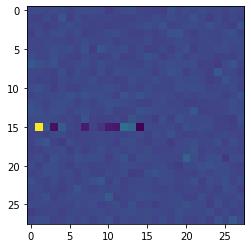

521


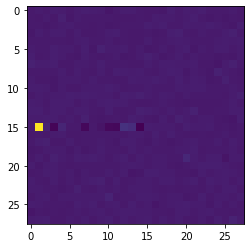

522


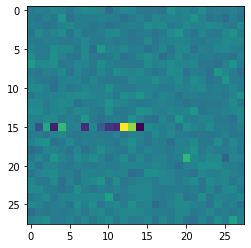

523


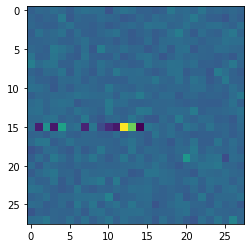

524


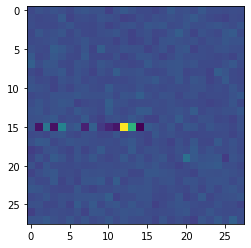

525


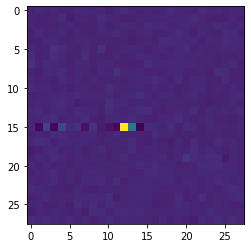

526


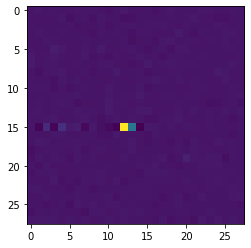

527


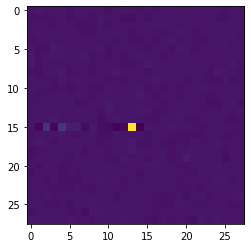

528


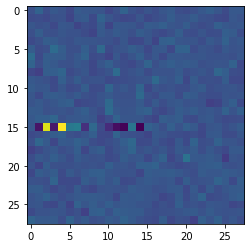

529


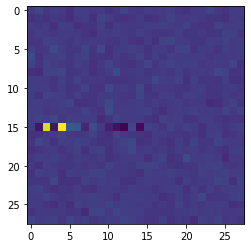

530


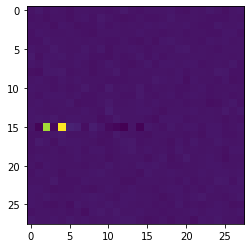

531


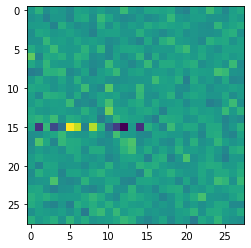

532


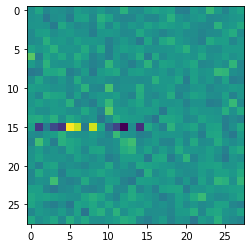

533


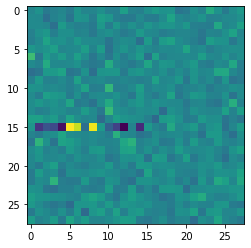

534


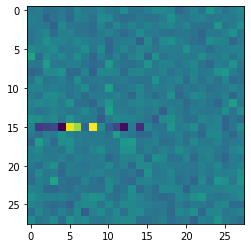

535


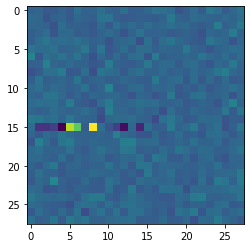

536


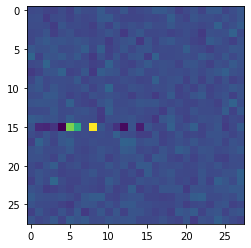

537


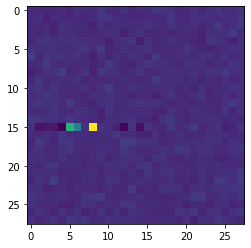

538


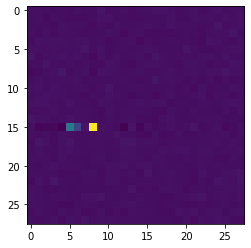

539


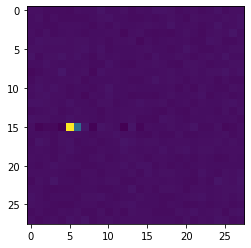

540


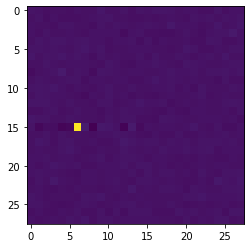

541


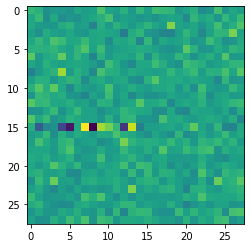

542


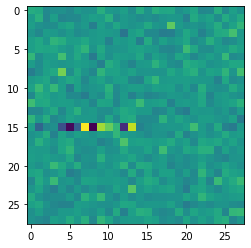

543


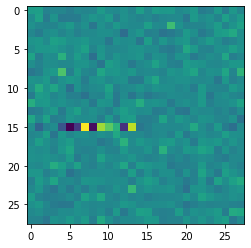

544


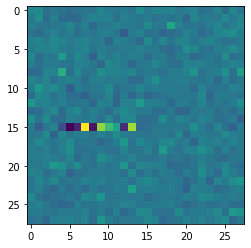

545


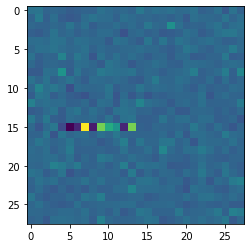

546


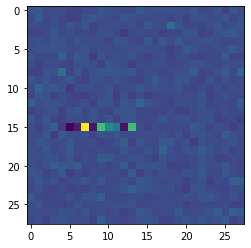

547


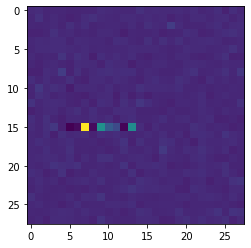

548


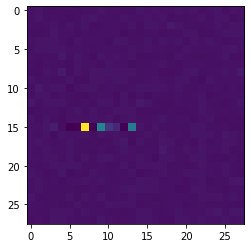

549


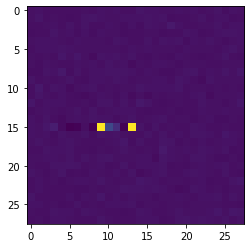

550


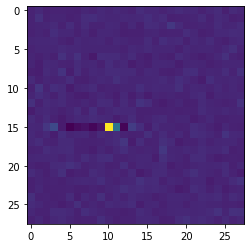

551


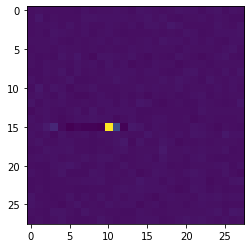

552


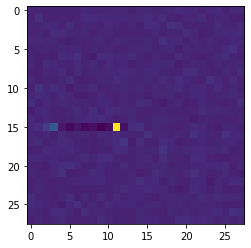

553


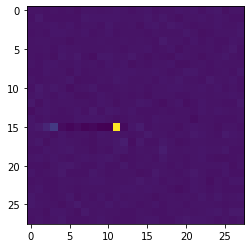

554


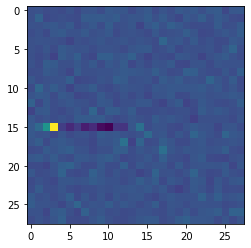

555


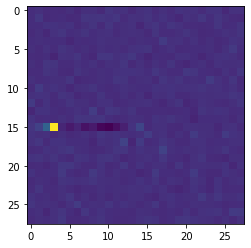

556


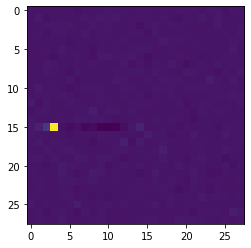

557


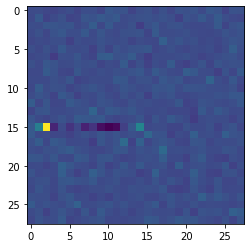

558


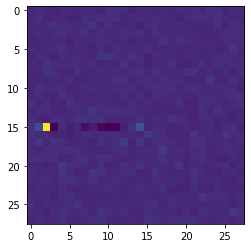

559


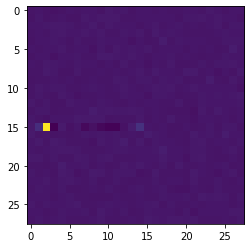

560


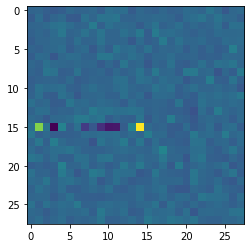

561


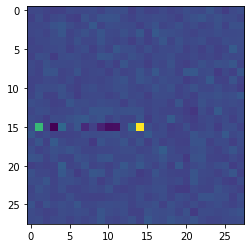

562


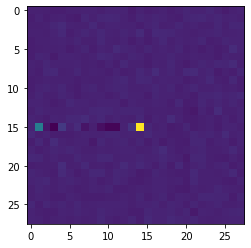

563


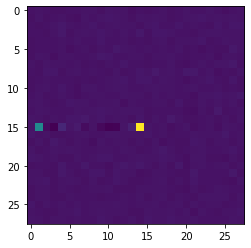

564


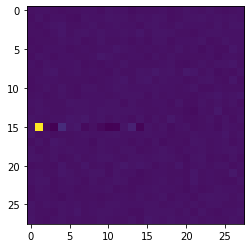

565


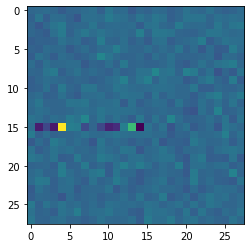

566


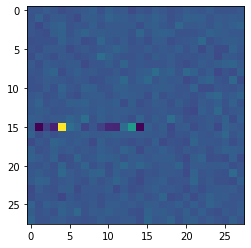

567


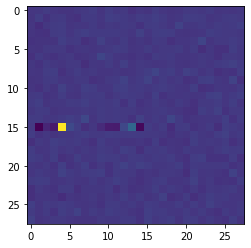

568


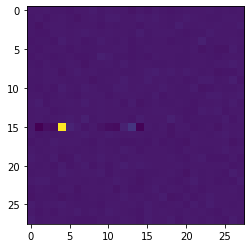

569


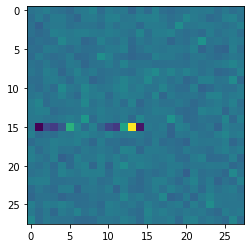

570


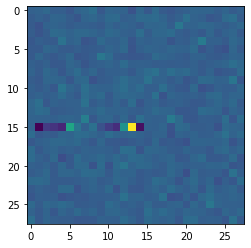

571


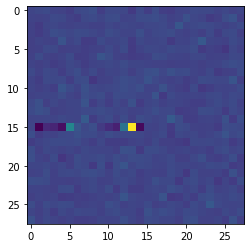

572


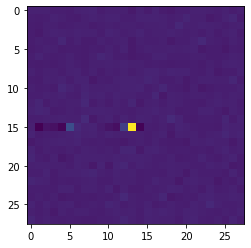

573


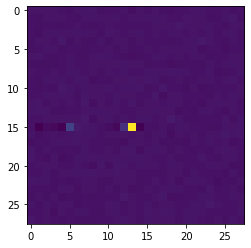

574


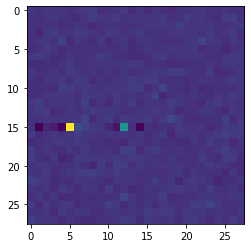

575


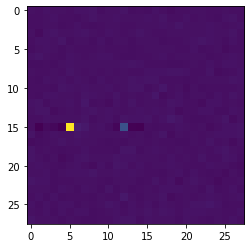

576


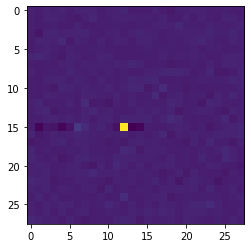

577


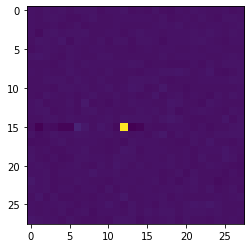

578


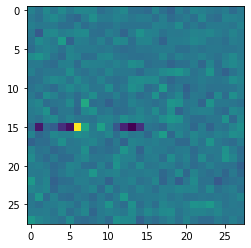

579


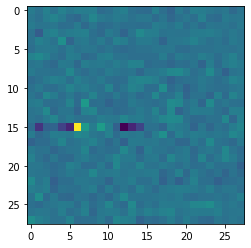

580


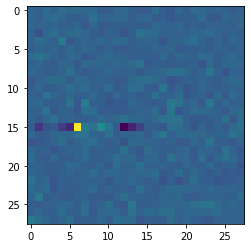

581


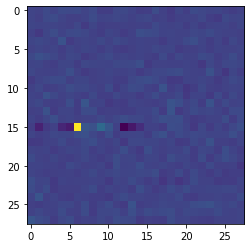

582


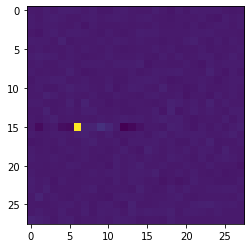

583


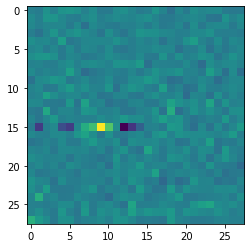

584


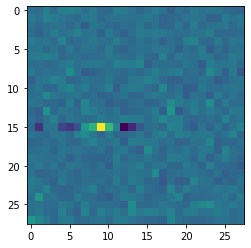

585


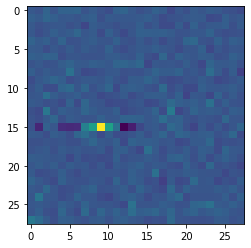

586


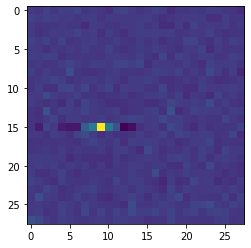

587


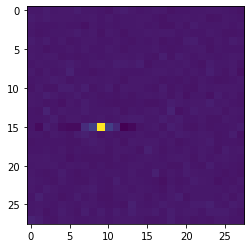

588


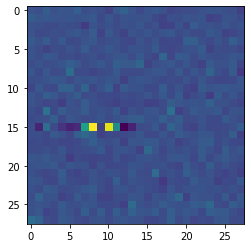

589


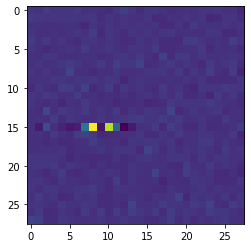

590


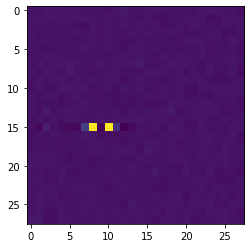

591


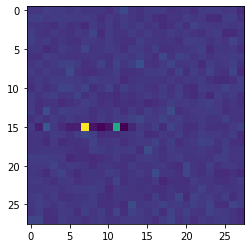

592


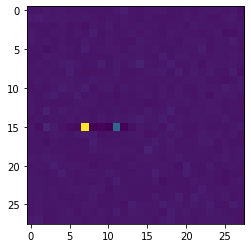

593


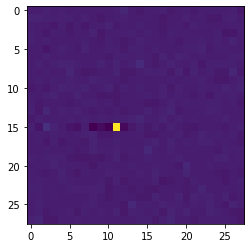

594


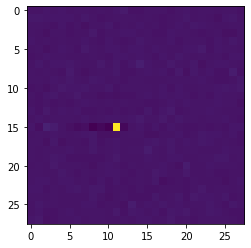

595


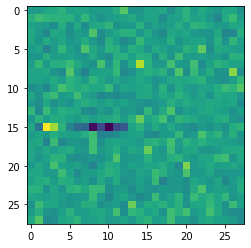

596


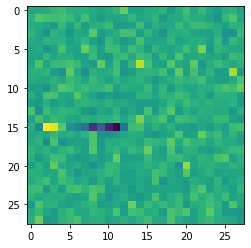

597


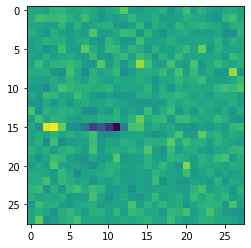

598


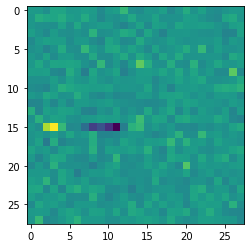

599


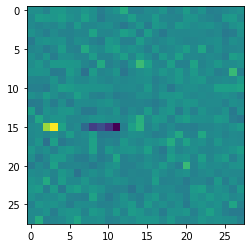

600


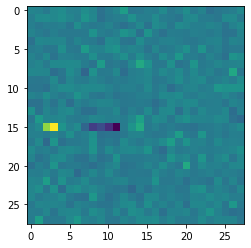

601


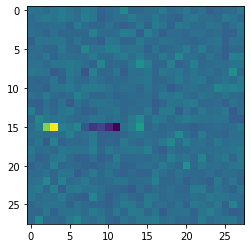

602


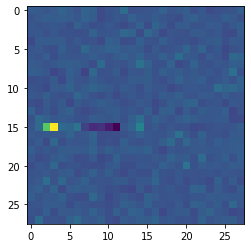

603


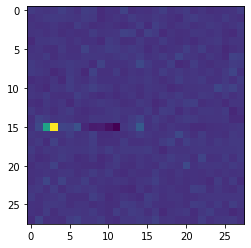

604


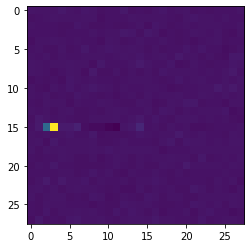

605


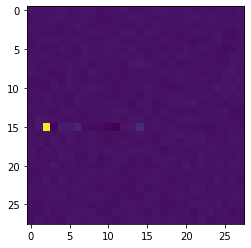

606


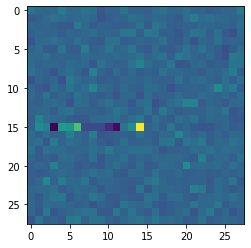

607


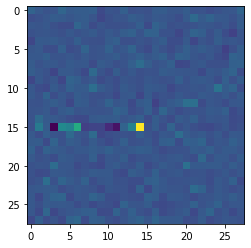

608


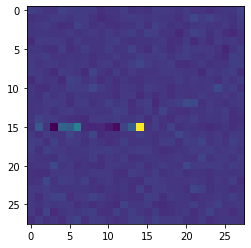

609


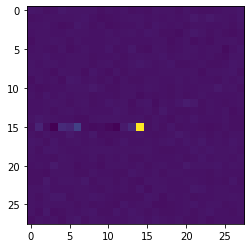

610


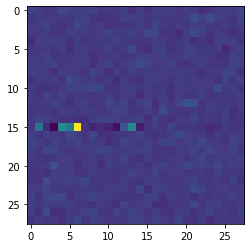

611


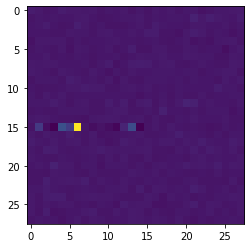

612


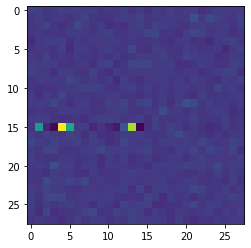

613


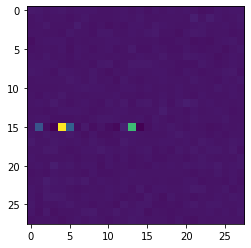

614


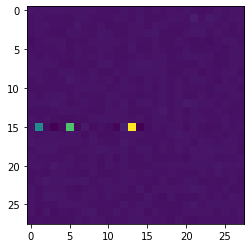

615


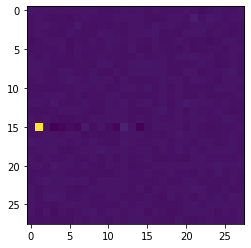

616


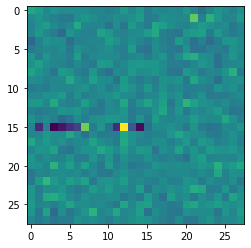

617


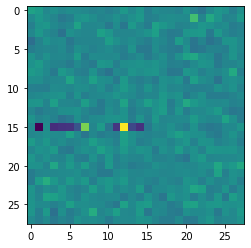

618


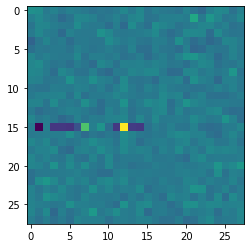

619


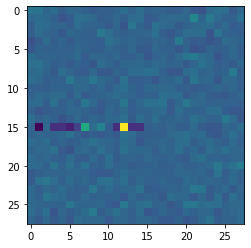

620


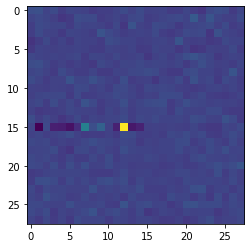

621


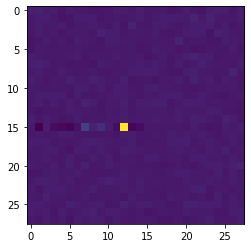

622


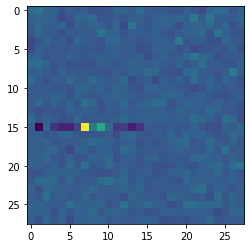

623


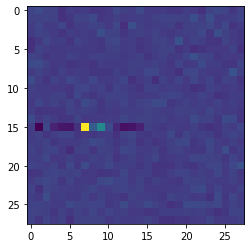

624


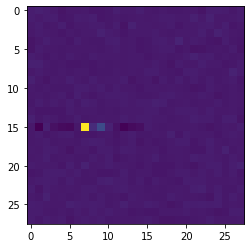

625


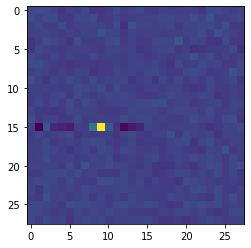

626


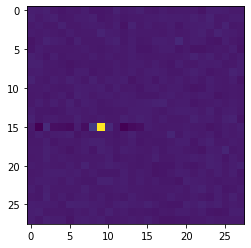

627


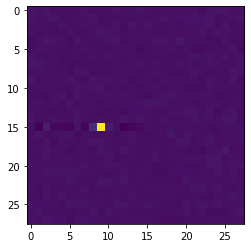

628


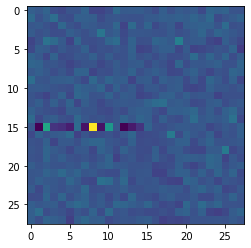

629


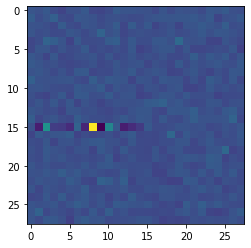

630


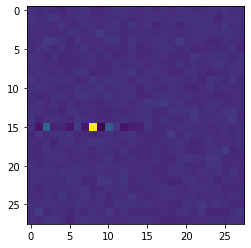

631


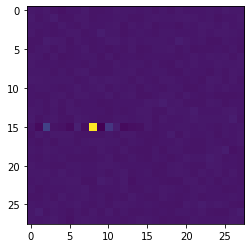

632


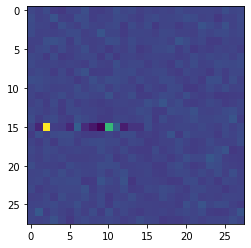

633


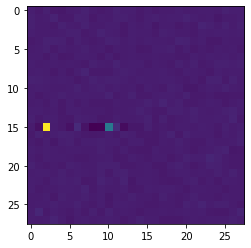

634


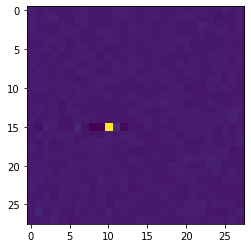

635


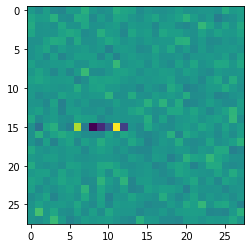

636


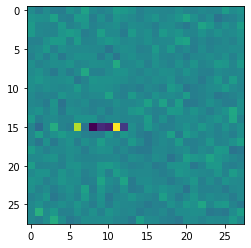

637


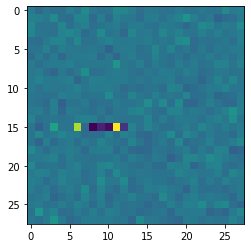

638


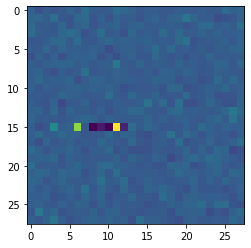

639


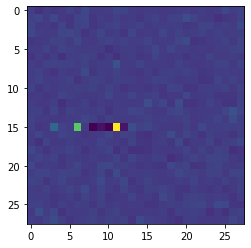

640


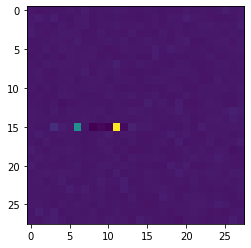

641


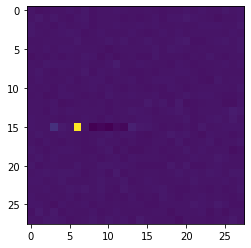

642


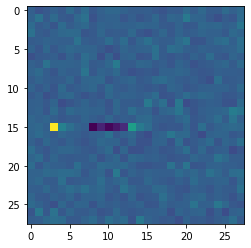

643


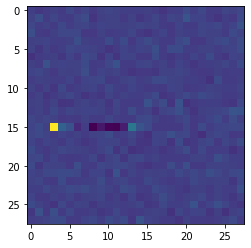

644


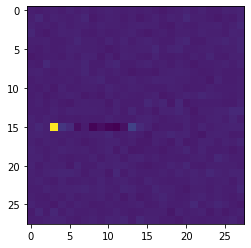

645


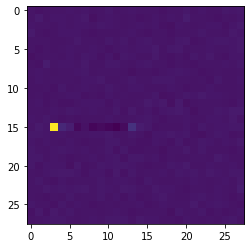

646


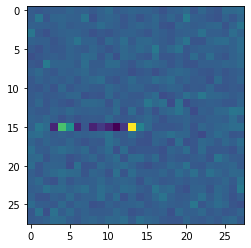

647


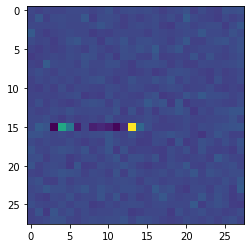

648


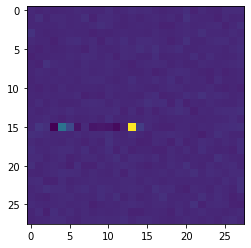

649


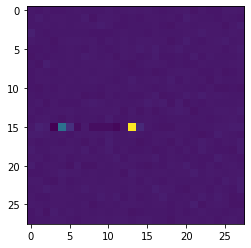

650


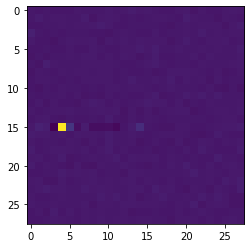

651


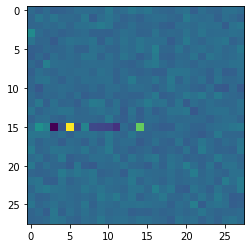

652


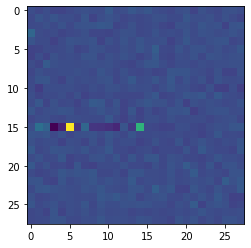

653


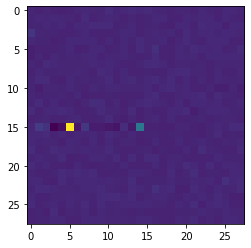

654


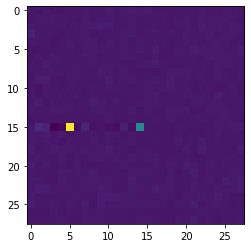

655


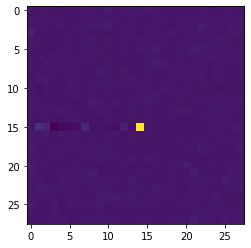

656


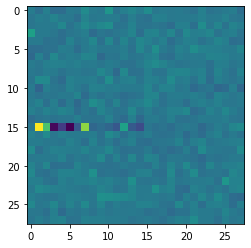

657


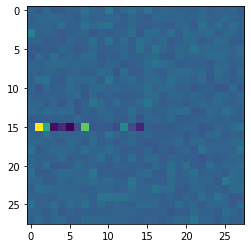

658


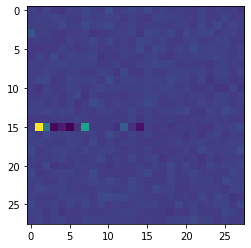

659


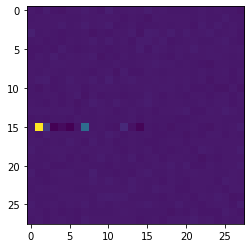

660


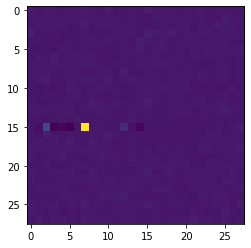

661


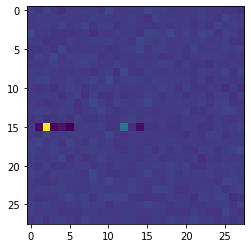

662


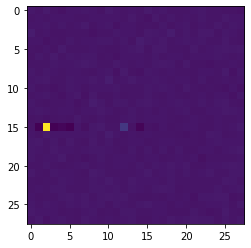

663


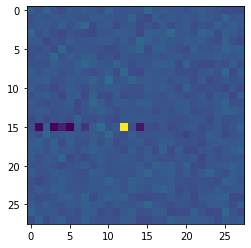

664


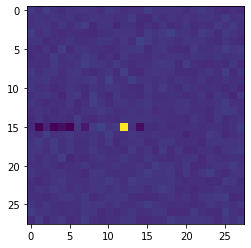

665


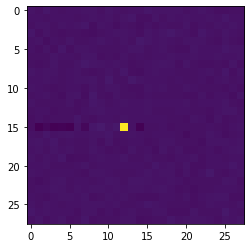

666


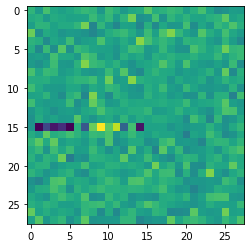

667


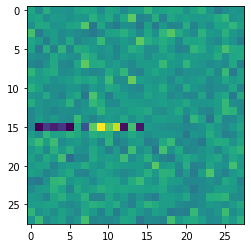

668


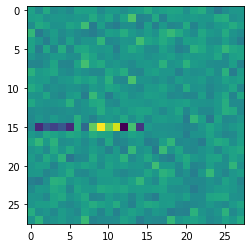

669


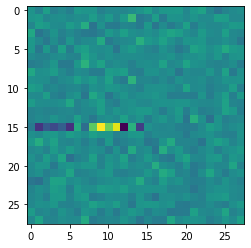

670


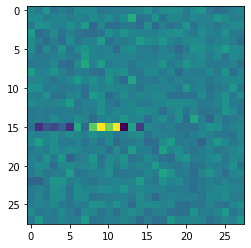

671


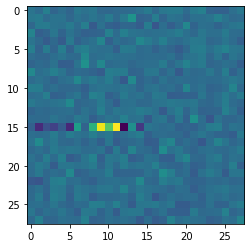

672


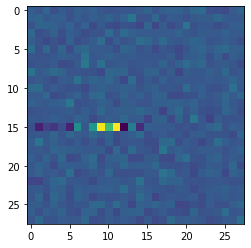

673


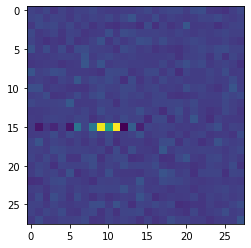

674


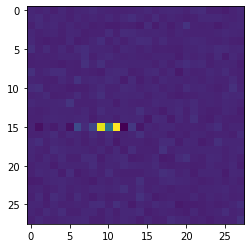

675


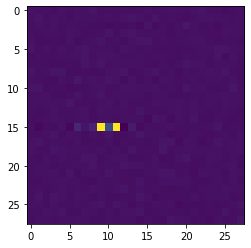

676


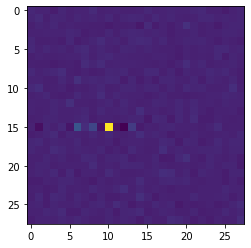

677


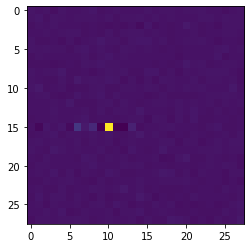

678


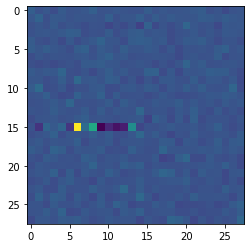

679


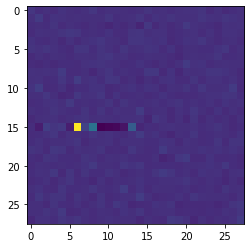

680


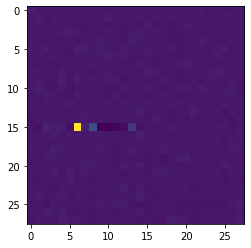

681


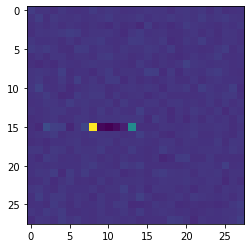

682


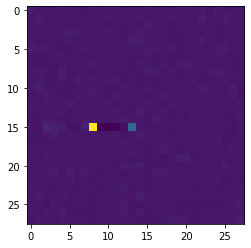

683


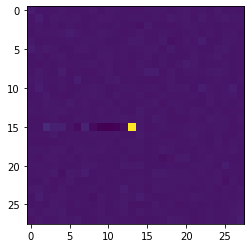

684


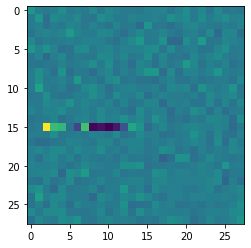

685


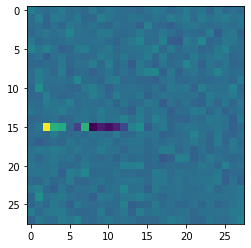

686


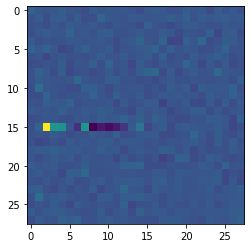

687


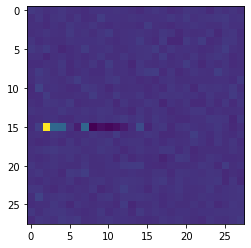

688


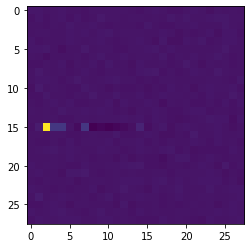

689


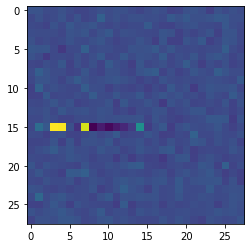

690


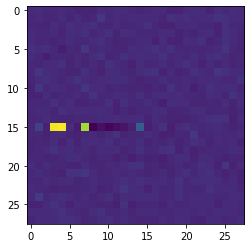

691


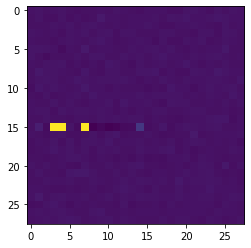

692


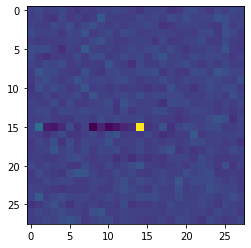

693


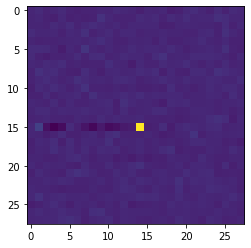

694


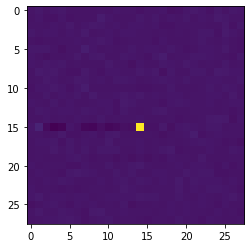

695


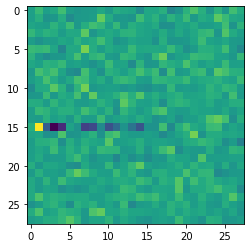

696


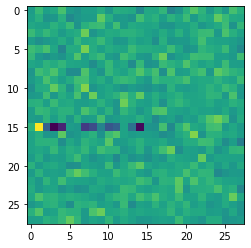

697


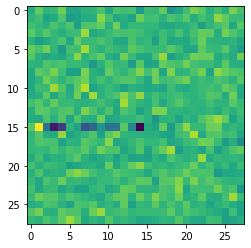

698


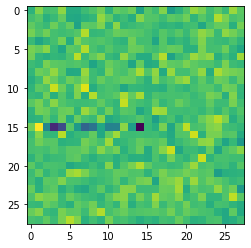

699


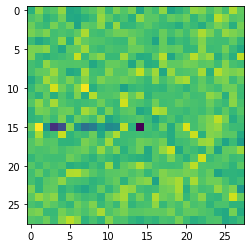

700


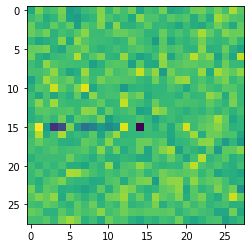

701


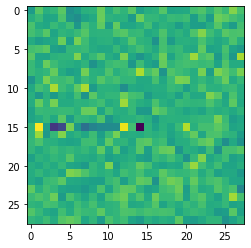

702


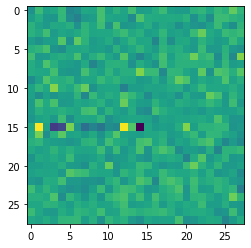

703


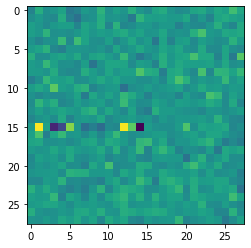

704


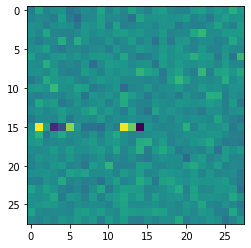

705


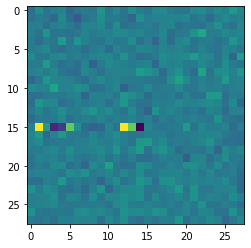

706


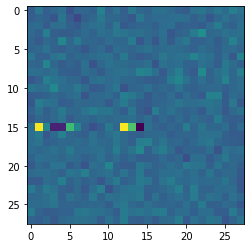

707


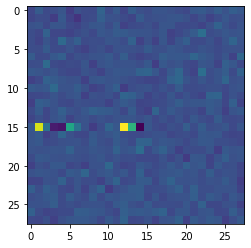

708


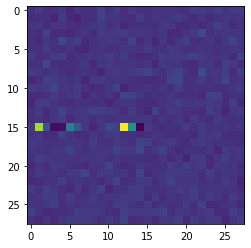

709


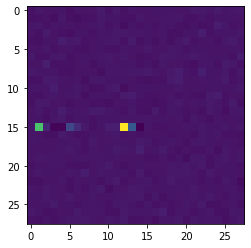

710


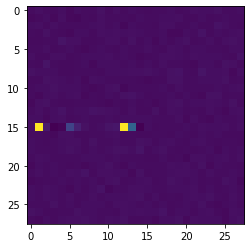

711


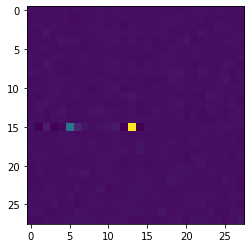

712


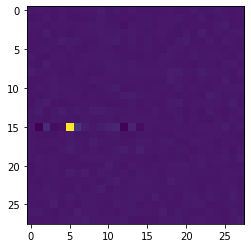

713


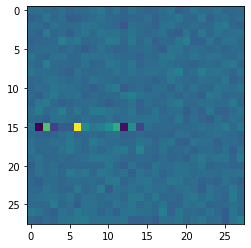

714


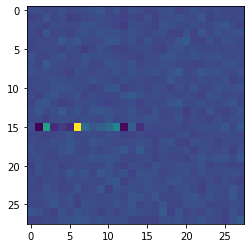

715


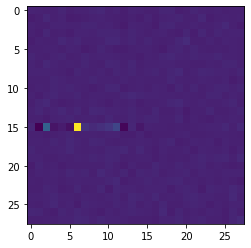

716


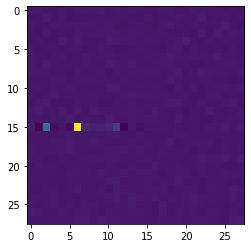

717


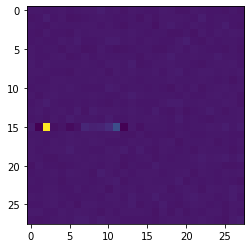

718


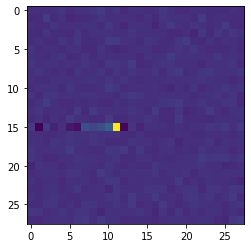

719


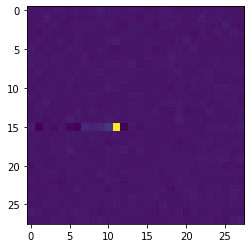

720


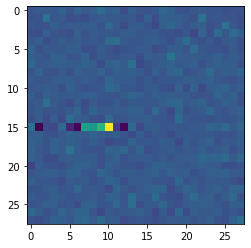

721


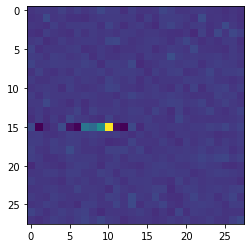

722


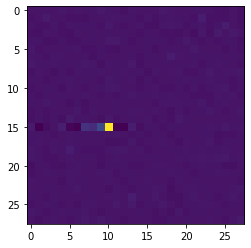

723


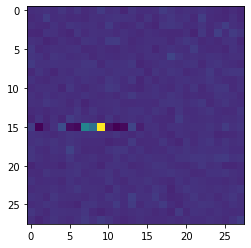

724


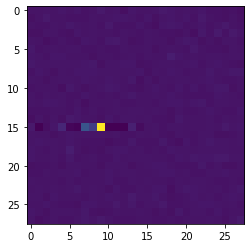

725


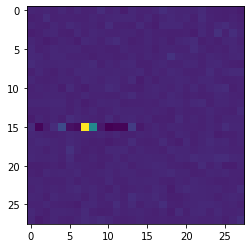

726


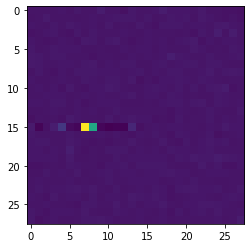

727


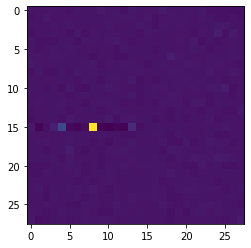

728


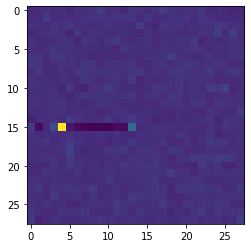

729


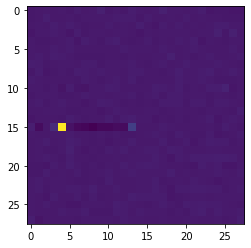

730


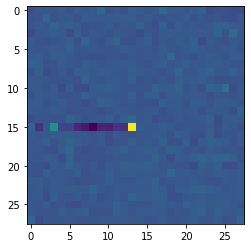

731


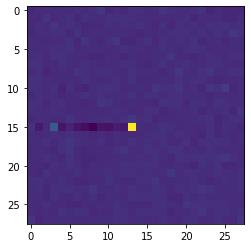

732


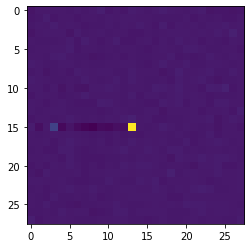

733


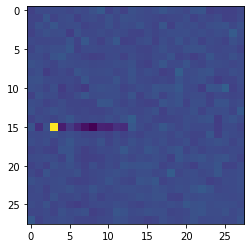

734


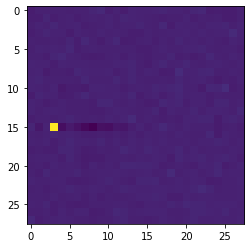

735


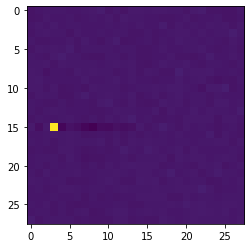

736


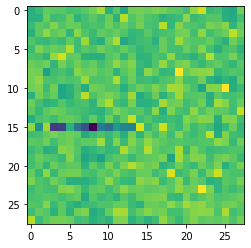

737


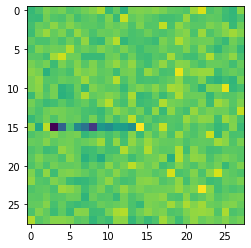

738


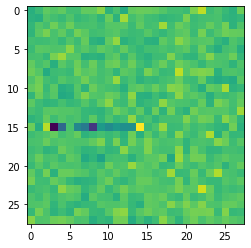

739


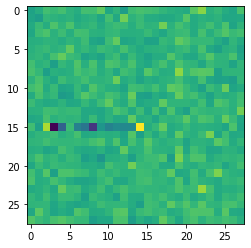

740


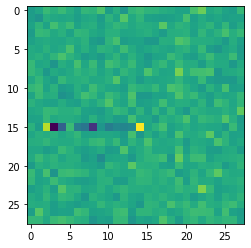

741


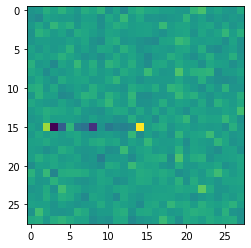

742


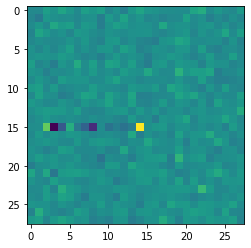

743


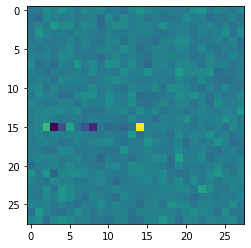

744


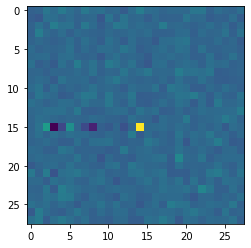

745


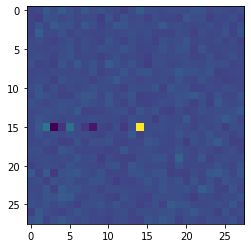

746


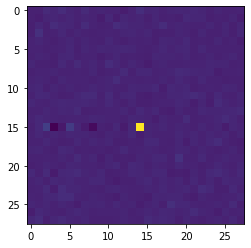

747


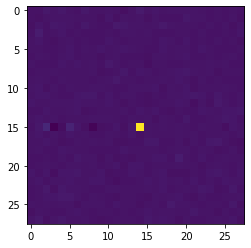

748


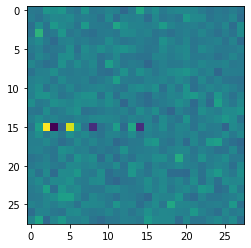

749


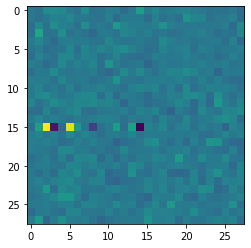

750


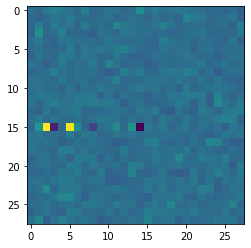

751


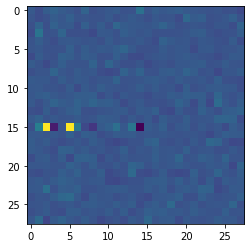

752


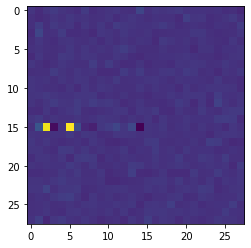

753


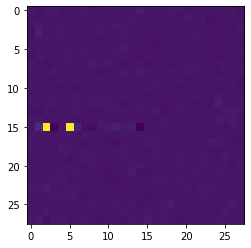

754


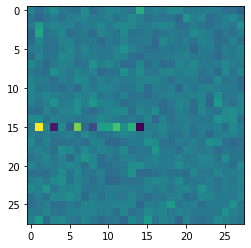

755


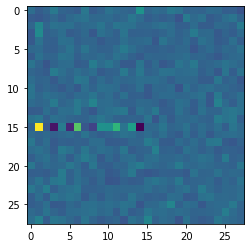

756


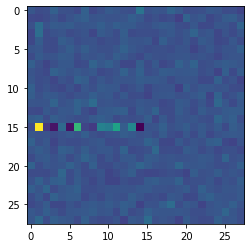

757


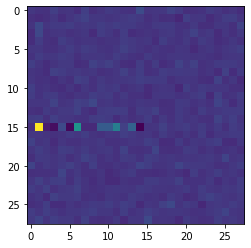

758


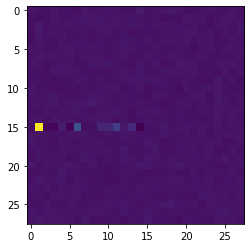

759


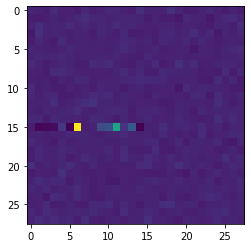

760


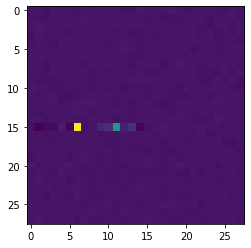

761


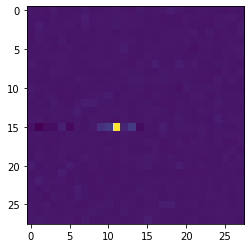

762


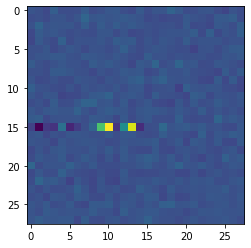

763


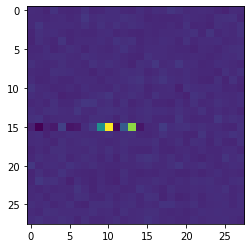

764


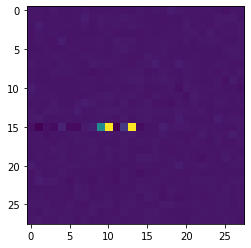

765


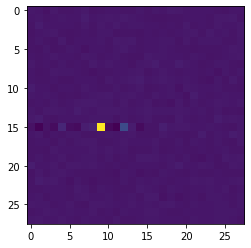

766


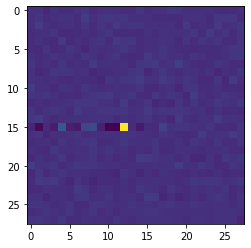

767


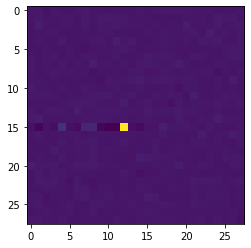

768


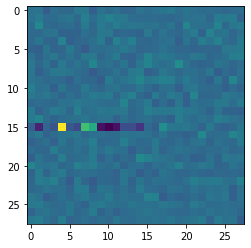

769


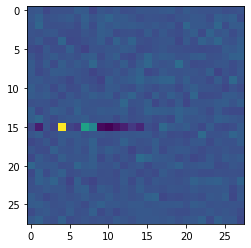

770


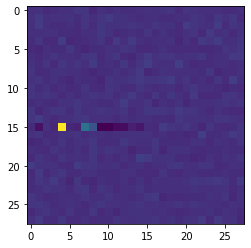

771


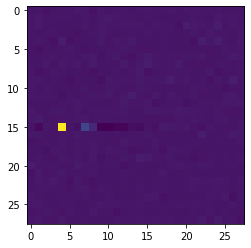

772


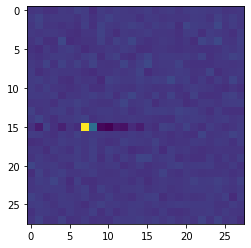

773


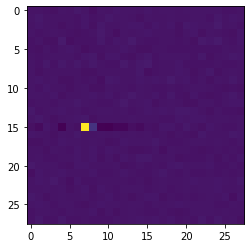

774


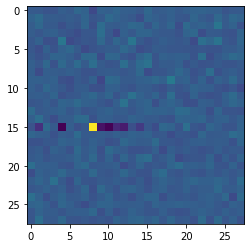

775


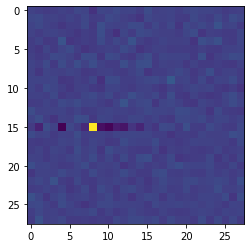

776


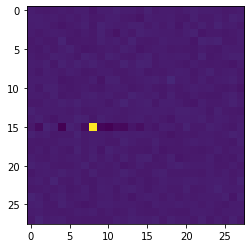

777


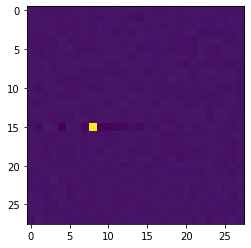

778


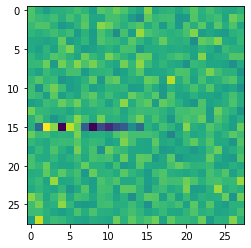

779


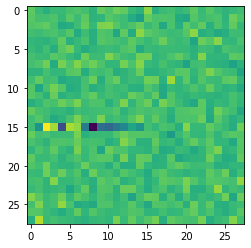

780


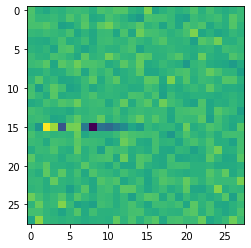

781


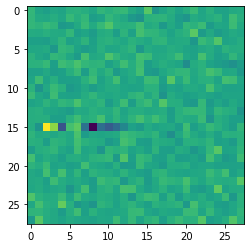

782


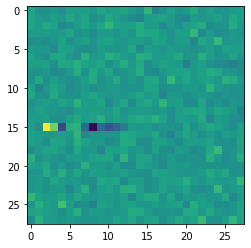

783


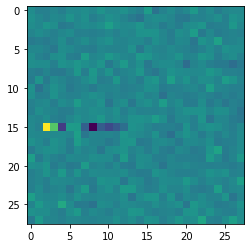

784


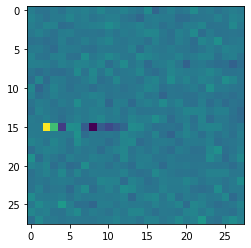

785


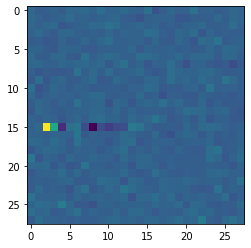

786


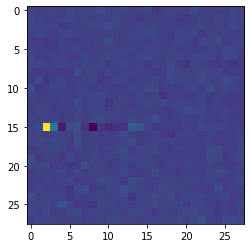

787


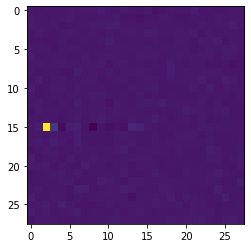

788


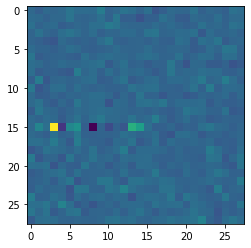

789


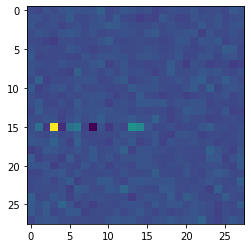

790


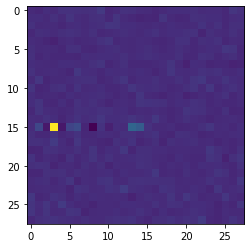

791


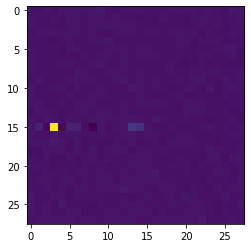

792


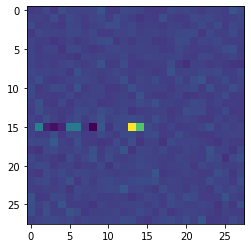

793


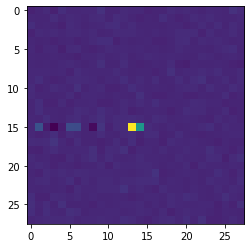

794


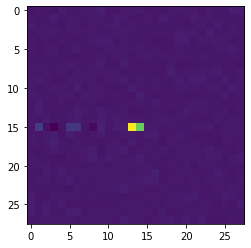

795


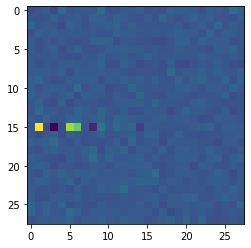

796


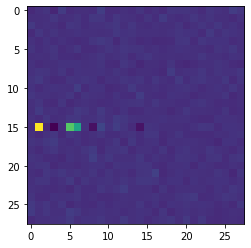

797


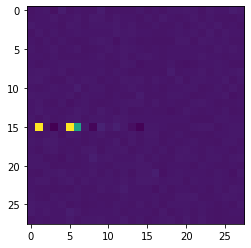

798


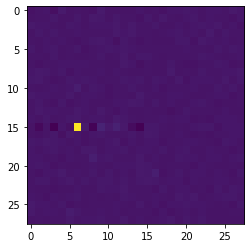

799


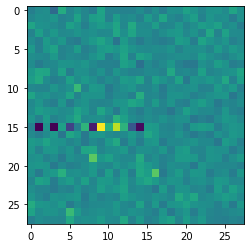

800


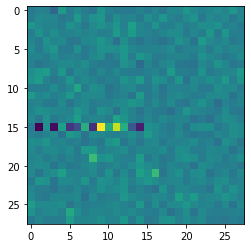

801


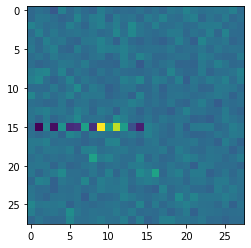

802


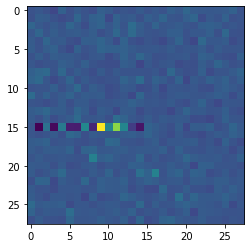

803


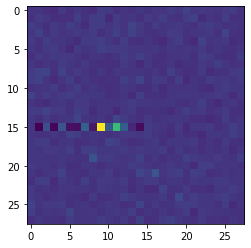

804


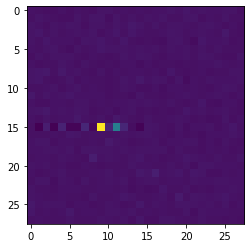

805


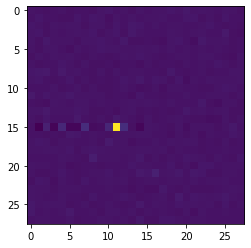

806


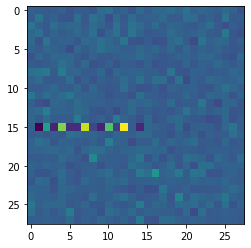

807


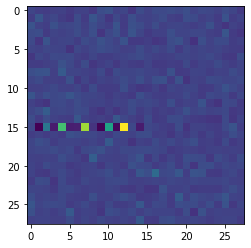

808


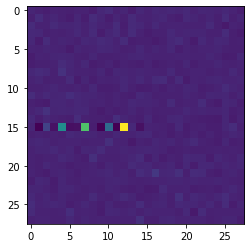

809


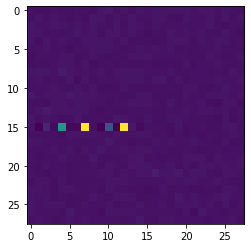

810


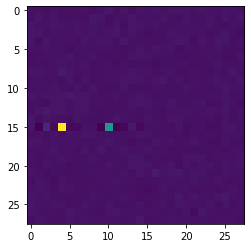

811


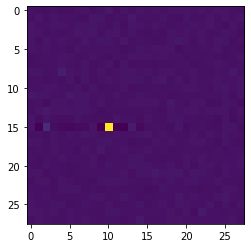

812


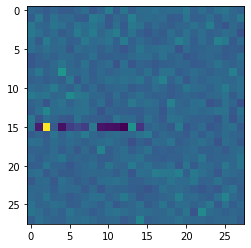

813


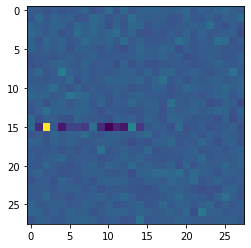

814


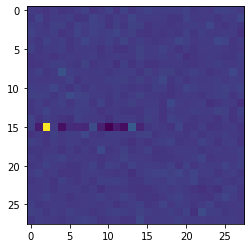

815


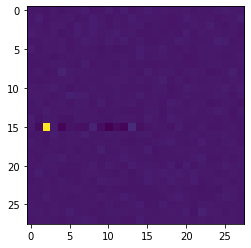

816


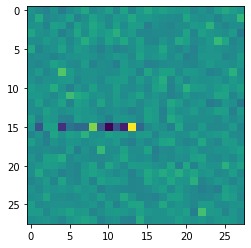

817


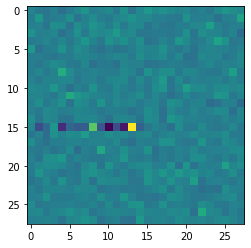

818


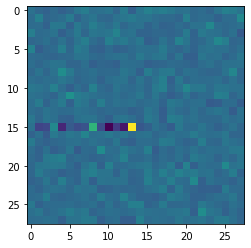

819


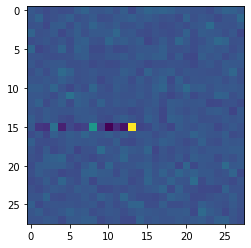

820


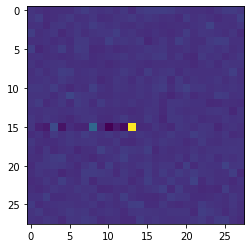

821


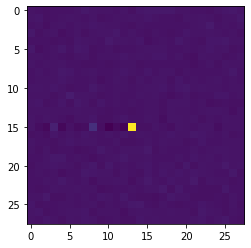

822


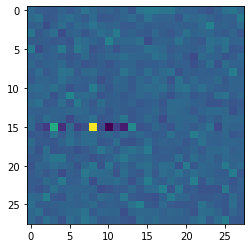

823


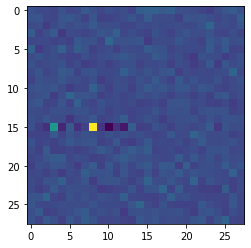

824


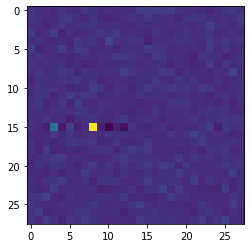

825


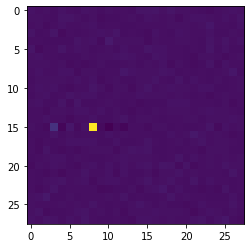

826


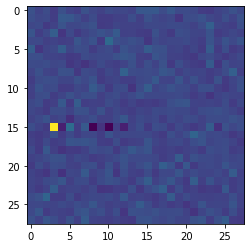

827


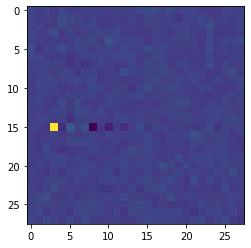

828


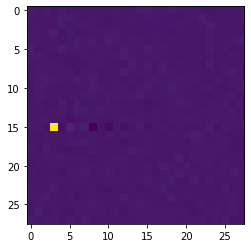

829


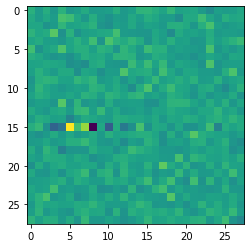

830


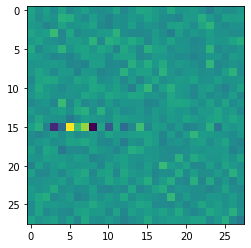

831


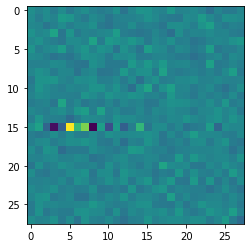

832


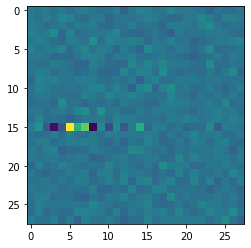

833


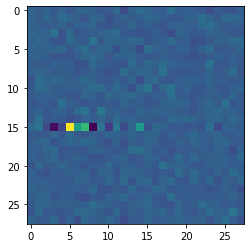

834


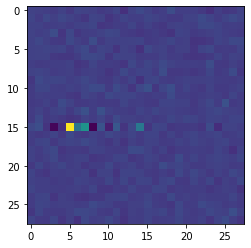

835


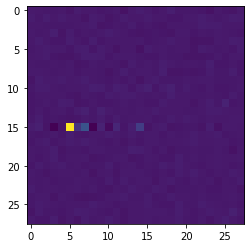

836


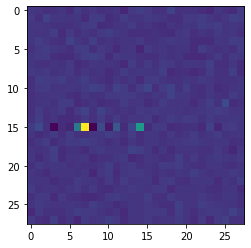

837


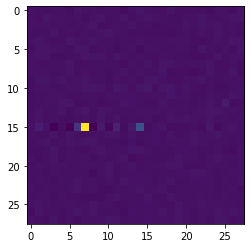

838


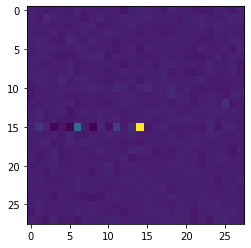

839


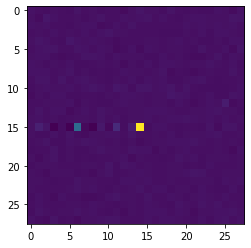

840


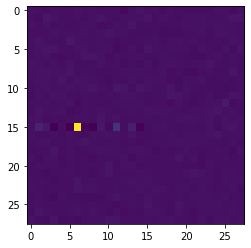

841


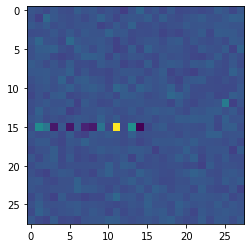

842


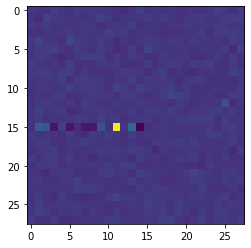

843


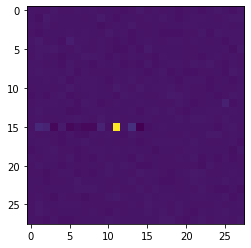

844


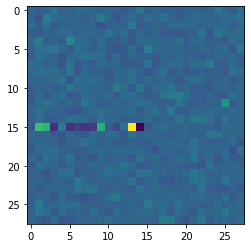

845


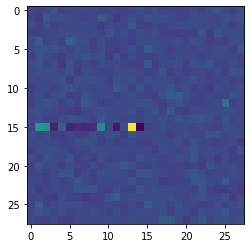

846


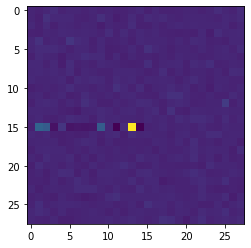

847


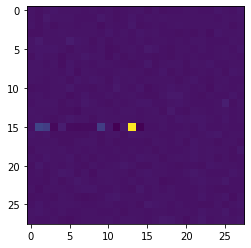

848


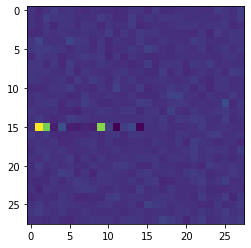

849


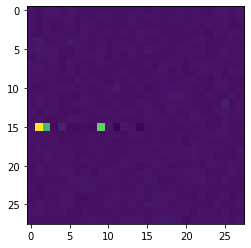

850


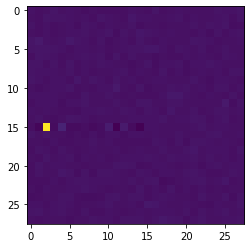

851


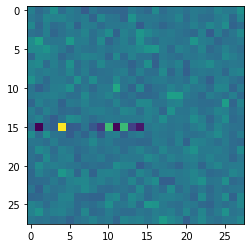

852


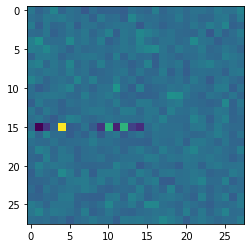

853


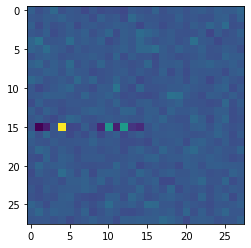

854


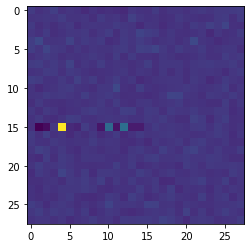

855


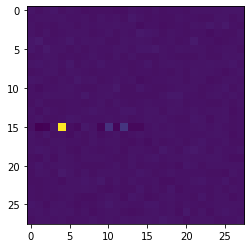

856


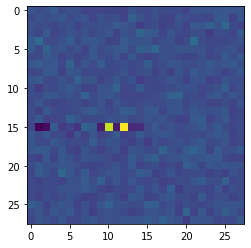

857


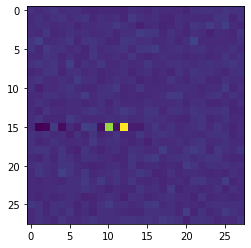

858


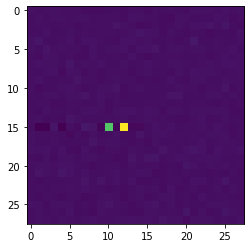

859


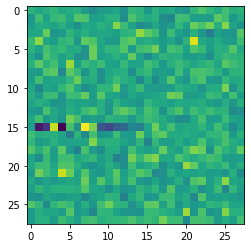

860


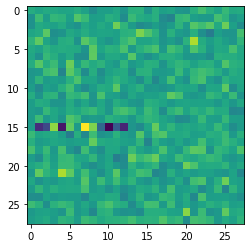

861


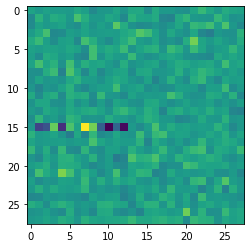

862


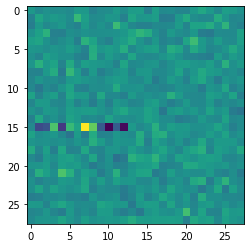

863


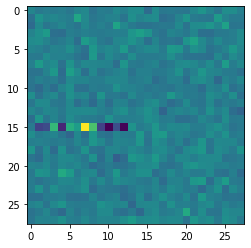

864


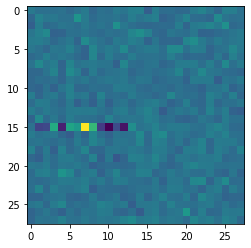

865


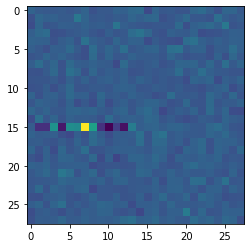

866


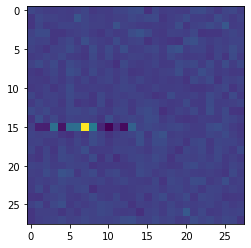

867


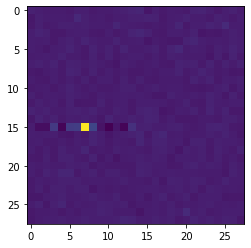

868


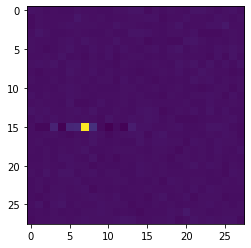

869


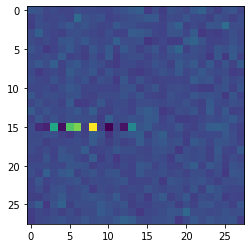

870


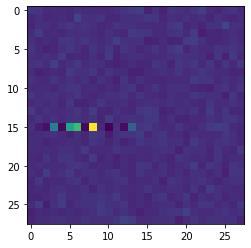

871


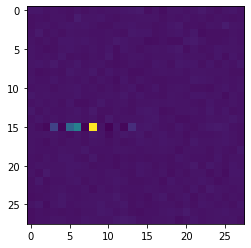

872


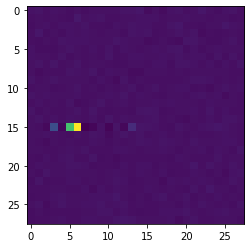

873


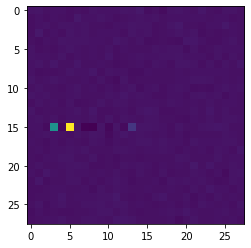

874


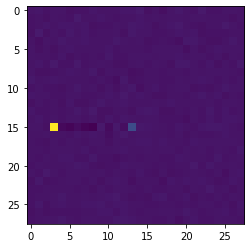

875


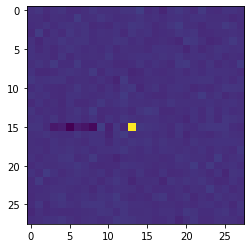

876


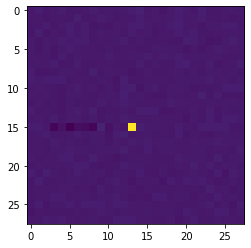

877


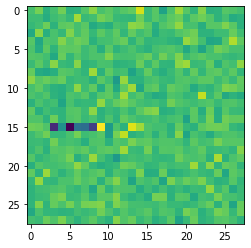

878


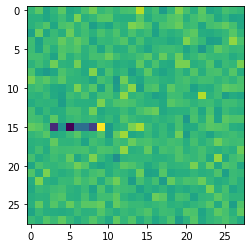

879


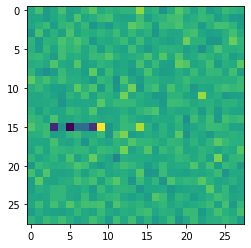

880


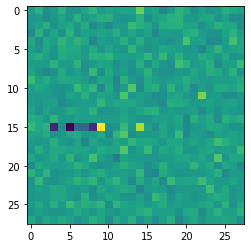

881


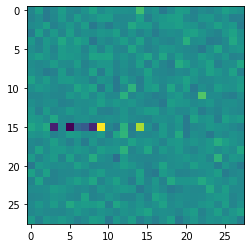

882


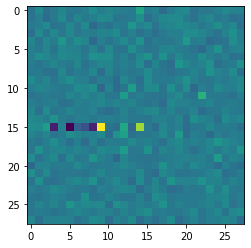

883


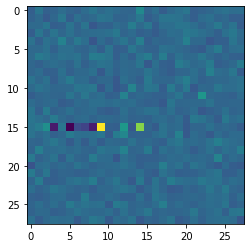

884


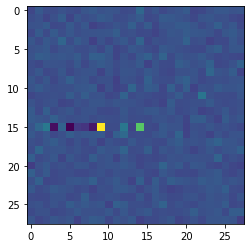

885


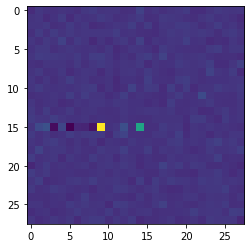

886


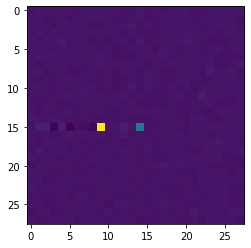

887


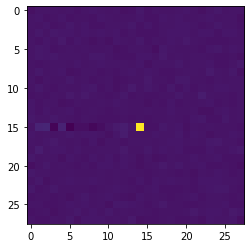

888


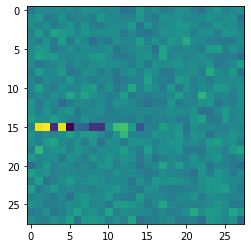

889


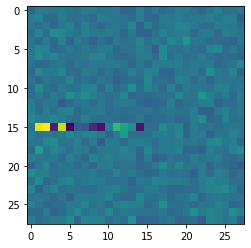

890


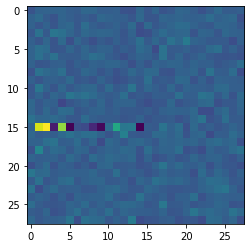

891


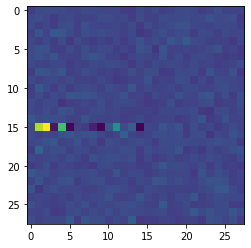

892


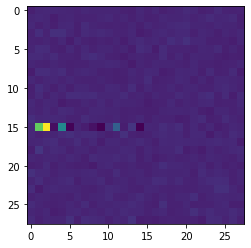

893


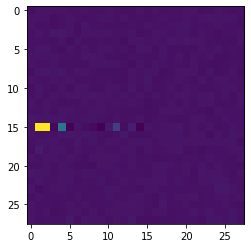

894


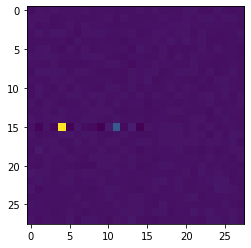

895


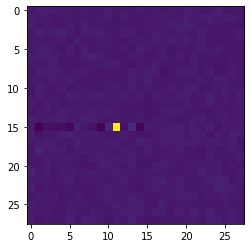

896


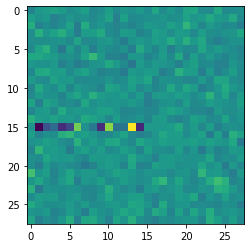

897


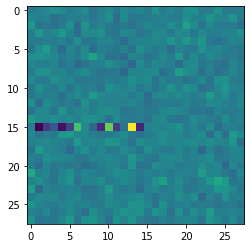

898


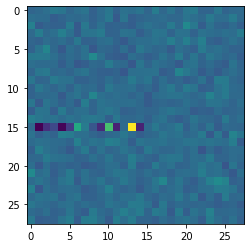

899


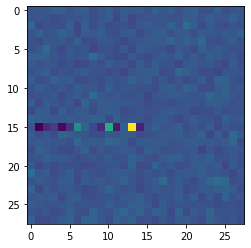

900


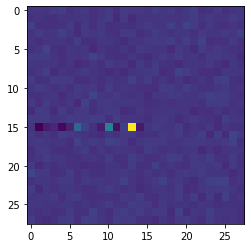

901


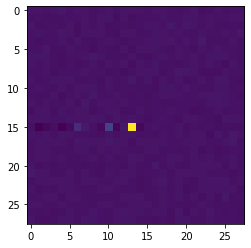

902


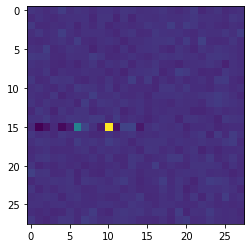

903


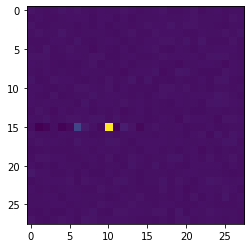

904


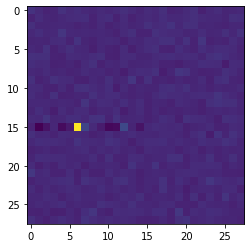

905


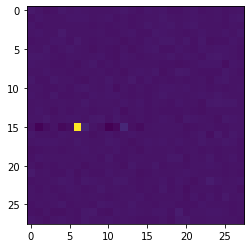

906


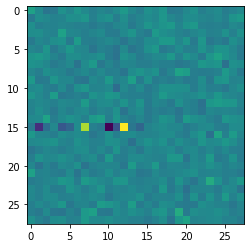

907


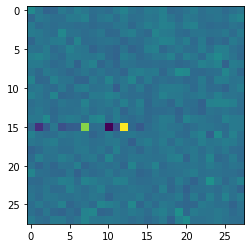

908


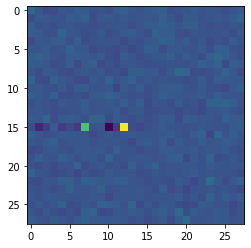

909


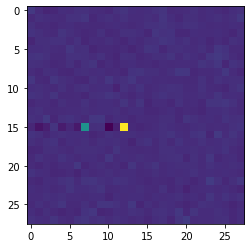

910


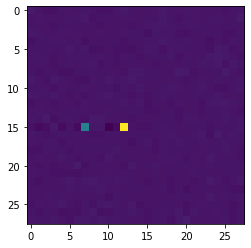

911


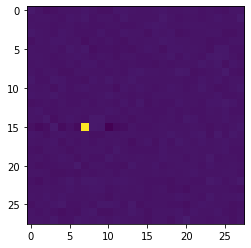

912


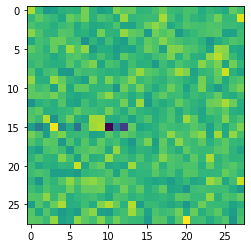

913


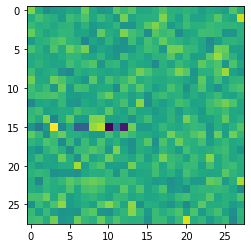

914


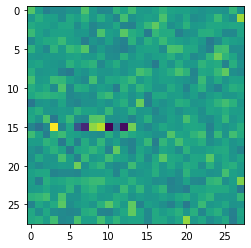

915


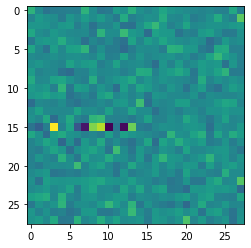

916


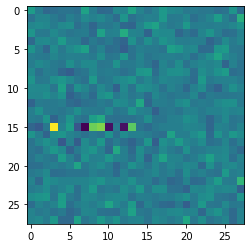

917


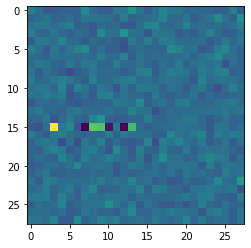

918


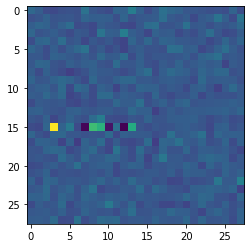

919


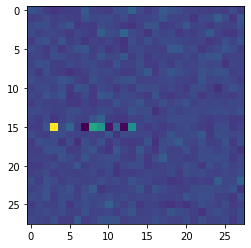

920


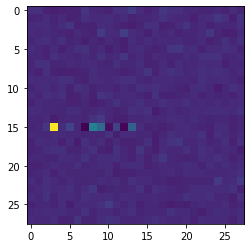

921


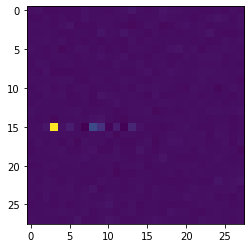

922


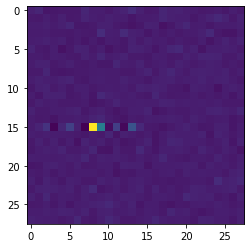

923


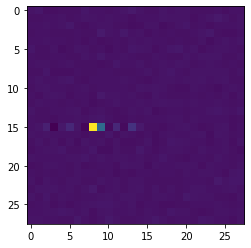

924


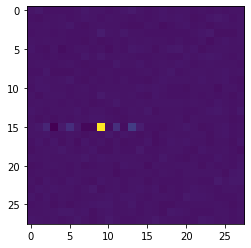

925


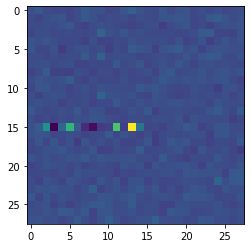

926


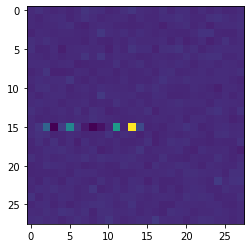

927


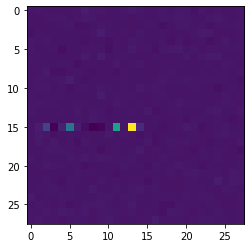

928


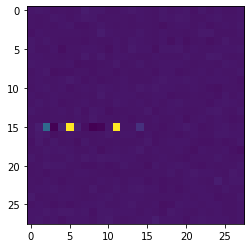

929


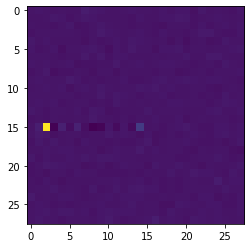

930


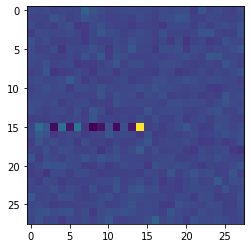

931


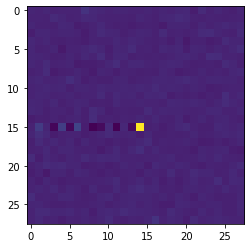

932


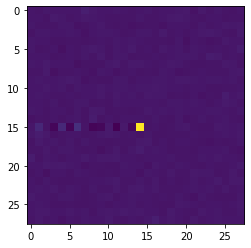

933


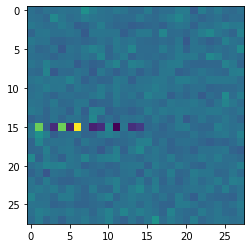

934


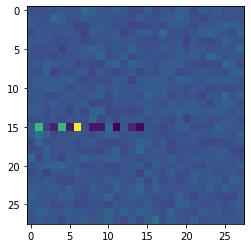

935


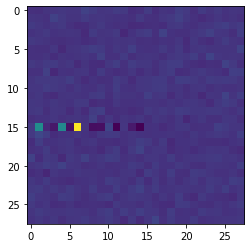

936


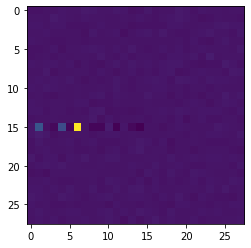

937


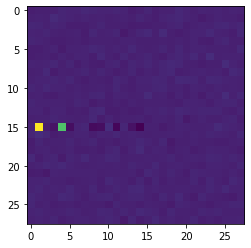

938


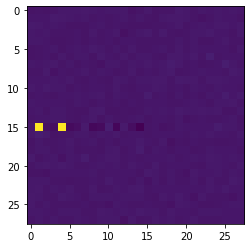

939


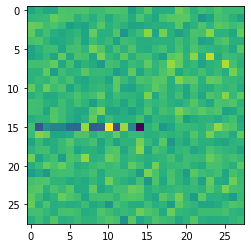

940


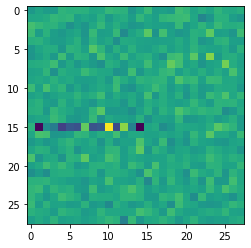

941


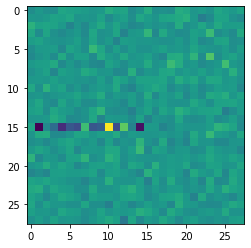

942


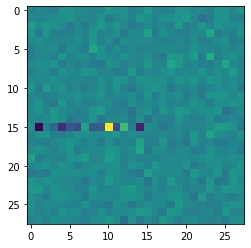

943


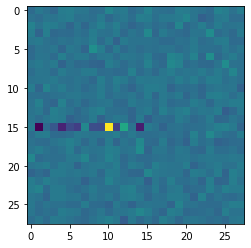

944


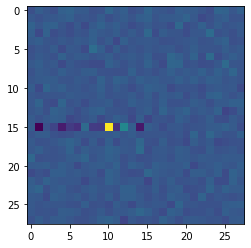

945


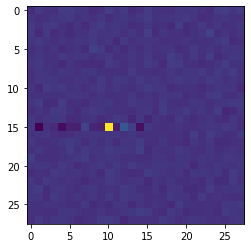

946


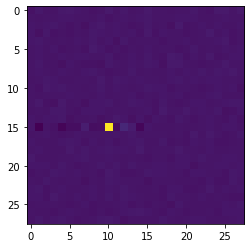

947


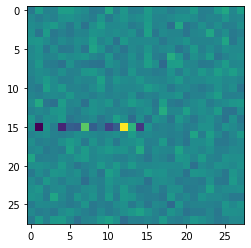

948


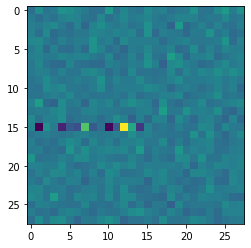

949


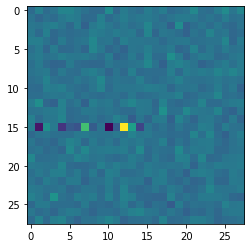

950


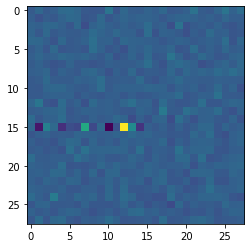

951


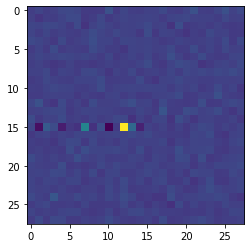

952


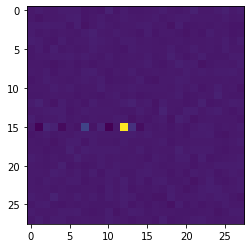

953


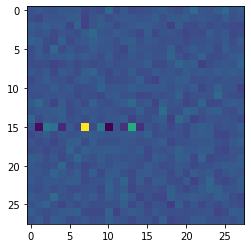

954


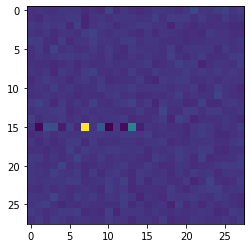

955


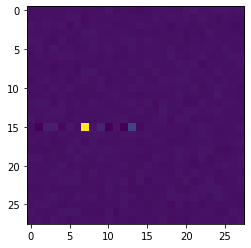

956


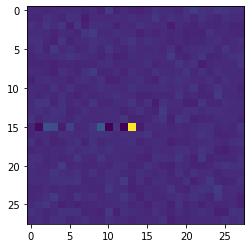

957


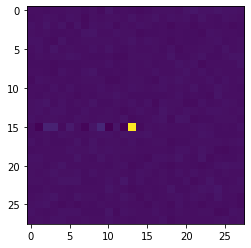

958


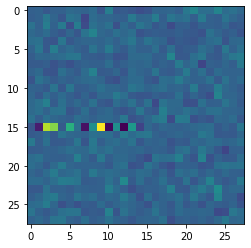

959


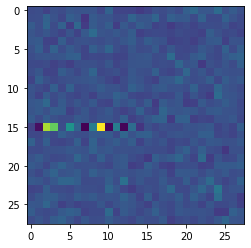

960


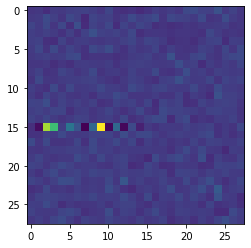

961


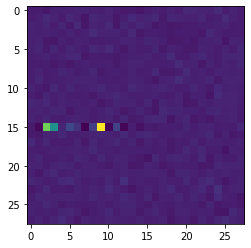

962


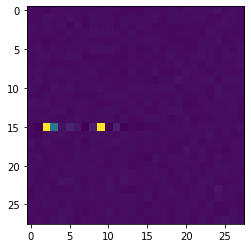

963


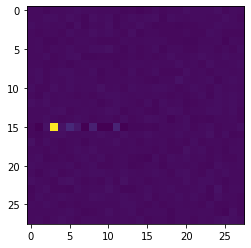

964


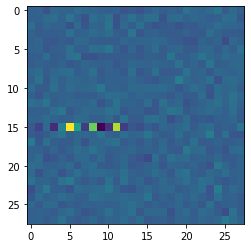

965


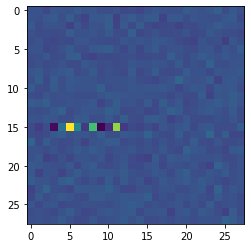

966


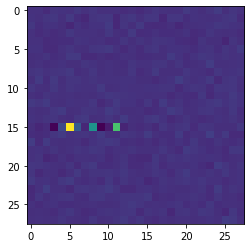

967


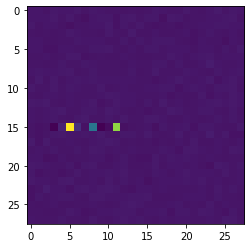

968


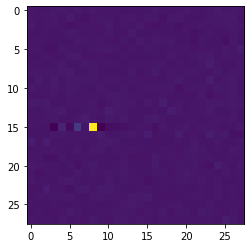

969


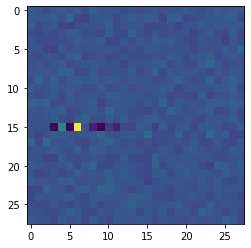

970


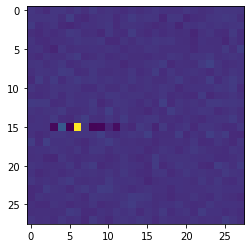

971


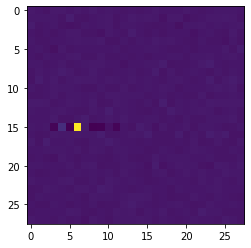

972


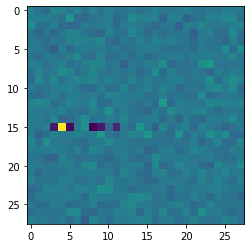

973


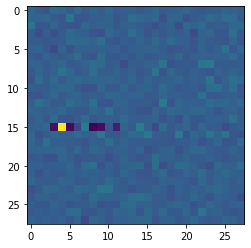

974


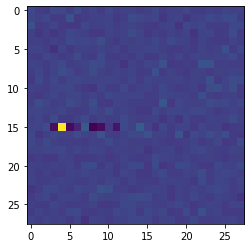

975


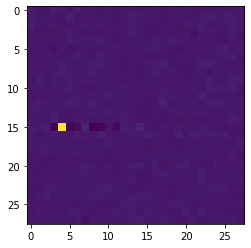

976


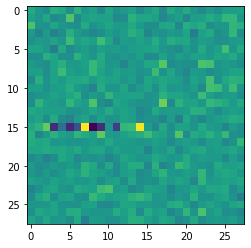

977


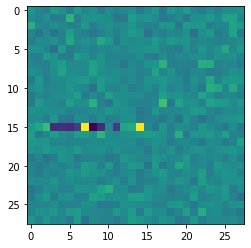

978


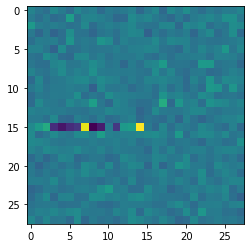

979


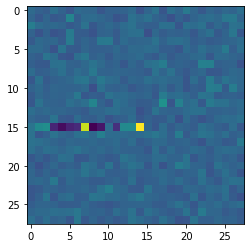

980


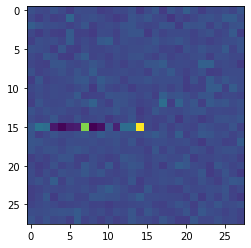

981


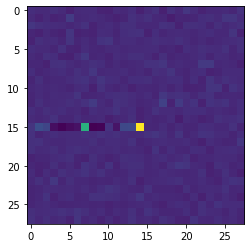

982


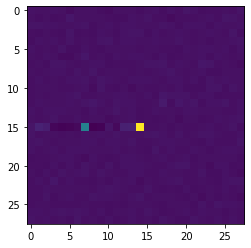

983


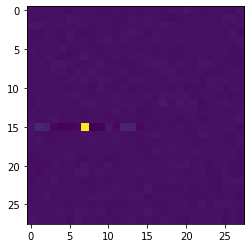

984


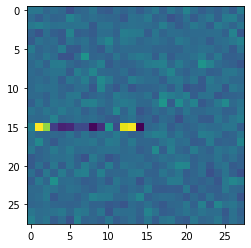

985


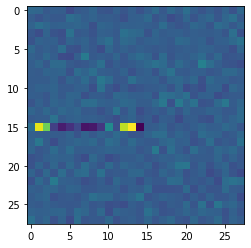

986


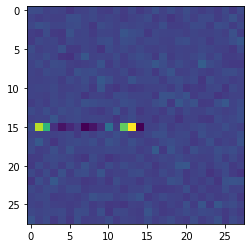

987


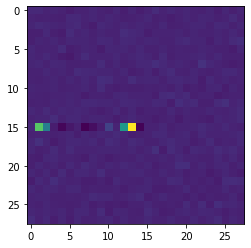

988


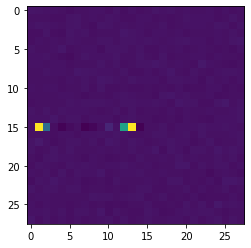

989


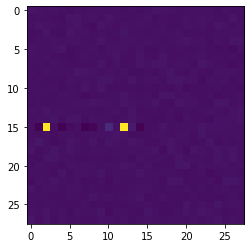

990


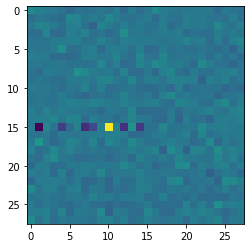

991


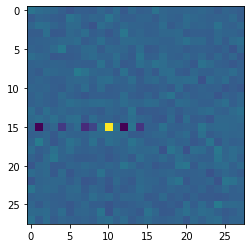

992


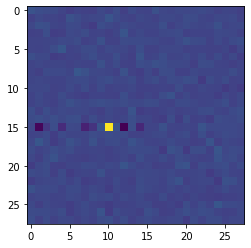

993


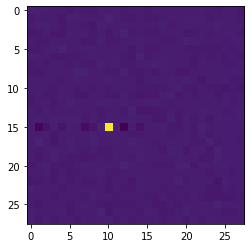

994


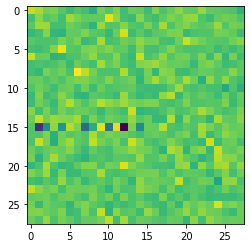

995


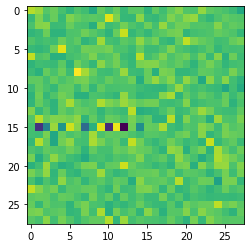

996


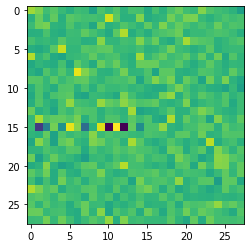

997


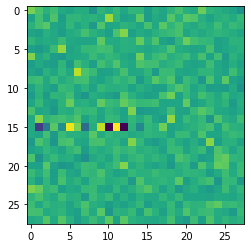

998


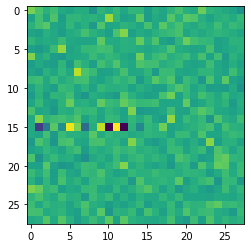

999


In [17]:
a = 0
name = f'1_line_{a}_volt'
filenames = []

for t in range(1000):
    #plt.imshow(angle_indices[a][1][t])
    plt.imshow(voltage7_reshaped[t][a])
    
    filename = f'data/gif/img/voltage/{name}_t{t}.png'
    plt.savefig(filename)
    filenames.append(filename)
    plt.show()
    print(t)

In [18]:
# build gif
with imageio.get_writer(f'data/gif/line_0_90/{name}.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

In [19]:
# Remove files
for filename in set(filenames):
    os.remove(filename)